In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # Seaborn desaturates matplotlib colors (this is useful if you use both seaborn and basic matplot lib and want colors to be consistent)
import scipy.stats as stats
sns.set(palette='husl', context = 'paper', style='white', font_scale=1)

import os
import scikit_posthocs as sp

import pybedtools
from pybedtools import BedTool

#from upsetplot import plot, from_indicators

In [2]:
BASE_PATH = "/".join(os.getcwd().split("/")) # base directory level


#Wynton
# BIN_PATH = os.path.join(BASE_PATH, "bin")  # where my scripts live
# DATA_PATH = os.path.join(BASE_PATH, "data")  # where I dump new data 
# RESULTS_PATH = os.path.join(BASE_PATH, "results")  # where I analyze results

# SRC_PATH = os.path.join(BASE_PATH, "src")  # where any packages needed to run analyses live. I haven't started structuring things this way yet. 

# COMP_PATH = os.path.join(DATA_PATH,"pairwise/hsmrca")
# COMP_PATH = os.path.join(DATA_PATH,"pairwise/reference")


# # Local
RESULTS_PATH = os.path.join(BASE_PATH, "../../../downloads")
DATA_PATH = os.path.join(BASE_PATH, "../../../downloads")  # where I dump new data
COMP_PATH = os.path.join(DATA_PATH,"1KGvsHSMRCA")
FIG_PATH = '/Users/egilbertson/Library/CloudStorage/Box-Box/UCSF/CapraLab/3DGenome/figures/manuscript'

In [3]:
DATA_PATH

'/Users/egilbertson/Library/CloudStorage/Box-Box/UCSF/CapraLab/3DGenome/bin/3Dbin/activeNotebooks/../../../downloads'

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
BASE_PATH

'/Users/egilbertson/Library/CloudStorage/Box-Box/UCSF/CapraLab/3DGenome/bin/3Dbin/activeNotebooks'

In [6]:

anc_spear = pd.read_table('%s/comp_tables/anc_window_spearman.csv' % RESULTS_PATH
                    , sep=',', header=[0,1,2,3], index_col=[0,1])
anc_div = 1-anc_spear
windows_to_keep = anc_div.index
anc_mse = pd.read_table('%s/comp_tables/anc_window_mse.csv' % RESULTS_PATH
                    , sep=',', header=[0,1,2,3], index_col=[0,1])

In [7]:
windows_to_keep.to_frame(index=False).to_csv('%s/intermediates/windows_to_keep.csv' % DATA_PATH)

In [8]:
anc_div.loc['chr3']

AFR                                                    \
                     ACB                                                     
                  female                                                     
                 HG01880   HG01883   HG01886   HG01889   HG01894   HG01896   
windowStartPos                                                               
524288          0.014846  0.005027  0.007895  0.004588  0.010779  0.011271   
1048576         0.043395  0.005119  0.012683  0.005205  0.007228  0.011232   
1572864         0.009885  0.002455  0.015382  0.003113  0.004461  0.004165   
2097152         0.040858  0.054287  0.016583  0.050030  0.047892  0.103680   
2621440         0.006588  0.006535  0.003087  0.009709  0.007043  0.025448   
...                  ...       ...       ...       ...       ...       ...   
195035136       0.002532  0.002815  0.003311  0.002852  0.003149  0.004666   
195559424       0.001772  0.001362  0.000827  0.001458  0.002161  0.001344   
196083712       0.001736  0.001536  0.001317  0.001642  0.002339  0.001760   
196608000       0.001488  0.000823  0.001504  0.001385  0.001389  0.001151   
197132288       0.001039  0.000976  0.000961  0.000946  0.000914  0.000828   

                                                        ...       SAS  \
                                                        ...       STU   
                                                        ...      male   
                 HG01915   HG01956   HG01958   HG01985  ...   HG03998   
windowStartPos                                          ...             
524288          0.008321  0.014690  0.005460  0.009493  ...  0.008685   
1048576         0.011979  0.020453  0.008801  0.007173  ...  0.009264   
1572864         0.005781  0.008995  0.008276  0.009174  ...  0.023241   
2097152         0.044383  0.038681  0.031566  0.020126  ...  0.028963   
2621440         0.006070  0.006621  0.003194  0.004243  ...  0.003202   
...                  ...       ...       ...       ...  ...       ...   
195035136       0.003663  0.001581  0.002721  0.003244  ...  0.003568   
195559424       0.001120  0.001055  0.001711  0.001868  ...  0.001217   
196083712       0.001617  0.002036  0.001541  0.001397  ...  0.000773   
196608000       0.000416  0.000961  0.000722  0.000430  ...  0.000709   
197132288       0.000787  0.000471  0.001213  0.000420  ...  0.000654   

                                                                            \
                                                                             
                                                                             
                 HG03999   HG04003   HG04006   HG04033   HG04039   HG04100   
windowStartPos                                                               
524288          0.018058  0.007233  0.005426  0.014228  0.010073  0.010921   
1048576         0.011324  0.021825  0.009897  0.010880  0.009848  0.003949   
1572864         0.004204  0.024054  0.007459  0.012007  0.003638  0.003490   
2097152         0.035949  0.022467  0.016903  0.028323  0.045514  0.021358   
2621440         0.004313  0.004353  0.003333  0.004966  0.005528  0.003719   
...                  ...       ...       ...       ...       ...       ...   
195035136       0.003557  0.003449  0.001678  0.002995  0.001815  0.003121   
195559424       0.000857  0.001911  0.000926  0.000814  0.001090  0.001136   
196083712       0.001365  0.001233  0.001044  0.001488  0.001665  0.001417   
196608000       0.000883  0.000549  0.000695  0.000763  0.001278  0.001106   
197132288       0.000317  0.000708  0.000477  0.000531  0.000819  0.000715   

                                              
                                              
                                              
                 HG04107   HG04210   HG04229  
windowStartPos                                
524288          0.006534  0.013016  0.010107  
1048576         0.009035  0.014930  0.013662  
1572864         0.012163 

# Genome Wide 3D

In [9]:
def population_order(df, metric):
    sup_order = df.groupby(by=["super_pop"])[metric].mean().sort_values().index
    sub_order = df.groupby(by=["sub_pop"])[metric].mean().sort_values().index
    
    sup_mapping = pd.DataFrame({
    'super': sup_order,
    })
    sup_mapping = sup_mapping.reset_index().set_index('super')

    sub_mapping = pd.DataFrame({
        'sub': sub_order,
    })
    sub_mapping = sub_mapping.reset_index().set_index('sub')
    
    df['super_rank'] = df['super_pop'].map(sup_mapping['index'])
    df['sub_rank'] = df['sub_pop'].map(sub_mapping['index'])
    
    my_order = df.sort_values(['super_rank','sub_rank'])
    
    my_order = my_order['sub_pop'].drop_duplicates().values
    
    amr_pal = sns.diverging_palette(50,230, s=82, l=58, n=10)[-4:]
    eur_pal = sns.diverging_palette(50,230, s=82, l=58, n=15)[:5]
    afr_pal = sns.diverging_palette(50,369, s=82, l=58, n=17)[-7:]
    sas_pal = sns.diverging_palette(190,369, s=82, l=58, n=12)[:5]
    eas_pal = sns.diverging_palette(110,105, s=75, l=65, n=10)[:5]
    
    my_pal = eur_pal + amr_pal + eas_pal + sas_pal + afr_pal

    sub_order = my_order
    sub_pal = my_pal

    sup_pal = [eur_pal[0], amr_pal[3], eas_pal[0], sas_pal[0], afr_pal[6]]

    return sub_order, sub_pal, sup_order, sup_pal

In [10]:
def plot_pop_metric(df,my_order, my_pal, metric, ytitle):
    plt.figure(figsize=(100,30))
    sns.stripplot(x='sub_pop', y=metric, data=df, dodge=False,s=20, 
                  palette=my_pal, 
                  order = my_order)
    plt.xlabel('\n1KG Population', fontsize=100)
    plt.ylabel(ytitle, fontsize=100)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=100)
    plt.tick_params(axis='both', which='major', labelsize=80)
    #plt.savefig('fig2.svg', format='svg')
    
    return

In [11]:
anc = pd.read_table('%s/comp_tables/anc_genomewide_averages.csv' % RESULTS_PATH,
                    sep=',', index_col=0)
drops = anc[np.isnan(anc.genome_avg_mse)].index
anc = anc.drop(index=drops)
anc['divergence'] = 1-anc.genome_avg_spearman

In [12]:
anc

ancestor  genome_avg_mse  genome_avg_spearman  \
1KG                                                                             
AFR_ACB_female_HG01880  hsmrca_ancestral        0.000654             0.995720   
AFR_ACB_female_HG01883  hsmrca_ancestral        0.000688             0.995387   
AFR_ACB_female_HG01886  hsmrca_ancestral        0.000680             0.995517   
AFR_ACB_female_HG01889  hsmrca_ancestral        0.000709             0.995272   
AFR_ACB_female_HG01894  hsmrca_ancestral        0.000683             0.995589   
...                                  ...             ...                  ...   
SAS_STU_male_HG04039    hsmrca_ancestral        0.000642             0.995748   
SAS_STU_male_HG04100    hsmrca_ancestral        0.000664             0.995672   
SAS_STU_male_HG04107    hsmrca_ancestral        0.000671             0.995665   
SAS_STU_male_HG04210    hsmrca_ancestral        0.000663             0.995597   
SAS_STU_male_HG04229    hsmrca_ancestral        0.000669             0.995534   

                       super_pop sub_pop     sex       id  divergence  
1KG                                                                    
AFR_ACB_female_HG01880       AFR     ACB  female  HG01880    0.004280  
AFR_ACB_female_HG01883       AFR     ACB  female  HG01883    0.004613  
AFR_ACB_female_HG01886       AFR     ACB  female  HG01886    0.004483  
AFR_ACB_female_HG01889       AFR     ACB  female  HG01889    0.004728  
AFR_ACB_female_HG01894       AFR     ACB  female  HG01894    0.004411  
...                          ...     ...     ...      ...         ...  
SAS_STU_male_HG04039         SAS     STU    male  HG04039    0.004252  
SAS_STU_male_HG04100         SAS     STU    male  HG04100    0.004328  
SAS_STU_male_HG04107         SAS     STU    male  HG04107    0.004335  
SAS_STU_male_HG04210         SAS     STU    male  HG04210    0.004403  
SAS_STU_male_HG04229         SAS     STU    male  HG04229    0.004466  

[2457 rows x 8 columns]

In [13]:
anc_div

AFR                                          \
                           ACB                                           
                        female                                           
                       HG01880   HG01883   HG01886   HG01889   HG01894   
chr   windowStartPos                                                     
chr1  1048576         0.000982  0.001551  0.001609  0.001618  0.003944   
      1572864         0.001445  0.001657  0.001909  0.001959  0.004272   
      3145728         0.001283  0.000683  0.002624  0.002458  0.002041   
      3670016         0.005119  0.004878  0.001901  0.002729  0.004874   
      4194304         0.008681  0.007497  0.004502  0.004731  0.011335   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.007145  0.001892  0.002877  0.008396  0.004389   
      47185920        0.027227  0.006835  0.003085  0.035391  0.003696   
      47710208        0.039303  0.045497  0.065454  0.123312  0.028221   
      48234496        0.183482  0.189969  0.241011  0.325763  0.195117   
      48758784        0.005628  0.014172  0.002837  0.015048  0.012794   

                                                                        ...  \
                                                                        ...   
                                                                        ...   
                       HG01896   HG01915   HG01956   HG01958   HG01985  ...   
chr   windowStartPos                                                    ...   
chr1  1048576         0.002145  0.001217  0.000658  0.002693  0.002143  ...   
      1572864         0.002573  0.001838  0.002096  0.006768  0.002917  ...   
      3145728         0.002661  0.000521  0.002490  0.003151  0.002294  ...   
      3670016         0.001535  0.004503  0.004706  0.004062  0.006236  ...   
      4194304         0.006836  0.007988  0.010622  0.007037  0.014604  ...   
...                        ...       ...       ...       ...       ...  ...   
chr22 46661632        0.002007  0.003275  0.006965  0.002858  0.006226  ...   
      47185920        0.007332  0.002898  0.017533  0.005524  0.002682  ...   
      47710208        0.040250  0.046180  0.030846  0.038820  0.033115  ...   
      48234496        0.174392  0.179873  0.198540  0.168733  0.161755  ...   
      48758784        0.003188  0.005283  0.012890  0.003300  0.013330  ...   

                           SAS                                          \
                           STU                                           
                          male                                           
                       HG03998   HG03999   HG04003   HG04006   HG04033   
chr   windowStartPos                                                     
chr1  1048576         0.000387  0.000713  0.000919  0.000718  0.000841   
      1572864         0.001048  0.000703  0.001067  0.000496  0.001208   
      3145728         0.003141  0.004537  0.000520  0.000528  0.001665   
      3670016         0.005861  0.006603  0.004933  0.004321  0.004428   
      4194304         0.009956  0.011672  0.013004  0.005318  0.008290   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.003228  0.002667  0.003284  0.002222  0.001290   
      47185920        0.007095  0.003824  0.004329  0.003580  0.003119   
      47710208        0.037299  0.045959  0.036592  0.034629  0.043876   
      48234496        0.166427  0.189953  0.157409  0.160880  0.186454   
      48758784        0.005060  0.005483  0.003194  0.004617  0.005598   

                                                                        
                                                                        
                                                                        
                       HG04039   HG04100   HG04107   HG04210   HG04229  
chr   windowStartPos                                                    
chr1  1048576         0.000

In [14]:
anc_div['EUR']['CEU']['female'].columns

Index(['NA06985', 'NA06989', 'NA07000', 'NA07037', 'NA07056', 'NA10847',
       'NA11830', 'NA11832', 'NA11840', 'NA11892', 'NA11894', 'NA11918',
       'NA11920', 'NA11931', 'NA11933', 'NA11995', 'NA12004', 'NA12006',
       'NA12044', 'NA12046', 'NA12058', 'NA12156', 'NA12234', 'NA12249',
       'NA12273', 'NA12275', 'NA12283', 'NA12287', 'NA12341', 'NA12348',
       'NA12383', 'NA12400', 'NA12414', 'NA12489', 'NA12717', 'NA12718',
       'NA12749', 'NA12751', 'NA12761', 'NA12763', 'NA12776', 'NA12778',
       'NA12813', 'NA12815', 'NA12828', 'NA12830', 'NA12843', 'NA12873',
       'NA12878', 'NA12890'],
      dtype='object')

In [15]:
sub_order, sub_pal, sup_order, sup_pal =population_order(anc, 'divergence')

In [16]:
sub_pal

[(0.706670293609049, 0.5093997303734449, 0.22414913576687667),
 (0.7412716621541051, 0.5707304545629114, 0.3249249989963094),
 (0.7758730306991612, 0.6320611787523777, 0.42570086222574205),
 (0.8104743992442174, 0.6933919029418442, 0.5264767254551748),
 (0.8479554606792538, 0.7598268660042837, 0.6356396424060673),
 (0.7138514591292806, 0.8262184223783144, 0.8775670924419225),
 (0.5552584329455093, 0.7420118141043546, 0.8257624345335782),
 (0.40471949211451236, 0.6620816057871005, 0.7765886560939287),
 (0.2541805512835154, 0.5821513974698465, 0.7274148776542794),
 (0.5061679352128585, 0.6675954483699535, 0.3024282922555064),
 (0.5994839972981465, 0.7300087731148024, 0.4368319146885214),
 (0.6928000593834346, 0.7924220978596512, 0.5712355371215364),
 (0.7911086870113715, 0.8581746399649424, 0.7128299783607821),
 (0.8844247490966596, 0.9205879647097912, 0.8472336007937971),
 (0.2416826875486161, 0.5991756083655165, 0.5923648937866773),
 (0.36394772525165214, 0.6628215022818902, 0.65704911

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


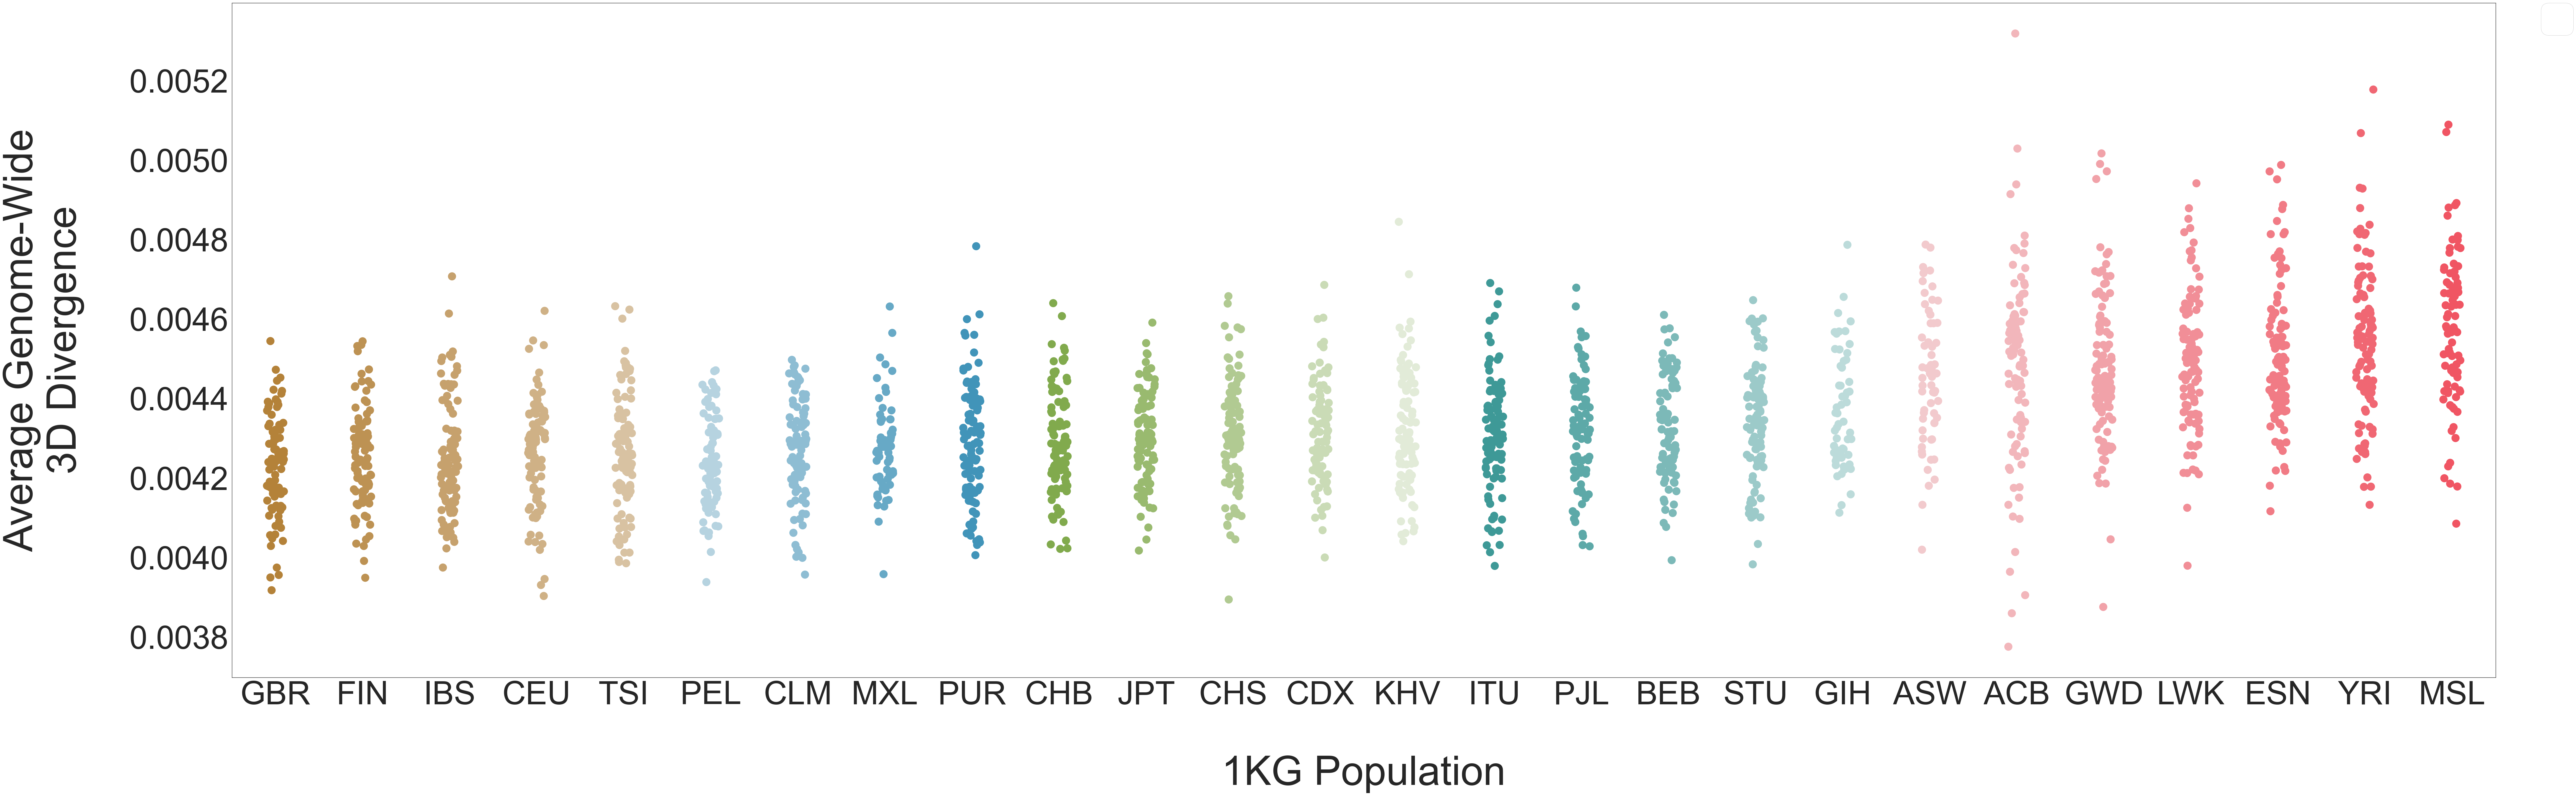

In [17]:
plot_pop_metric(anc, sub_order, sub_pal, 'divergence','Average Genome-Wide\n3D Divergence\n')
#plt.savefig("results/plots/1KG_genome_average_3D_divergence.svg", bbox_inches = 'tight')

In [18]:
anc

ancestor  genome_avg_mse  genome_avg_spearman  \
1KG                                                                             
AFR_ACB_female_HG01880  hsmrca_ancestral        0.000654             0.995720   
AFR_ACB_female_HG01883  hsmrca_ancestral        0.000688             0.995387   
AFR_ACB_female_HG01886  hsmrca_ancestral        0.000680             0.995517   
AFR_ACB_female_HG01889  hsmrca_ancestral        0.000709             0.995272   
AFR_ACB_female_HG01894  hsmrca_ancestral        0.000683             0.995589   
...                                  ...             ...                  ...   
SAS_STU_male_HG04039    hsmrca_ancestral        0.000642             0.995748   
SAS_STU_male_HG04100    hsmrca_ancestral        0.000664             0.995672   
SAS_STU_male_HG04107    hsmrca_ancestral        0.000671             0.995665   
SAS_STU_male_HG04210    hsmrca_ancestral        0.000663             0.995597   
SAS_STU_male_HG04229    hsmrca_ancestral        0.000669             0.995534   

                       super_pop sub_pop     sex       id  divergence  \
1KG                                                                     
AFR_ACB_female_HG01880       AFR     ACB  female  HG01880    0.004280   
AFR_ACB_female_HG01883       AFR     ACB  female  HG01883    0.004613   
AFR_ACB_female_HG01886       AFR     ACB  female  HG01886    0.004483   
AFR_ACB_female_HG01889       AFR     ACB  female  HG01889    0.004728   
AFR_ACB_female_HG01894       AFR     ACB  female  HG01894    0.004411   
...                          ...     ...     ...      ...         ...   
SAS_STU_male_HG04039         SAS     STU    male  HG04039    0.004252   
SAS_STU_male_HG04100         SAS     STU    male  HG04100    0.004328   
SAS_STU_male_HG04107         SAS     STU    male  HG04107    0.004335   
SAS_STU_male_HG04210         SAS     STU    male  HG04210    0.004403   
SAS_STU_male_HG04229         SAS     STU    male  HG04229    0.004466   

                        super_rank  sub_rank  
1KG                                           
AFR_ACB_female_HG01880           4        20  
AFR_ACB_female_HG01883           4        20  
AFR_ACB_female_HG01886           4        20  
AFR_ACB_female_HG01889           4        20  
AFR_ACB_female_HG01894           4        20  
...                            ...       ...  
SAS_STU_male_HG04039             3        17  
SAS_STU_male_HG04100             3        17  
SAS_STU_male_HG04107             3        17  
SAS_STU_male_HG04210             3        17  
SAS_STU_male_HG04229             3        17  

[2457 rows x 10 columns]

In [19]:
BASE_PATH

'/Users/egilbertson/Library/CloudStorage/Box-Box/UCSF/CapraLab/3DGenome/bin/3Dbin/activeNotebooks'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


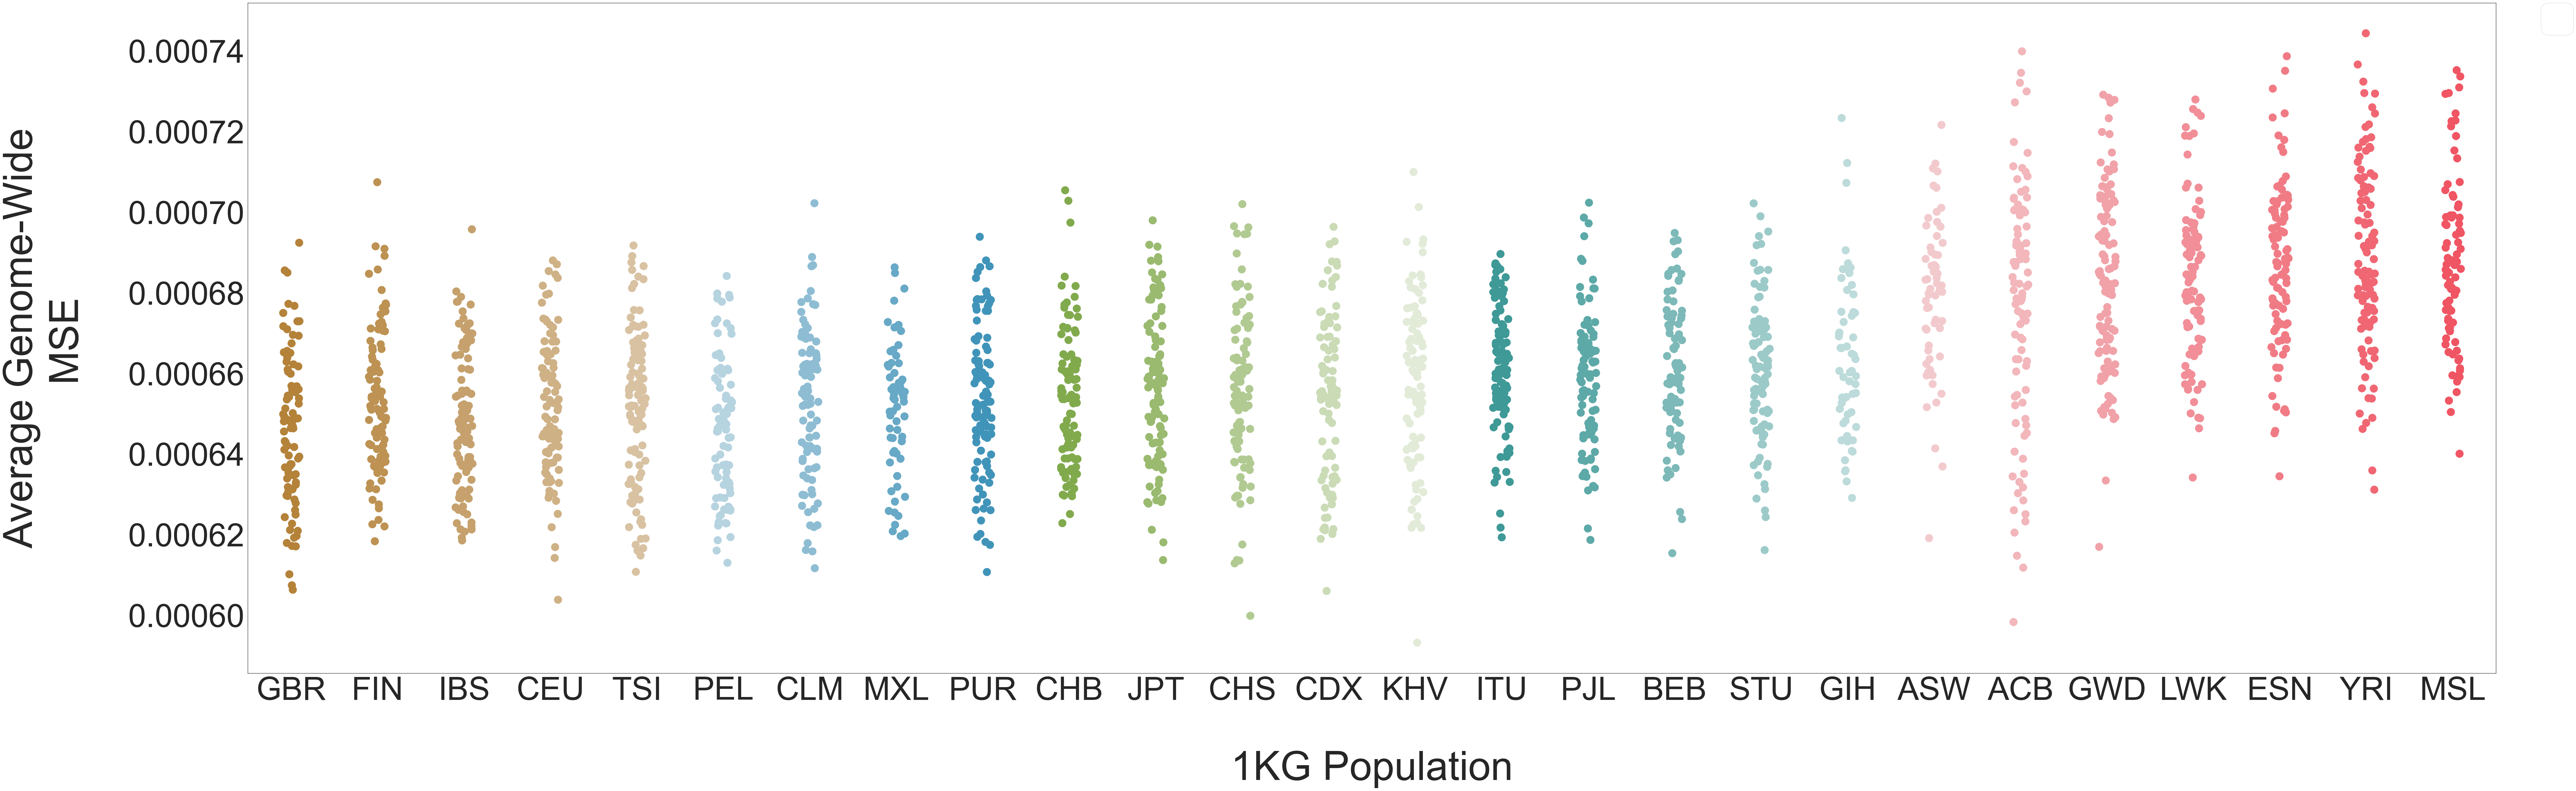

In [20]:
plot_pop_metric(anc, sub_order, sub_pal, 'genome_avg_mse','Average Genome-Wide\nMSE\n')
plt.savefig("%s/sup/1KG_genome_average_mse.svg" % FIG_PATH, bbox_inches = 'tight')

In [21]:
anc[anc.super_pop == 'AFR']['divergence'].mean()

0.00450564754779911

In [22]:
anc[anc.super_pop != 'AFR']['divergence'].mean()

0.004291347983778498

In [23]:
anc[anc['sub_pop']=='PUR'].divergence.idxmax()

'AMR_PUR_female_HG01108'

In [24]:
anc

ancestor  genome_avg_mse  genome_avg_spearman  \
1KG                                                                             
AFR_ACB_female_HG01880  hsmrca_ancestral        0.000654             0.995720   
AFR_ACB_female_HG01883  hsmrca_ancestral        0.000688             0.995387   
AFR_ACB_female_HG01886  hsmrca_ancestral        0.000680             0.995517   
AFR_ACB_female_HG01889  hsmrca_ancestral        0.000709             0.995272   
AFR_ACB_female_HG01894  hsmrca_ancestral        0.000683             0.995589   
...                                  ...             ...                  ...   
SAS_STU_male_HG04039    hsmrca_ancestral        0.000642             0.995748   
SAS_STU_male_HG04100    hsmrca_ancestral        0.000664             0.995672   
SAS_STU_male_HG04107    hsmrca_ancestral        0.000671             0.995665   
SAS_STU_male_HG04210    hsmrca_ancestral        0.000663             0.995597   
SAS_STU_male_HG04229    hsmrca_ancestral        0.000669             0.995534   

                       super_pop sub_pop     sex       id  divergence  \
1KG                                                                     
AFR_ACB_female_HG01880       AFR     ACB  female  HG01880    0.004280   
AFR_ACB_female_HG01883       AFR     ACB  female  HG01883    0.004613   
AFR_ACB_female_HG01886       AFR     ACB  female  HG01886    0.004483   
AFR_ACB_female_HG01889       AFR     ACB  female  HG01889    0.004728   
AFR_ACB_female_HG01894       AFR     ACB  female  HG01894    0.004411   
...                          ...     ...     ...      ...         ...   
SAS_STU_male_HG04039         SAS     STU    male  HG04039    0.004252   
SAS_STU_male_HG04100         SAS     STU    male  HG04100    0.004328   
SAS_STU_male_HG04107         SAS     STU    male  HG04107    0.004335   
SAS_STU_male_HG04210         SAS     STU    male  HG04210    0.004403   
SAS_STU_male_HG04229         SAS     STU    male  HG04229    0.004466   

                        super_rank  sub_rank  
1KG                                           
AFR_ACB_female_HG01880           4        20  
AFR_ACB_female_HG01883           4        20  
AFR_ACB_female_HG01886           4        20  
AFR_ACB_female_HG01889           4        20  
AFR_ACB_female_HG01894           4        20  
...                            ...       ...  
SAS_STU_male_HG04039             3        17  
SAS_STU_male_HG04100             3        17  
SAS_STU_male_HG04107             3        17  
SAS_STU_male_HG04210             3        17  
SAS_STU_male_HG04229             3        17  

[2457 rows x 10 columns]

In [25]:
kruskal = stats.kruskal(anc[anc.super_pop=='AFR']['divergence'], 
            anc[anc.super_pop=='AMR']['divergence'],
            anc[anc.super_pop=='EUR']['divergence'],
            anc[anc.super_pop=='EAS']['divergence'],
            anc[anc.super_pop=='SAS']['divergence'])
conover = sp.posthoc_conover(anc, val_col='divergence', group_col='super_pop', p_adjust = 'holm')

In [26]:
kruskal = stats.kruskal(anc[anc.super_pop=='AFR']['genome_avg_mse'], 
            anc[anc.super_pop=='AMR']['genome_avg_mse'],
            anc[anc.super_pop=='EUR']['genome_avg_mse'],
            anc[anc.super_pop=='EAS']['genome_avg_mse'],
            anc[anc.super_pop=='SAS']['genome_avg_mse'])
conover = sp.posthoc_conover(anc, val_col='genome_avg_mse', group_col='super_pop', p_adjust = 'holm')

In [27]:
kruskal

KruskalResult(statistic=745.9236799342125, pvalue=3.9587513978576155e-160)

In [28]:
conover

AFR            AMR            EAS            EUR           SAS
AFR   1.000000e+00  1.782819e-115  2.708479e-107  9.472056e-148  1.380674e-64
AMR  1.782819e-115   1.000000e+00   1.849739e-03   5.359963e-01  1.616590e-12
EAS  2.708479e-107   1.849739e-03   1.000000e+00   4.136579e-05  2.710689e-05
EUR  9.472056e-148   5.359963e-01   4.136579e-05   1.000000e+00  2.973369e-17
SAS   1.380674e-64   1.616590e-12   2.710689e-05   2.973369e-17  1.000000e+00

In [29]:
kruskal = stats.kruskal(anc[anc.super_pop=='AFR']['divergence'], 
            anc[anc.super_pop!='AFR']['divergence'])
kruskal

KruskalResult(statistic=608.5996085313336, pvalue=2.255992761035503e-134)

In [30]:
anc[anc.super_pop=='AFR']['divergence']

1KG
AFR_ACB_female_HG01880    0.004280
AFR_ACB_female_HG01883    0.004613
AFR_ACB_female_HG01886    0.004483
AFR_ACB_female_HG01889    0.004728
AFR_ACB_female_HG01894    0.004411
                            ...   
AFR_YRI_male_NA19223      0.004827
AFR_YRI_male_NA19236      0.004498
AFR_YRI_male_NA19239      0.004616
AFR_YRI_male_NA19248      0.004650
AFR_YRI_male_NA19256      0.004398
Name: divergence, Length: 660, dtype: float64

In [31]:
anc[['ancestor']]

ancestor
1KG                                     
AFR_ACB_female_HG01880  hsmrca_ancestral
AFR_ACB_female_HG01883  hsmrca_ancestral
AFR_ACB_female_HG01886  hsmrca_ancestral
AFR_ACB_female_HG01889  hsmrca_ancestral
AFR_ACB_female_HG01894  hsmrca_ancestral
...                                  ...
SAS_STU_male_HG04039    hsmrca_ancestral
SAS_STU_male_HG04100    hsmrca_ancestral
SAS_STU_male_HG04107    hsmrca_ancestral
SAS_STU_male_HG04210    hsmrca_ancestral
SAS_STU_male_HG04229    hsmrca_ancestral

[2457 rows x 1 columns]

In [32]:
windows_to_keep

MultiIndex([( 'chr1',  1048576),
            ( 'chr1',  1572864),
            ( 'chr1',  3145728),
            ( 'chr1',  3670016),
            ( 'chr1',  4194304),
            ( 'chr1',  4718592),
            ( 'chr1',  5242880),
            ( 'chr1',  5767168),
            ( 'chr1',  6291456),
            ( 'chr1',  6815744),
            ...
            ('chr22', 44040192),
            ('chr22', 44564480),
            ('chr22', 45088768),
            ('chr22', 45613056),
            ('chr22', 46137344),
            ('chr22', 46661632),
            ('chr22', 47185920),
            ('chr22', 47710208),
            ('chr22', 48234496),
            ('chr22', 48758784)],
           names=['chr', 'windowStartPos'], length=4873)

# Sequence

### Import Sequence Data

In [34]:
list_file = os.path.join(DATA_PATH, "lists/listOfPairwiseComps_hsmrca.txt")
base = 'hsmrca_ancestral'
#wynton
#COMP_PATH = os.path.join(DATA_PATH,"pairwise/sequence/1KGvsHSMRCA")
#local
COMP_PATH = os.path.join(DATA_PATH,"1KGvsHSMRCA")
base_df = anc[['ancestor']]
comp_dict_seq = {}
print('first for')
for row in base_df.index:
    ind = str(base_df.loc[row].name)
    filename = 'SeqComps_%s_vs_%s.txt' % (ind,base)
    if os.path.exists('%s/%s' % (COMP_PATH,filename)):
        try:
            df = pd.read_table('%s/%s' % (COMP_PATH,filename))
            df = df[df.chrm != 'chrX']
            comp_dict_seq[ind] = df
        except:
            print('broken')
            continue     
print('done')

indivs = list(comp_dict_seq.keys())
### Window by window
seq_id = pd.DataFrame(index = windows_to_keep, columns = indivs)

### Genome wide averages        
base_df['seq_id']=''
print('second for')
for ind in comp_dict_seq.keys():
    df = comp_dict_seq[ind]
    df = df.set_index(['chrm','start_loc'])
    try:
        df = df.loc[windows_to_keep]
        avg_seq_id =float(np.mean(df['seqComp_raw'].astype('float')))

        base_df.seq_id.loc[ind]=avg_seq_id

        seq_id[ind]=df['seqComp_raw'].astype(float)
    except:
        print('missing data for individual: %s' % ind)
print('done')  



base_df['temp'] = base_df.index
new = base_df.temp.str.split("_", expand = True)
base_df['super_pop'] = new[0]
base_df['sub_pop'] = new[1]
base_df['sex'] = new[2]
base_df['id'] = new[3]

genome_wide = base_df.drop(columns=['temp'])
genome_wide = genome_wide[genome_wide.seq_id != '']
genome_wide.seq_id = genome_wide.seq_id.astype('float')

seq_id.columns = seq_id.columns.str.split('_', expand=True)

first for
done
second for
missing data for individual: SAS_ITU_male_HG04060
done


In [35]:
genome_wide['seq_diff'] = 1-genome_wide['seq_id']

In [36]:
seq_id

AFR                                          \
                           ACB                                           
                        female                                           
                       HG01880   HG01883   HG01886   HG01889   HG01894   
chr   windowStartPos                                                     
chr1  1048576         0.997931  0.997857  0.997736  0.997972  0.997853   
      1572864         0.998110  0.998123  0.998151  0.998192  0.998240   
      3145728         0.997773  0.997626  0.997702  0.997618  0.997599   
      3670016         0.997611  0.997586  0.997629  0.997523  0.997541   
      4194304         0.997862  0.997857  0.997876  0.997823  0.997825   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.997848  0.997856  0.998013  0.997739  0.997728   
      47185920        0.997958  0.997890  0.998061  0.997890  0.997886   
      47710208        0.997506  0.997428  0.997446  0.997409  0.997358   
      48234496        0.996772  0.996774  0.996632  0.996674  0.996636   
      48758784        0.996976  0.996884  0.996962  0.996830  0.996856   

                                                                        ...  \
                                                                        ...   
                                                                        ...   
                       HG01896   HG01915   HG01956   HG01958   HG01985  ...   
chr   windowStartPos                                                    ...   
chr1  1048576         0.997803  0.997801  0.997876  0.997949  0.997746  ...   
      1572864         0.998150  0.998139  0.998133  0.998239  0.998172  ...   
      3145728         0.997694  0.997623  0.997636  0.997598  0.997805  ...   
      3670016         0.997658  0.997585  0.997465  0.997543  0.997638  ...   
      4194304         0.997950  0.997828  0.997877  0.997899  0.997946  ...   
...                        ...       ...       ...       ...       ...  ...   
chr22 46661632        0.997716  0.997778  0.997693  0.997761  0.997622  ...   
      47185920        0.997856  0.997869  0.997845  0.997894  0.997779  ...   
      47710208        0.997430  0.997439  0.997389  0.997455  0.997372  ...   
      48234496        0.996786  0.996753  0.996626  0.996852  0.996730  ...   
      48758784        0.996988  0.996965  0.996849  0.997128  0.997022  ...   

                           SAS                                          \
                           STU                                           
                          male                                           
                       HG03998   HG03999   HG04003   HG04006   HG04033   
chr   windowStartPos                                                     
chr1  1048576         0.998213  0.998108  0.997961  0.998037  0.997933   
      1572864         0.998325  0.998248  0.998200  0.998288  0.998113   
      3145728         0.997788  0.997863  0.997840  0.997759  0.997921   
      3670016         0.997661  0.997700  0.997652  0.997672  0.997709   
      4194304         0.997935  0.997924  0.997936  0.997987  0.997947   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.998008  0.997988  0.997975  0.997887  0.998048   
      47185920        0.998049  0.998114  0.998072  0.998012  0.998059   
      47710208        0.997605  0.997623  0.997680  0.997594  0.997581   
      48234496        0.997002  0.996917  0.997077  0.997084  0.997025   
      48758784        0.997152  0.997118  0.997272  0.997236  0.997231   

                                                                        
                                                                        
                                                                        
                       HG04039   HG04100   HG04107   HG04210   HG04229  
chr   windowStartPos                                                    
chr1  1048576         0.998

### Correlate Sequence and 3D

In [37]:
anc

ancestor  genome_avg_mse  genome_avg_spearman  \
1KG                                                                             
AFR_ACB_female_HG01880  hsmrca_ancestral        0.000654             0.995720   
AFR_ACB_female_HG01883  hsmrca_ancestral        0.000688             0.995387   
AFR_ACB_female_HG01886  hsmrca_ancestral        0.000680             0.995517   
AFR_ACB_female_HG01889  hsmrca_ancestral        0.000709             0.995272   
AFR_ACB_female_HG01894  hsmrca_ancestral        0.000683             0.995589   
...                                  ...             ...                  ...   
SAS_STU_male_HG04039    hsmrca_ancestral        0.000642             0.995748   
SAS_STU_male_HG04100    hsmrca_ancestral        0.000664             0.995672   
SAS_STU_male_HG04107    hsmrca_ancestral        0.000671             0.995665   
SAS_STU_male_HG04210    hsmrca_ancestral        0.000663             0.995597   
SAS_STU_male_HG04229    hsmrca_ancestral        0.000669             0.995534   

                       super_pop sub_pop     sex       id  divergence  \
1KG                                                                     
AFR_ACB_female_HG01880       AFR     ACB  female  HG01880    0.004280   
AFR_ACB_female_HG01883       AFR     ACB  female  HG01883    0.004613   
AFR_ACB_female_HG01886       AFR     ACB  female  HG01886    0.004483   
AFR_ACB_female_HG01889       AFR     ACB  female  HG01889    0.004728   
AFR_ACB_female_HG01894       AFR     ACB  female  HG01894    0.004411   
...                          ...     ...     ...      ...         ...   
SAS_STU_male_HG04039         SAS     STU    male  HG04039    0.004252   
SAS_STU_male_HG04100         SAS     STU    male  HG04100    0.004328   
SAS_STU_male_HG04107         SAS     STU    male  HG04107    0.004335   
SAS_STU_male_HG04210         SAS     STU    male  HG04210    0.004403   
SAS_STU_male_HG04229         SAS     STU    male  HG04229    0.004466   

                        super_rank  sub_rank  
1KG                                           
AFR_ACB_female_HG01880           4        20  
AFR_ACB_female_HG01883           4        20  
AFR_ACB_female_HG01886           4        20  
AFR_ACB_female_HG01889           4        20  
AFR_ACB_female_HG01894           4        20  
...                            ...       ...  
SAS_STU_male_HG04039             3        17  
SAS_STU_male_HG04100             3        17  
SAS_STU_male_HG04107             3        17  
SAS_STU_male_HG04210             3        17  
SAS_STU_male_HG04229             3        17  

[2457 rows x 10 columns]

In [38]:
anc.super_pop.value_counts()

super_pop
AFR    660
EAS    504
EUR    503
SAS    443
AMR    347
Name: count, dtype: int64

In [39]:
anc[anc.super_pop == 'EAS']

ancestor  genome_avg_mse  genome_avg_spearman  \
1KG                                                                             
EAS_CDX_female_HG00759  hsmrca_ancestral        0.000672             0.995628   
EAS_CDX_female_HG00766  hsmrca_ancestral        0.000696             0.995457   
EAS_CDX_female_HG00851  hsmrca_ancestral        0.000672             0.995662   
EAS_CDX_female_HG00864  hsmrca_ancestral        0.000624             0.995760   
EAS_CDX_female_HG00867  hsmrca_ancestral        0.000693             0.995552   
...                                  ...             ...                  ...   
EAS_KHV_male_HG02137    hsmrca_ancestral        0.000655             0.995766   
EAS_KHV_male_HG02138    hsmrca_ancestral        0.000648             0.995800   
EAS_KHV_male_HG02141    hsmrca_ancestral        0.000666             0.995705   
EAS_KHV_male_HG02512    hsmrca_ancestral        0.000655             0.995828   
EAS_KHV_male_HG02521    hsmrca_ancestral        0.000662             0.995754   

                       super_pop sub_pop     sex       id  divergence  \
1KG                                                                     
EAS_CDX_female_HG00759       EAS     CDX  female  HG00759    0.004372   
EAS_CDX_female_HG00766       EAS     CDX  female  HG00766    0.004543   
EAS_CDX_female_HG00851       EAS     CDX  female  HG00851    0.004338   
EAS_CDX_female_HG00864       EAS     CDX  female  HG00864    0.004240   
EAS_CDX_female_HG00867       EAS     CDX  female  HG00867    0.004448   
...                          ...     ...     ...      ...         ...   
EAS_KHV_male_HG02137         EAS     KHV    male  HG02137    0.004234   
EAS_KHV_male_HG02138         EAS     KHV    male  HG02138    0.004200   
EAS_KHV_male_HG02141         EAS     KHV    male  HG02141    0.004295   
EAS_KHV_male_HG02512         EAS     KHV    male  HG02512    0.004172   
EAS_KHV_male_HG02521         EAS     KHV    male  HG02521    0.004246   

                        super_rank  sub_rank  
1KG                                           
EAS_CDX_female_HG00759           2        13  
EAS_CDX_female_HG00766           2        13  
EAS_CDX_female_HG00851           2        13  
EAS_CDX_female_HG00864           2        13  
EAS_CDX_female_HG00867           2        13  
...                            ...       ...  
EAS_KHV_male_HG02137             2        14  
EAS_KHV_male_HG02138             2        14  
EAS_KHV_male_HG02141             2        14  
EAS_KHV_male_HG02512             2        14  
EAS_KHV_male_HG02521             2        14  

[504 rows x 10 columns]

In [40]:
genome_wide_both = genome_wide.merge(anc[['divergence', 'super_rank','sub_rank']], how='inner', left_index=True, right_index=True).drop(columns=['seq_id'])
genome_wide_both_mse = genome_wide.merge(anc[['genome_avg_mse', 'super_rank','sub_rank']], how='inner', left_index=True, right_index=True).drop(columns=['seq_id'])

In [41]:
sup_pal

[(0.706670293609049, 0.5093997303734449, 0.22414913576687667),
 (0.2541805512835154, 0.5821513974698465, 0.7274148776542794),
 (0.5061679352128585, 0.6675954483699535, 0.3024282922555064),
 (0.2416826875486161, 0.5991756083655165, 0.5923648937866773),
 (0.9420739404731048, 0.33350289719169146, 0.38668266469046336)]

In [42]:
genome_wide_both

ancestor super_pop sub_pop     sex       id  \
1KG                                                                           
AFR_ACB_female_HG01880  hsmrca_ancestral       AFR     ACB  female  HG01880   
AFR_ACB_female_HG01883  hsmrca_ancestral       AFR     ACB  female  HG01883   
AFR_ACB_female_HG01886  hsmrca_ancestral       AFR     ACB  female  HG01886   
AFR_ACB_female_HG01889  hsmrca_ancestral       AFR     ACB  female  HG01889   
AFR_ACB_female_HG01894  hsmrca_ancestral       AFR     ACB  female  HG01894   
...                                  ...       ...     ...     ...      ...   
SAS_STU_male_HG04039    hsmrca_ancestral       SAS     STU    male  HG04039   
SAS_STU_male_HG04100    hsmrca_ancestral       SAS     STU    male  HG04100   
SAS_STU_male_HG04107    hsmrca_ancestral       SAS     STU    male  HG04107   
SAS_STU_male_HG04210    hsmrca_ancestral       SAS     STU    male  HG04210   
SAS_STU_male_HG04229    hsmrca_ancestral       SAS     STU    male  HG04229   

                        seq_diff  divergence  super_rank  sub_rank  
1KG                                                                 
AFR_ACB_female_HG01880  0.001591    0.004280           4        20  
AFR_ACB_female_HG01883  0.001614    0.004613           4        20  
AFR_ACB_female_HG01886  0.001623    0.004483           4        20  
AFR_ACB_female_HG01889  0.001628    0.004728           4        20  
AFR_ACB_female_HG01894  0.001616    0.004411           4        20  
...                          ...         ...         ...       ...  
SAS_STU_male_HG04039    0.001522    0.004252           3        17  
SAS_STU_male_HG04100    0.001527    0.004328           3        17  
SAS_STU_male_HG04107    0.001521    0.004335           3        17  
SAS_STU_male_HG04210    0.001527    0.004403           3        17  
SAS_STU_male_HG04229    0.001527    0.004466           3        17  

[2456 rows x 9 columns]

In [43]:
genome_wide_both['seq_diff'].values

array([0.0015907 , 0.00161446, 0.00162291, ..., 0.00152101, 0.00152664,
       0.0015265 ])

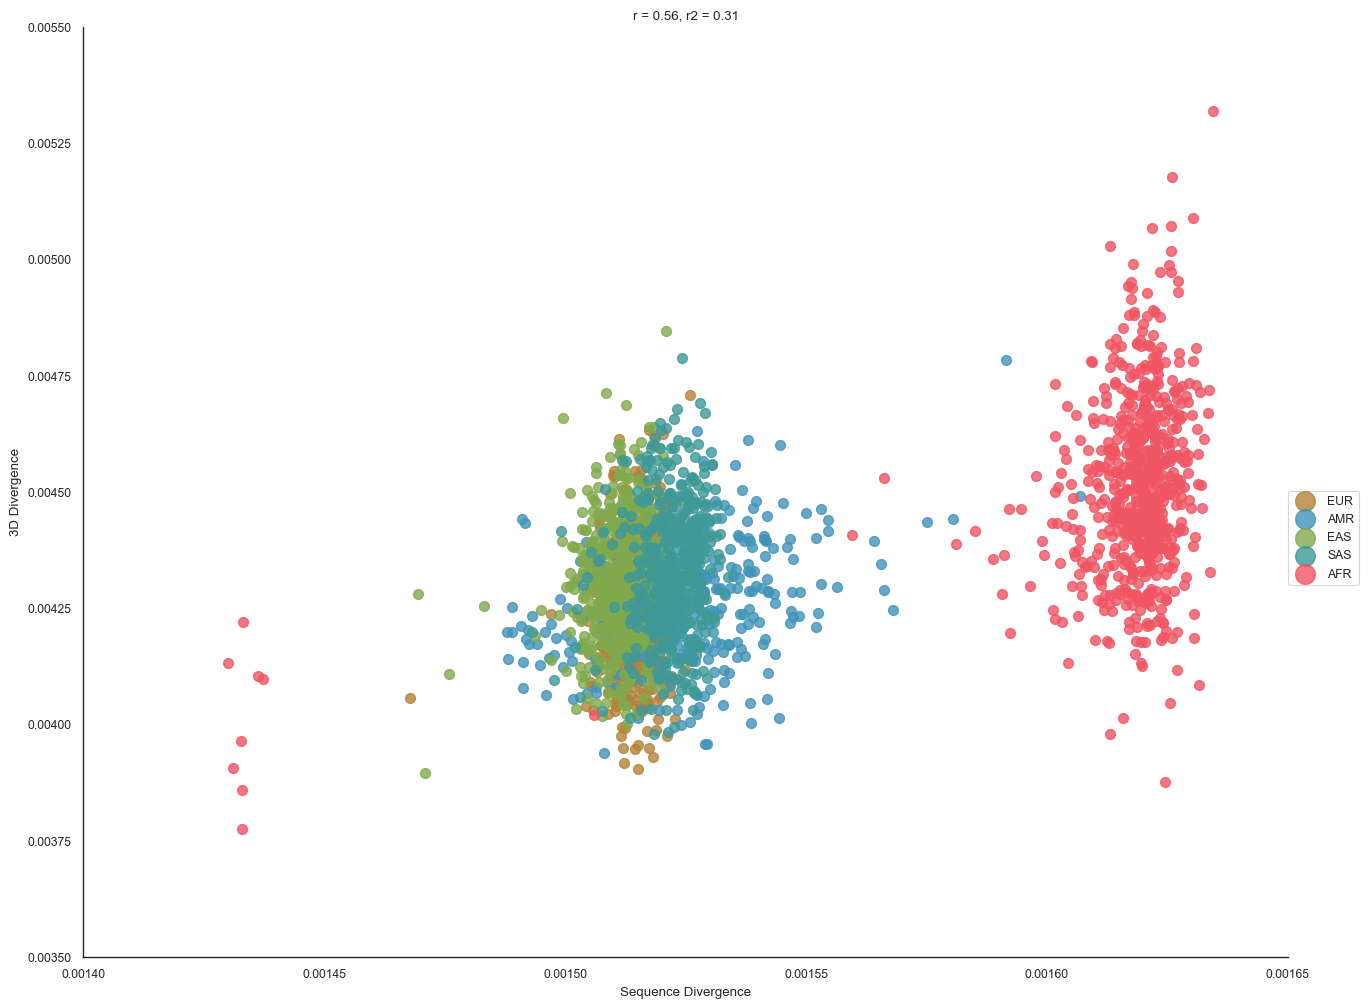

In [44]:

g=sns.lmplot(x='seq_diff',y='divergence', hue='super_pop', data=genome_wide_both,scatter_kws={'s':50},aspect=1.3,palette = sup_pal,  
hue_order = sup_order, legend=False, height=10, fit_reg=False)
slope, intercept, r, p, se = stats.linregress(genome_wide_both['seq_diff'].values, genome_wide_both['divergence'].values)
plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))
plt.ylim(0.0035,0.0055)
plt.xlim(0.0014, 0.00165)
plt.xlabel('Sequence Divergence')
plt.ylabel('3D Divergence')
plt.legend(markerscale=2, loc=(1,.4))
plt.savefig("%s/sup/seq_3D_corr.svg" % FIG_PATH , bbox_inches = 'tight')


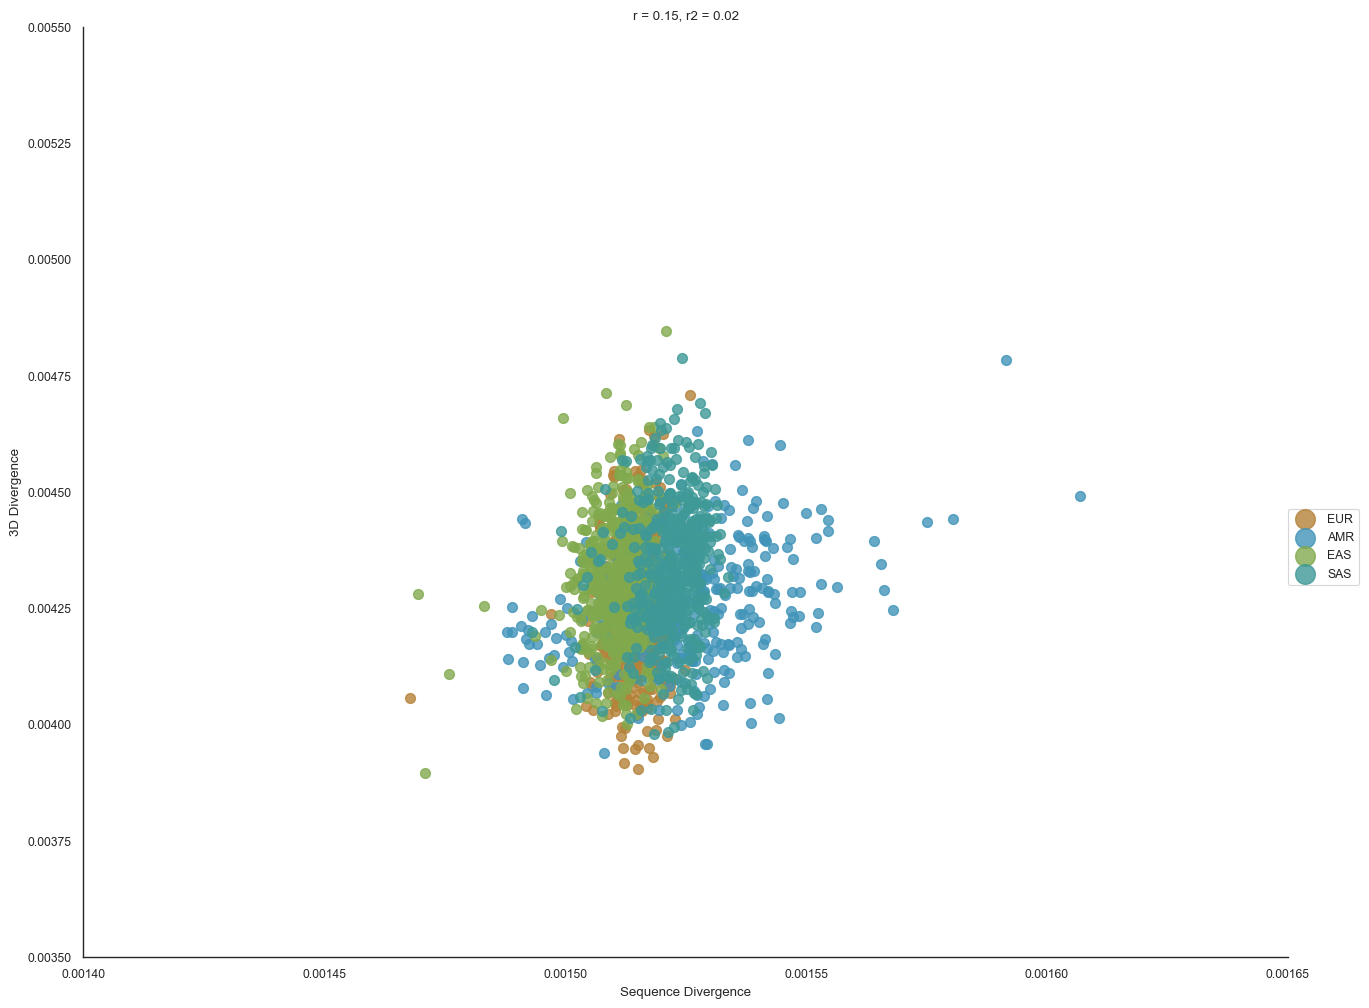

In [45]:

g=sns.lmplot(x='seq_diff',y='divergence', hue='super_pop', data=genome_wide_both[genome_wide_both.super_pop!='AFR'],scatter_kws={'s':50},aspect=1.3,palette = sup_pal,  
hue_order = sup_order, legend=False, height=10, fit_reg=False)
slope, intercept, r, p, se = stats.linregress(genome_wide_both[genome_wide_both.super_pop!='AFR']['seq_diff'].values, genome_wide_both[genome_wide_both.super_pop!='AFR']['divergence'].values)
plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))
plt.ylim(0.0035,0.0055)
plt.xlim(0.0014, 0.00165)
plt.xlabel('Sequence Divergence')
plt.ylabel('3D Divergence')
plt.legend(markerscale=2, loc=(1,.4))
plt.savefig("%s/sup/seq_3D_corr_noAFR.svg" % FIG_PATH , bbox_inches = 'tight')

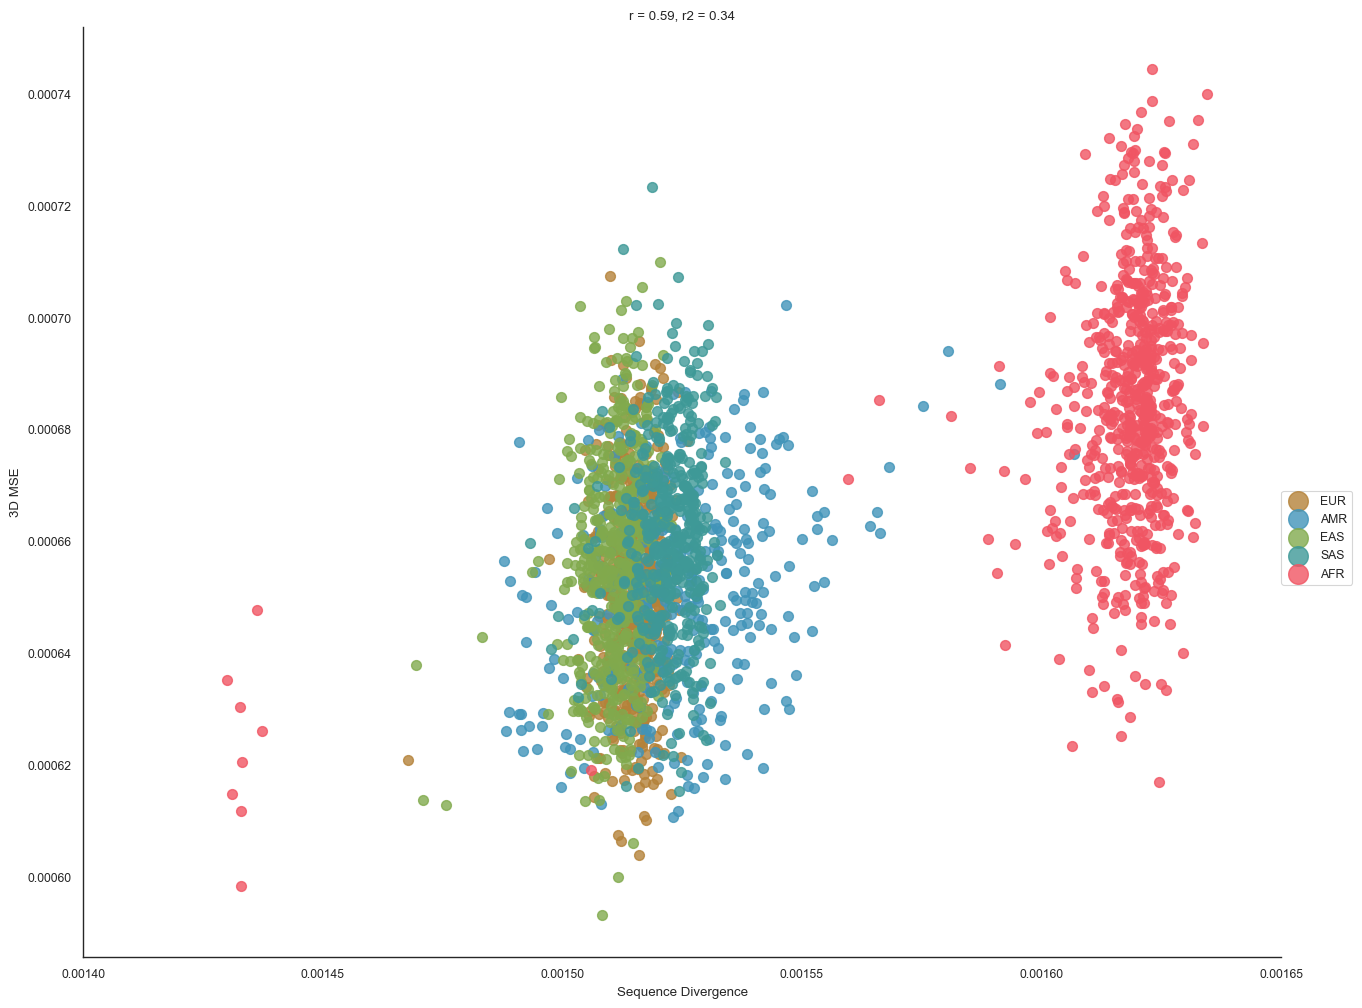

In [46]:

g=sns.lmplot(x='seq_diff',y='genome_avg_mse', hue='super_pop', data=genome_wide_both_mse,scatter_kws={'s':50},aspect=1.3,palette = sup_pal,  
hue_order = sup_order, legend=False, height=10, fit_reg=False)
slope, intercept, r, p, se = stats.linregress(genome_wide_both_mse['seq_diff'].values, genome_wide_both_mse['genome_avg_mse'].values)
plt.title('r = %0.2f, r2 = %0.2f' % (r, r**2))
# plt.ylim(0.0035,0.0055)
plt.xlim(0.0014, 0.00165)
plt.xlabel('Sequence Divergence')
plt.ylabel('3D MSE')
plt.legend(markerscale=2, loc=(1,.4))
plt.savefig("%s/sup/seq_3D_corr_mse.svg" % FIG_PATH , bbox_inches = 'tight')


### Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


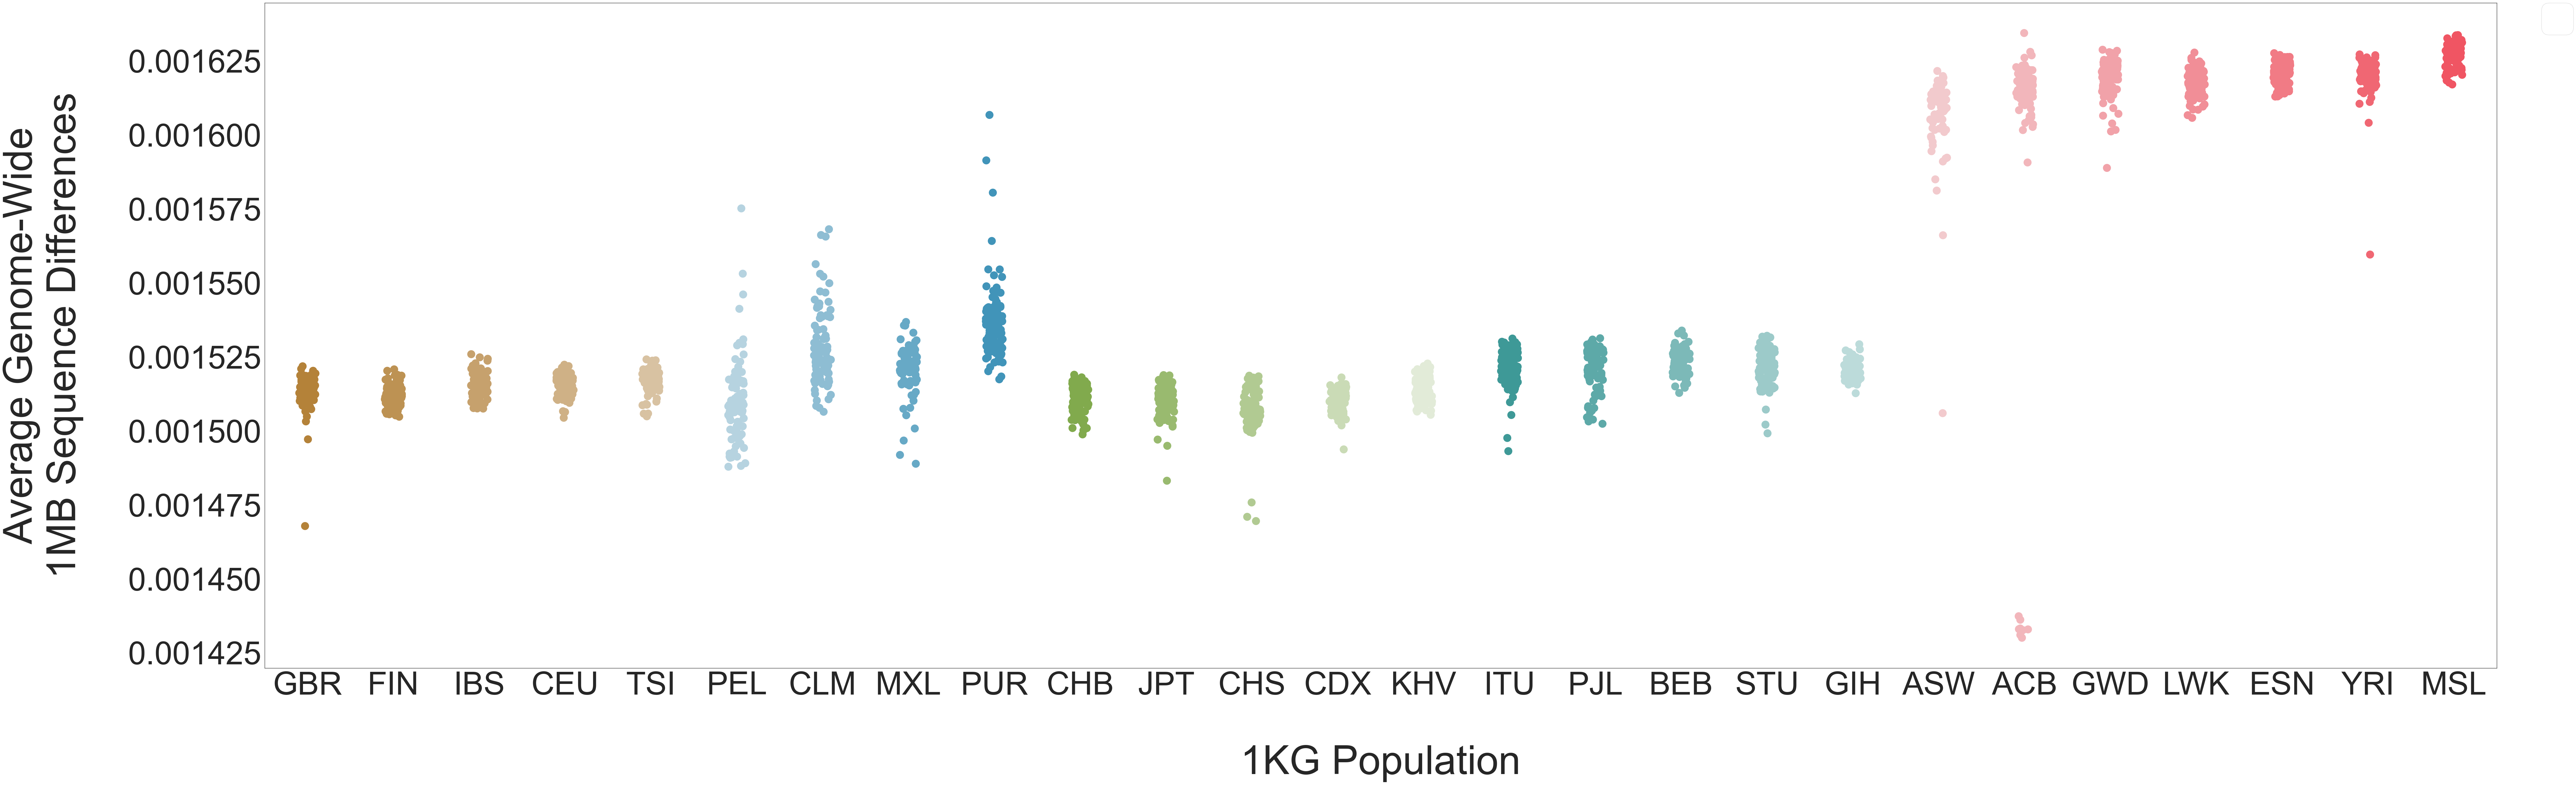

In [47]:
plot_pop_metric(genome_wide, sub_order, sub_pal, 'seq_diff','Average Genome-Wide\n1MB Sequence Differences\n')

In [48]:
seq_id

AFR                                          \
                           ACB                                           
                        female                                           
                       HG01880   HG01883   HG01886   HG01889   HG01894   
chr   windowStartPos                                                     
chr1  1048576         0.997931  0.997857  0.997736  0.997972  0.997853   
      1572864         0.998110  0.998123  0.998151  0.998192  0.998240   
      3145728         0.997773  0.997626  0.997702  0.997618  0.997599   
      3670016         0.997611  0.997586  0.997629  0.997523  0.997541   
      4194304         0.997862  0.997857  0.997876  0.997823  0.997825   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.997848  0.997856  0.998013  0.997739  0.997728   
      47185920        0.997958  0.997890  0.998061  0.997890  0.997886   
      47710208        0.997506  0.997428  0.997446  0.997409  0.997358   
      48234496        0.996772  0.996774  0.996632  0.996674  0.996636   
      48758784        0.996976  0.996884  0.996962  0.996830  0.996856   

                                                                        ...  \
                                                                        ...   
                                                                        ...   
                       HG01896   HG01915   HG01956   HG01958   HG01985  ...   
chr   windowStartPos                                                    ...   
chr1  1048576         0.997803  0.997801  0.997876  0.997949  0.997746  ...   
      1572864         0.998150  0.998139  0.998133  0.998239  0.998172  ...   
      3145728         0.997694  0.997623  0.997636  0.997598  0.997805  ...   
      3670016         0.997658  0.997585  0.997465  0.997543  0.997638  ...   
      4194304         0.997950  0.997828  0.997877  0.997899  0.997946  ...   
...                        ...       ...       ...       ...       ...  ...   
chr22 46661632        0.997716  0.997778  0.997693  0.997761  0.997622  ...   
      47185920        0.997856  0.997869  0.997845  0.997894  0.997779  ...   
      47710208        0.997430  0.997439  0.997389  0.997455  0.997372  ...   
      48234496        0.996786  0.996753  0.996626  0.996852  0.996730  ...   
      48758784        0.996988  0.996965  0.996849  0.997128  0.997022  ...   

                           SAS                                          \
                           STU                                           
                          male                                           
                       HG03998   HG03999   HG04003   HG04006   HG04033   
chr   windowStartPos                                                     
chr1  1048576         0.998213  0.998108  0.997961  0.998037  0.997933   
      1572864         0.998325  0.998248  0.998200  0.998288  0.998113   
      3145728         0.997788  0.997863  0.997840  0.997759  0.997921   
      3670016         0.997661  0.997700  0.997652  0.997672  0.997709   
      4194304         0.997935  0.997924  0.997936  0.997987  0.997947   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.998008  0.997988  0.997975  0.997887  0.998048   
      47185920        0.998049  0.998114  0.998072  0.998012  0.998059   
      47710208        0.997605  0.997623  0.997680  0.997594  0.997581   
      48234496        0.997002  0.996917  0.997077  0.997084  0.997025   
      48758784        0.997152  0.997118  0.997272  0.997236  0.997231   

                                                                        
                                                                        
                                                                        
                       HG04039   HG04100   HG04107   HG04210   HG04229  
chr   windowStartPos                                                    
chr1  1048576         0.998

In [49]:
anc_div

AFR                                          \
                           ACB                                           
                        female                                           
                       HG01880   HG01883   HG01886   HG01889   HG01894   
chr   windowStartPos                                                     
chr1  1048576         0.000982  0.001551  0.001609  0.001618  0.003944   
      1572864         0.001445  0.001657  0.001909  0.001959  0.004272   
      3145728         0.001283  0.000683  0.002624  0.002458  0.002041   
      3670016         0.005119  0.004878  0.001901  0.002729  0.004874   
      4194304         0.008681  0.007497  0.004502  0.004731  0.011335   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.007145  0.001892  0.002877  0.008396  0.004389   
      47185920        0.027227  0.006835  0.003085  0.035391  0.003696   
      47710208        0.039303  0.045497  0.065454  0.123312  0.028221   
      48234496        0.183482  0.189969  0.241011  0.325763  0.195117   
      48758784        0.005628  0.014172  0.002837  0.015048  0.012794   

                                                                        ...  \
                                                                        ...   
                                                                        ...   
                       HG01896   HG01915   HG01956   HG01958   HG01985  ...   
chr   windowStartPos                                                    ...   
chr1  1048576         0.002145  0.001217  0.000658  0.002693  0.002143  ...   
      1572864         0.002573  0.001838  0.002096  0.006768  0.002917  ...   
      3145728         0.002661  0.000521  0.002490  0.003151  0.002294  ...   
      3670016         0.001535  0.004503  0.004706  0.004062  0.006236  ...   
      4194304         0.006836  0.007988  0.010622  0.007037  0.014604  ...   
...                        ...       ...       ...       ...       ...  ...   
chr22 46661632        0.002007  0.003275  0.006965  0.002858  0.006226  ...   
      47185920        0.007332  0.002898  0.017533  0.005524  0.002682  ...   
      47710208        0.040250  0.046180  0.030846  0.038820  0.033115  ...   
      48234496        0.174392  0.179873  0.198540  0.168733  0.161755  ...   
      48758784        0.003188  0.005283  0.012890  0.003300  0.013330  ...   

                           SAS                                          \
                           STU                                           
                          male                                           
                       HG03998   HG03999   HG04003   HG04006   HG04033   
chr   windowStartPos                                                     
chr1  1048576         0.000387  0.000713  0.000919  0.000718  0.000841   
      1572864         0.001048  0.000703  0.001067  0.000496  0.001208   
      3145728         0.003141  0.004537  0.000520  0.000528  0.001665   
      3670016         0.005861  0.006603  0.004933  0.004321  0.004428   
      4194304         0.009956  0.011672  0.013004  0.005318  0.008290   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.003228  0.002667  0.003284  0.002222  0.001290   
      47185920        0.007095  0.003824  0.004329  0.003580  0.003119   
      47710208        0.037299  0.045959  0.036592  0.034629  0.043876   
      48234496        0.166427  0.189953  0.157409  0.160880  0.186454   
      48758784        0.005060  0.005483  0.003194  0.004617  0.005598   

                                                                        
                                                                        
                                                                        
                       HG04039   HG04100   HG04107   HG04210   HG04229  
chr   windowStartPos                                                    
chr1  1048576         0.000

In [50]:
seq_div

NameError: name 'seq_div' is not defined

In [51]:
seq_div = 1-seq_id

In [52]:
corrs = seq_div.corrwith(anc_div, method='spearman', axis =1)

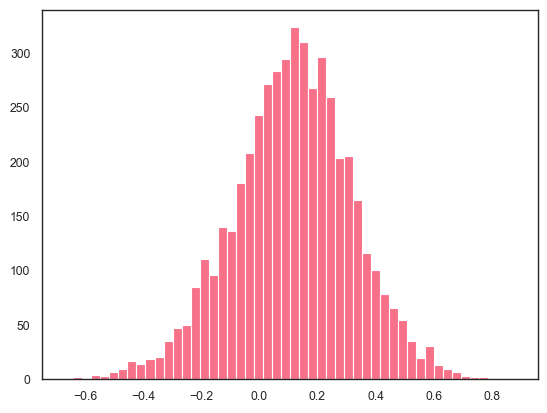

In [53]:
plt.hist(corrs, bins = 50)
plt.savefig("%s/sup/all_indivs_seq3dcorr_by_windows.svg" % FIG_PATH)

In [56]:
corrs.std()

0.20562207882798594

# Windows

## chrm plots

In [33]:
anc_div['EUR']['CEU']['female']

NA06985   NA06989   NA07000   NA07037   NA07056  \
chr   windowStartPos                                                     
chr1  1048576         0.000411  0.000873  0.000204  0.000386  0.000657   
      1572864         0.001357  0.001878  0.000731  0.001288  0.001718   
      3145728         0.002497  0.002578  0.004579  0.001972  0.000329   
      3670016         0.005025  0.002146  0.005362  0.003989  0.004696   
      4194304         0.008677  0.003120  0.013928  0.008870  0.012571   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.004356  0.002338  0.002032  0.003703  0.004531   
      47185920        0.004604  0.002220  0.001682  0.005886  0.002626   
      47710208        0.002112  0.029672  0.027410  0.012319  0.053957   
      48234496        0.009182  0.145114  0.151948  0.042735  0.214430   
      48758784        0.004482  0.004985  0.008917  0.003745  0.005849   

                       NA10847   NA11830   NA11832   NA11840   NA11892  ...  \
chr   windowStartPos                                                    ...   
chr1  1048576         0.000257  0.001056  0.000374  0.000203  0.000855  ...   
      1572864         0.001297  0.000637  0.001281  0.001245  0.002184  ...   
      3145728         0.000267  0.000817  0.001672  0.001987  0.000362  ...   
      3670016         0.005754  0.003967  0.004964  0.004359  0.004670  ...   
      4194304         0.009125  0.008087  0.010490  0.008234  0.010319  ...   
...                        ...       ...       ...       ...       ...  ...   
chr22 46661632        0.002430  0.003405  0.001880  0.004078  0.002827  ...   
      47185920        0.005576  0.003520  0.004624  0.005643  0.003019  ...   
      47710208        0.037621  0.075488  0.038215  0.033526  0.106486  ...   
      48234496        0.185477  0.234013  0.175339  0.173649  0.310034  ...   
      48758784        0.004986  0.004235  0.002787  0.006675  0.003615  ...   

                       NA12776   NA12778   NA12813   NA12815   NA12828  \
chr   windowStartPos                                                     
chr1  1048576         0.000297  0.001661  0.000247  0.001232  0.000293   
      1572864         0.001027  0.001703  0.000511  0.000928  0.000666   
      3145728         0.000719  0.004656  0.002526  0.004005  0.005186   
      3670016         0.004560  0.007261  0.005755  0.004322  0.006794   
      4194304         0.007455  0.012313  0.010349  0.010379  0.010187   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.004102  0.003456  0.004158  0.001373  0.002049   
      47185920        0.008555  0.002599  0.003142  0.001923  0.004777   
      47710208        0.037928  0.083976  0.019782  0.048034  0.082459   
      48234496        0.162562  0.275845  0.056740  0.189060  0.283739   
      48758784        0.005808  0.003036  0.007029  0.003731  0.003671   

                       NA12830   NA12843   NA12873   NA12878   NA12890  
chr   windowStartPos                                                    
chr1  1048576         0.000442  0.000268  0.000483  0.000303  0.000362  
      1572864         0.001633  0.001115  0.000680  0.000633  0.001840  
      3145728         0.002867  0.001884  0.001900  0.005379  0.005205  
      3670016         0.005436  0.003996  0.003364  0.003560  0.003759  
      4194304         0.011925  0.010233  0.008798  0.006104  0.009435  
...                        ...       ...       ...       ...       ...  
chr22 46661632        0.003123  0.003250  0.003295  0.003315  0.001552  
      47185920        0.003120  0.004901  0.003912  0.005605  0.002391  
      47710208        0.042242  0.003047  0.087510  0.103786  0.107566  
      48234496        0.172930  0.006761  0.288330  0.302403  0.294016  
      48758784        0.002082  0.005626  0.003619  0.003768  0.003623  

[4873 rows x 50 columns]

In [34]:
windows = windows_to_keep.to_frame()

In [35]:
windows

chr  windowStartPos
chr   windowStartPos                       
chr1  1048576          chr1         1048576
      1572864          chr1         1572864
      3145728          chr1         3145728
      3670016          chr1         3670016
      4194304          chr1         4194304
...                     ...             ...
chr22 46661632        chr22        46661632
      47185920        chr22        47185920
      47710208        chr22        47710208
      48234496        chr22        48234496
      48758784        chr22        48758784

[4873 rows x 2 columns]

In [36]:
anc_div_summary = pd.concat([pd.DataFrame(anc_div.mean(axis=1), columns=['mean_div']), pd.DataFrame(anc_div.std(axis=1), columns=['std_div'])], axis=1)


<Axes: xlabel='mean_div', ylabel='std_div'>

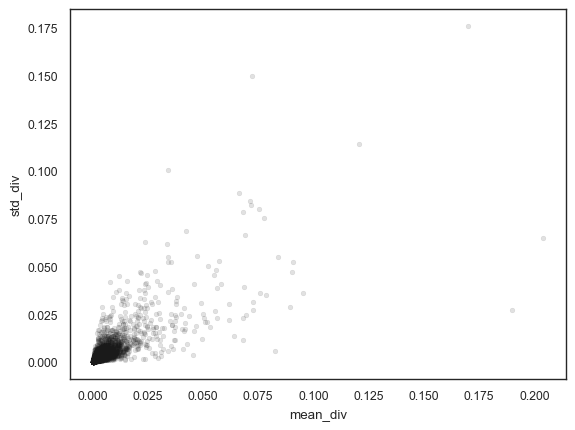

In [37]:
sns.scatterplot(x = 'mean_div', y = 'std_div', data = anc_div_summary, s=12,alpha=0.13, color='k', edgecolor='k')

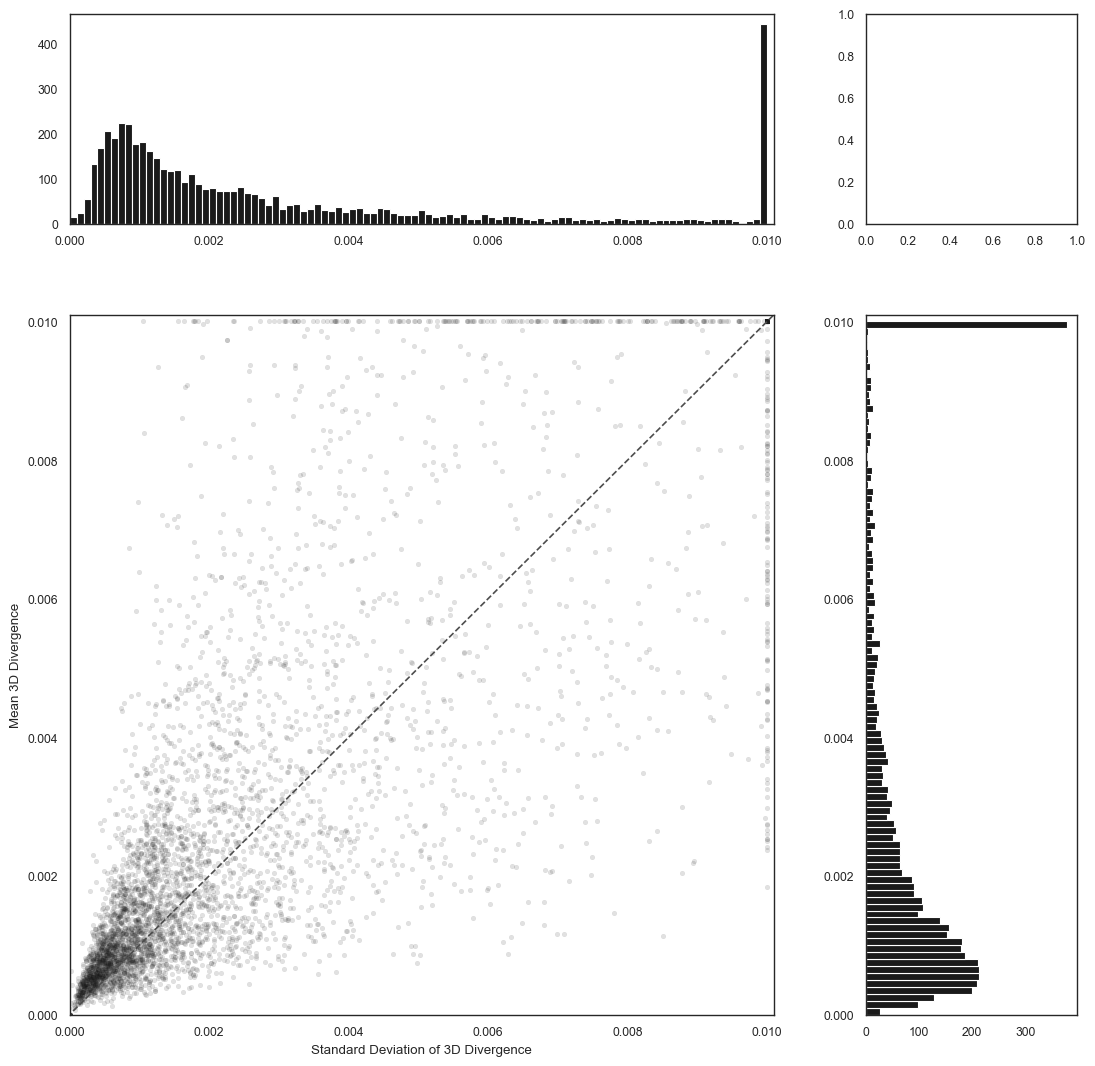

In [38]:
# Without color
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(13,13),gridspec_kw={'width_ratios': [5, 1.5], 'height_ratios': [1.5, 5]})         # Sample figsize in inches
anc_div_summary_clipped = anc_div_summary.copy(deep=True)
anc_div_summary_clipped['mean_div'] = anc_div_summary_clipped['mean_div'].clip(0,0.01)
anc_div_summary_clipped['std_div'] = anc_div_summary_clipped['std_div'].clip(0,0.01)
g = sns.scatterplot(x="std_div", y="mean_div", s=12,alpha=0.13,data=anc_div_summary_clipped,ax=ax[1,0], color='k',linewidth=.15, edgecolor='k',)#, x_bins=np.arange(0.9965,1,0.00025))  #scatter_kws={'s':2}
_ = g.set(xlim=(0, 0.0101), xlabel='Standard Deviation of 3D Divergence')
_ = g.set(ylim=(0, 0.0101), ylabel = 'Mean 3D Divergence')
_ = ax[1,0].plot([-3, 3], [-3, 3], ls="--", c=".3")


_ = ax[0,0].hist(anc_div_summary_clipped[['mean_div']].values.flatten(),color='k', bins = 100)
_ = ax[0,0].set(xlim=(0, 0.0101))


_ = ax[1,1].hist(anc_div_summary_clipped[['std_div']].values.flatten(), orientation='horizontal', color='k', bins=100)
_ = ax[1,1].set(ylim=(0, 0.0101))
#ax[1,1].set()


plt.show()

### old

In [39]:
anc_div.loc['chr1'].mean(axis=1)

windowStartPos
1048576      0.001070
1572864      0.001491
3145728      0.003123
3670016      0.004618
4194304      0.008626
               ...   
245366784    0.004747
245891072    0.001631
246415360    0.011921
246939648    0.010787
247463936    0.008230
Length: 418, dtype: float64

In [40]:
kruskal = stats.kruskal(anc_div.loc['chr1'].mean(axis=1), 
                        anc_div.loc['chr2'].mean(axis=1), 
                        anc_div.loc['chr3'].mean(axis=1), 
                        anc_div.loc['chr4'].mean(axis=1), 
                        anc_div.loc['chr5'].mean(axis=1), 
                        anc_div.loc['chr6'].mean(axis=1), 
                        anc_div.loc['chr7'].mean(axis=1), 
                        anc_div.loc['chr8'].mean(axis=1), 
                        anc_div.loc['chr9'].mean(axis=1), 
                        anc_div.loc['chr10'].mean(axis=1), 
                        anc_div.loc['chr11'].mean(axis=1), 
                        anc_div.loc['chr12'].mean(axis=1), 
                        anc_div.loc['chr13'].mean(axis=1), 
                        anc_div.loc['chr14'].mean(axis=1), 
                        anc_div.loc['chr15'].mean(axis=1), 
                        anc_div.loc['chr16'].mean(axis=1), 
                        anc_div.loc['chr17'].mean(axis=1), 
                        anc_div.loc['chr18'].mean(axis=1), 
                        anc_div.loc['chr19'].mean(axis=1), 
                        anc_div.loc['chr20'].mean(axis=1), 
                        anc_div.loc['chr21'].mean(axis=1), 
                        anc_div.loc['chr22'].mean(axis=1) 
                        )
#conover = sp.posthoc_conover(anc, val_col='divergence', group_col='super_pop', p_adjust = 'holm')

In [41]:
kruskal = stats.kruskal(anc_div.loc['chr1'].median(axis=1), 
                        anc_div.loc['chr2'].median(axis=1), 
                        anc_div.loc['chr3'].median(axis=1), 
                        anc_div.loc['chr4'].median(axis=1), 
                        anc_div.loc['chr5'].median(axis=1), 
                        anc_div.loc['chr6'].median(axis=1), 
                        anc_div.loc['chr7'].median(axis=1), 
                        anc_div.loc['chr8'].median(axis=1), 
                        anc_div.loc['chr9'].median(axis=1), 
                        anc_div.loc['chr10'].median(axis=1), 
                        anc_div.loc['chr11'].median(axis=1), 
                        anc_div.loc['chr12'].median(axis=1), 
                        anc_div.loc['chr13'].median(axis=1), 
                        anc_div.loc['chr14'].median(axis=1), 
                        anc_div.loc['chr15'].median(axis=1), 
                        anc_div.loc['chr16'].median(axis=1), 
                        anc_div.loc['chr17'].median(axis=1), 
                        anc_div.loc['chr18'].median(axis=1), 
                        anc_div.loc['chr19'].median(axis=1), 
                        anc_div.loc['chr20'].median(axis=1), 
                        anc_div.loc['chr21'].median(axis=1), 
                        anc_div.loc['chr22'].median(axis=1) 
                        )
#conover = sp.posthoc_conover(anc, val_col='divergence', group_col='super_pop', p_adjust = 'holm')

In [42]:
kruskal

KruskalResult(statistic=89.92973696641457, pvalue=1.6595149862322432e-10)

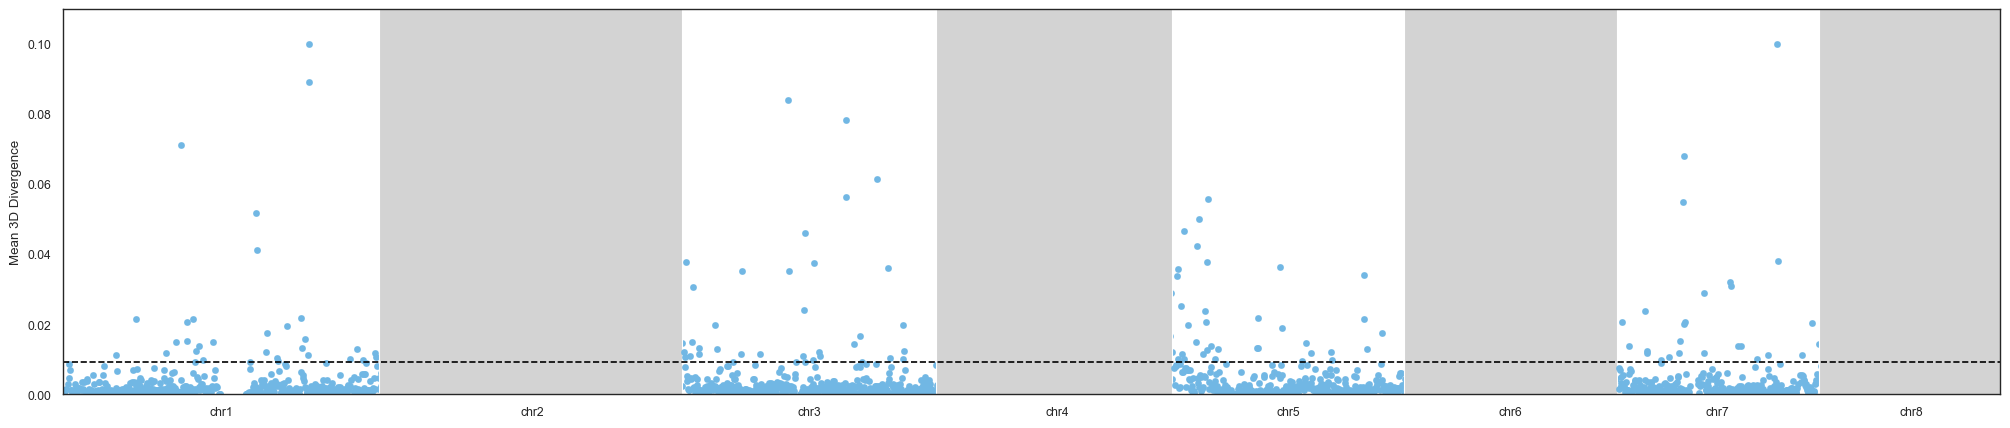

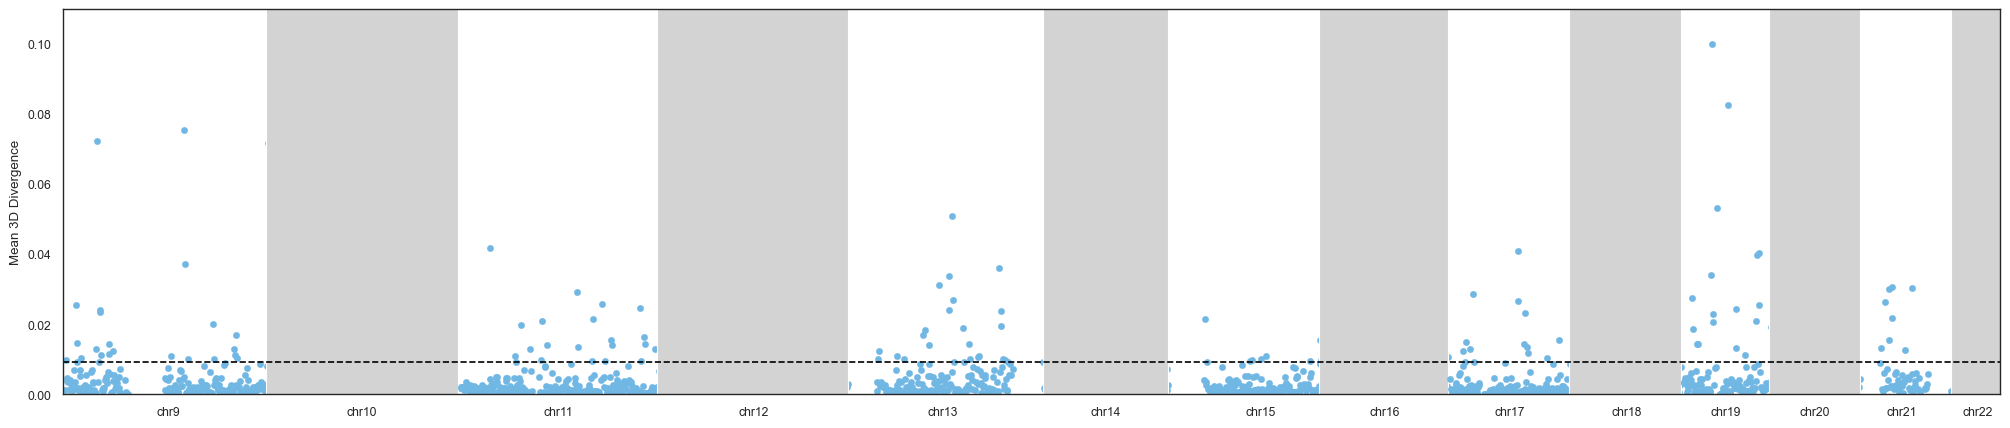

In [43]:

windows = pd.DataFrame(anc_div.mean(axis=1), columns=['mean_div'])
windows['mean_div_clipped'] = windows['mean_div'].clip(0,.1)

chroms = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8'] # did this to split the plot into a top panel and bottom, but you could just put all chroms here for 1 linear plot

fig = plt.figure(figsize=(25,5))
x_labels = []
x_labels_pos = []
ax = fig.add_subplot(111)
ax.set_facecolor('white')


maxLoc = 0
num = 0
for chrm in chroms:
    num+=1
    windows['center_loc'] = (windows.index.get_level_values(1) + 2**20)/2 + maxLoc # center_loc is the midway point in the region
    
    _ = plt.scatter( 'center_loc','mean_div_clipped',data = windows.loc[chrm], lw=.1, color='#71B7E4')
    maxLoc = windows.loc[chrm]['center_loc'].max() + 10 # max loc iteratively becomes larger with each chromosome to place everything on the same x-axis. Remove the + 10 if you don't want space between the chroms
    x_labels_pos.append(windows.loc[chrm]['center_loc'].mean()) # save the position for the xlabels
    if (num % 2) == 0: # alternate gray and white background
        _ = ax.axvspan(windows.loc[chrm]['center_loc'].min(), windows.loc[chrm]['center_loc'].max(), facecolor='lightgray')
_ = plt.hlines(0.009301247270217052, xmin=0, xmax=maxLoc, color='black', linestyles='dashed')
_ = ax.set_xticks(x_labels_pos)
_ = ax.set_xticklabels(chroms)
_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0,0.11)
_ = ax.set_ylabel('Mean 3D Divergence')
maxLocOld = maxLoc
#plt.savefig("results/plots/window_divergence_top.svg" , bbox_inches = 'tight')
plt.show()


chroms = ['chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22']
fig = plt.figure(figsize=(25,5))
x_labels = []
x_labels_pos = []
ax = fig.add_subplot(111)
ax.set_facecolor('white')


maxLoc = 0
num = 0

for chrm in chroms:
    num+=1
    windows['center_loc'] = (windows.index.get_level_values(1) + 2**20)/2 + maxLoc # center_loc is the midway point in the region
    _ = plt.scatter( 'center_loc','mean_div_clipped',data = windows.loc[chrm], lw=.1, color='#71B7E4')
    maxLoc = windows.loc[chrm]['center_loc'].max() + 10 # max loc iteratively becomes larger with each chromosome to place everything on the same x-axis. Remove the + 10 if you don't want space between the chroms
    x_labels_pos.append(windows.loc[chrm]['center_loc'].mean()) # save the position for the xlabels
    if (num % 2) == 0: # alternate gray and white background
        _ = ax.axvspan(windows.loc[chrm]['center_loc'].min(), windows.loc[chrm]['center_loc'].max(), facecolor='lightgray')
_ = plt.hlines(0.009301247270217052, xmin=0, xmax=maxLoc, color='black', linestyles='dashed')
_ = ax.set_xticks(x_labels_pos)
_ = ax.set_xticklabels(chroms)
_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0,0.11)
_ = ax.set_ylabel('Mean 3D Divergence')
maxLocOld = maxLoc
#plt.savefig("results/plots/window_divergence_bottom.svg" , bbox_inches = 'tight')
plt.show()

In [44]:
windows.groupby(level=[0]).mean()

mean_div  mean_div_clipped    center_loc
chr                                            
chr1   0.003778          0.003563  7.017872e+08
chr10  0.005696          0.005696  6.726582e+08
chr11  0.003210          0.003210  6.732515e+08
chr12  0.003266          0.003266  6.728121e+08
chr13  0.004789          0.004789  6.718161e+08
chr14  0.003902          0.003902  6.709577e+08
chr15  0.002470          0.002470  6.707902e+08
chr16  0.003743          0.003743  6.623860e+08
chr17  0.003338          0.003338  6.603940e+08
chr18  0.004875          0.004875  6.598009e+08
chr19  0.008383          0.007709  6.541402e+08
chr2   0.004100          0.004100  7.004959e+08
chr20  0.004833          0.004833  6.556272e+08
chr21  0.006011          0.006011  6.535251e+08
chr22  0.006953          0.005217  6.562427e+08
chr3   0.004265          0.004265  6.895436e+08
chr4   0.005484          0.005484  6.884614e+08
chr5   0.004426          0.004426  6.851836e+08
chr6   0.003902          0.003902  6.819957e+08
chr7   0.004172          0.004100  6.789908e+08
chr8   0.004553          0.004553  6.764227e+08
chr9   0.004505          0.004505  6.753317e+08

In [45]:
mdc= pd.DataFrame(windows.mean_div_clipped)
md = pd.DataFrame(windows.mean_div)

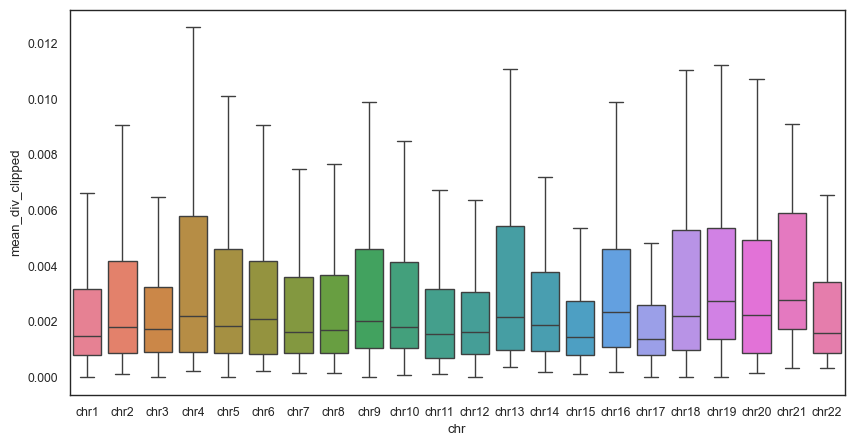

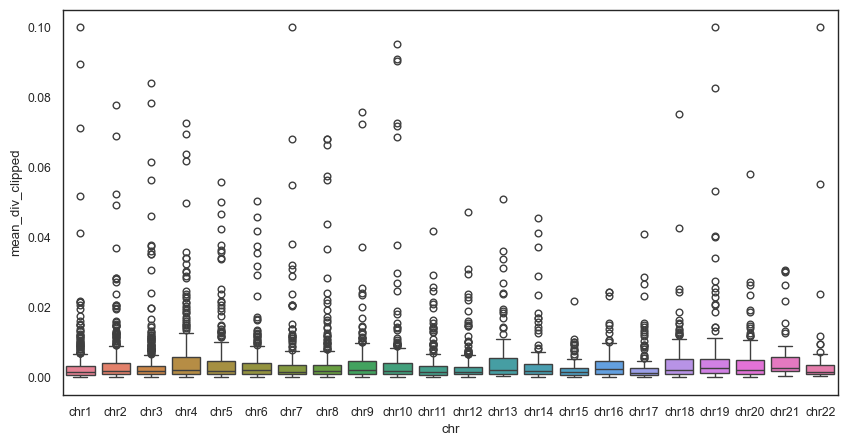

In [46]:
plt.figure(figsize=[10,5])
sns.boxplot(x='chr', y = 'mean_div_clipped', hue='chr', data=mdc, showfliers=False)
plt.figure(figsize=[10,5])
sns.boxplot(x='chr', y = 'mean_div_clipped', hue='chr', data=mdc)
plt.savefig("%s/sup/chrboxes.svg" % FIG_PATH , bbox_inches = 'tight')

<Axes: xlabel='chr', ylabel='mean_div'>

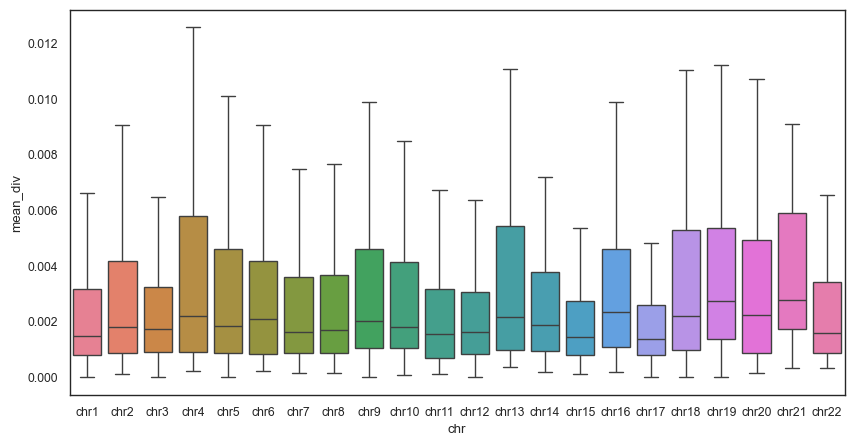

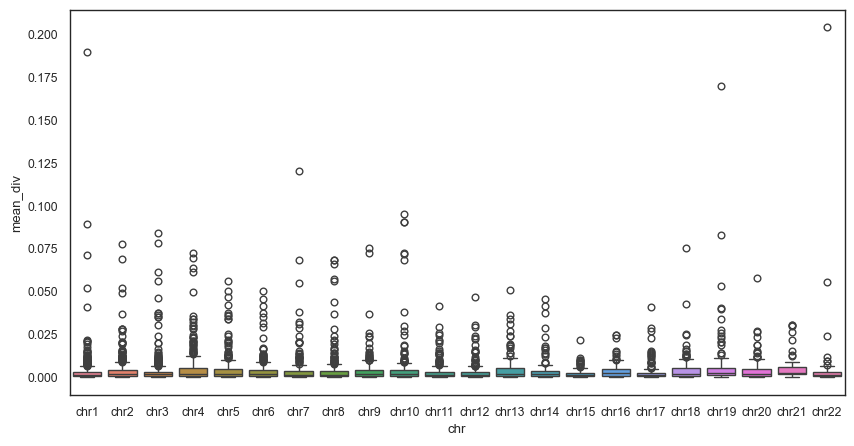

In [47]:
plt.figure(figsize=[10,5])
sns.boxplot(x='chr', y = 'mean_div', hue='chr', data=md, showfliers=False)
plt.figure(figsize=[10,5])
sns.boxplot(x='chr', y = 'mean_div', hue='chr', data=md)

In [58]:
mdc.groupby(level = 0, axis = 0).median().describe()

mean_div_clipped
count         22.000000
mean           0.001922
std            0.000391
min            0.001392
25%            0.001624
50%            0.001826
75%            0.002199
max            0.002771

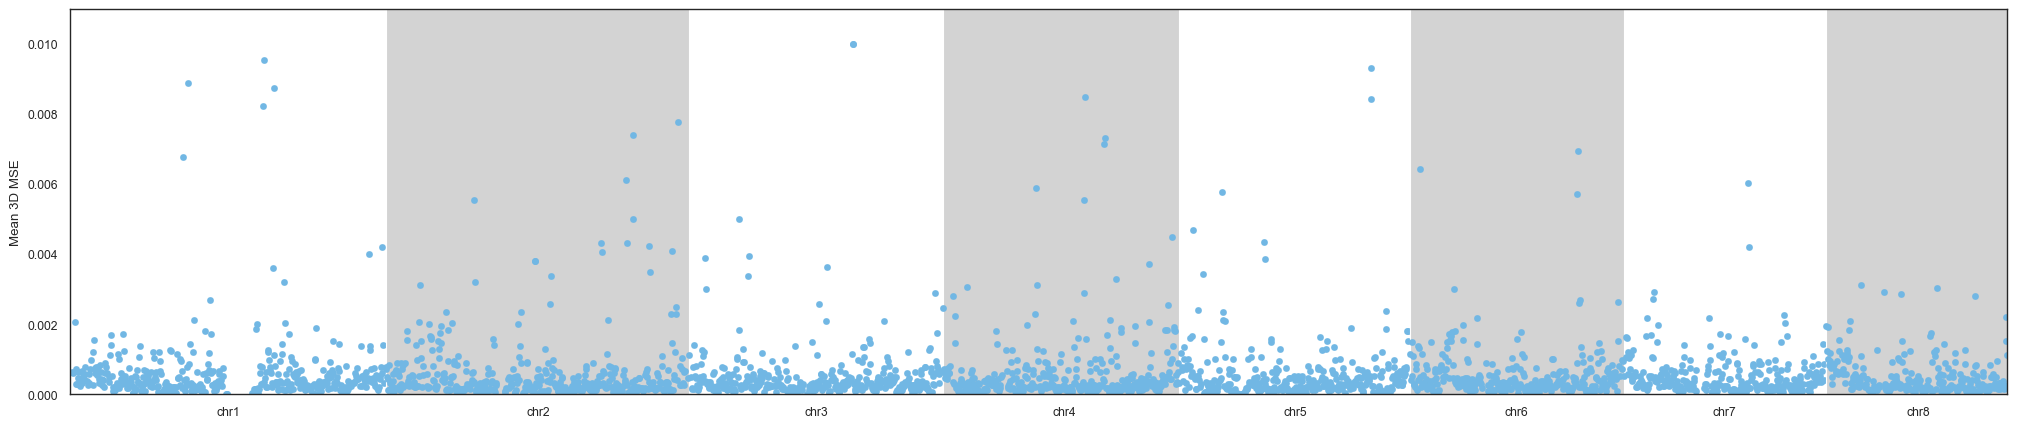

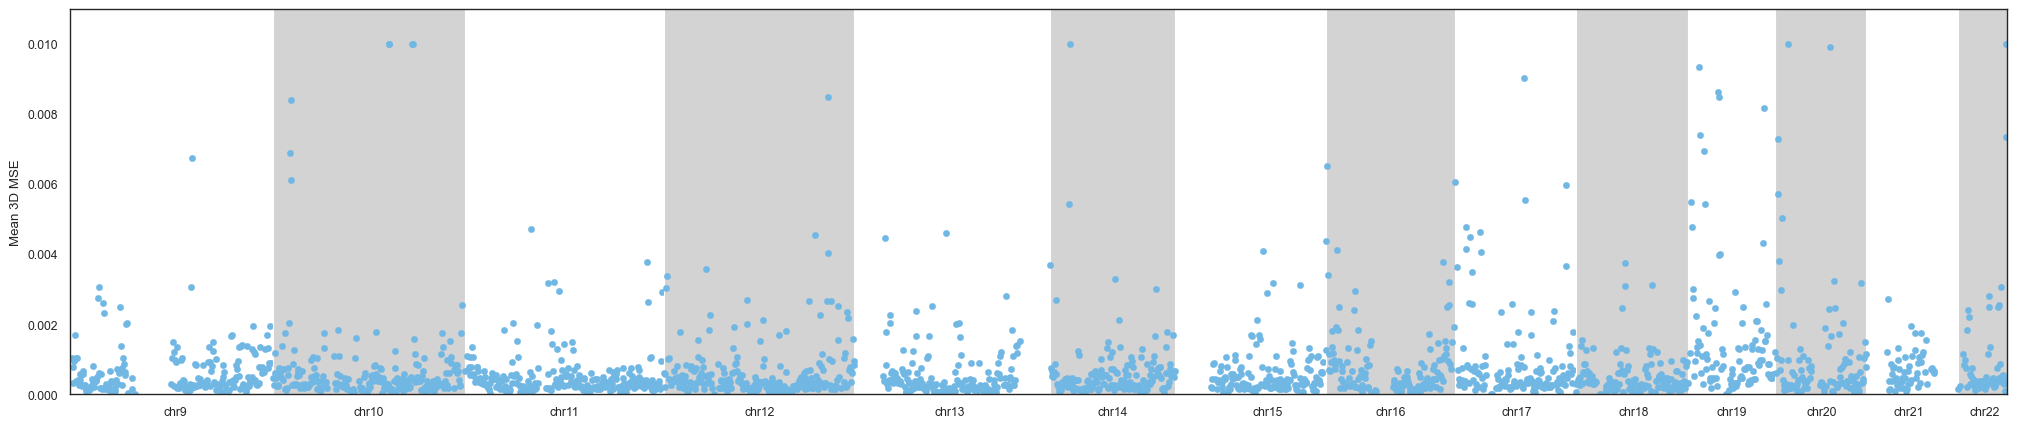

In [52]:

windows = pd.DataFrame(anc_mse.mean(axis=1), columns=['mean_mse'])
windows['mean_mse_clipped'] = windows['mean_mse'].clip(0,.01)

chroms = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8'] # did this to split the plot into a top panel and bottom, but you could just put all chroms here for 1 linear plot

fig = plt.figure(figsize=(25,5))
x_labels = []
x_labels_pos = []
ax = fig.add_subplot(111)
ax.set_facecolor('white')


maxLoc = 0
num = 0
for chrm in chroms:
    num+=1
    windows['center_loc'] = (windows.index.get_level_values(1) + 2**20)/2 + maxLoc # center_loc is the midway point in the region
    if (num % 2) == 0: # alternate gray and white background
        _ = ax.axvspan(windows.loc[chrm]['center_loc'].min(), windows.loc[chrm]['center_loc'].max(), facecolor='lightgray')
    _ = plt.scatter( 'center_loc','mean_mse_clipped',data = windows.loc[chrm], lw=.1, color='#71B7E4')
    maxLoc = windows.loc[chrm]['center_loc'].max() + 10 # max loc iteratively becomes larger with each chromosome to place everything on the same x-axis. Remove the + 10 if you don't want space between the chroms
    x_labels_pos.append(windows.loc[chrm]['center_loc'].mean()) # save the position for the xlabels

# _ = plt.hlines(0.009301247270217052, xmin=0, xmax=maxLoc, color='black', linestyles='dashed')
_ = ax.set_xticks(x_labels_pos)
_ = ax.set_xticklabels(chroms)
_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0,0.011)
_ = ax.set_ylabel('Mean 3D MSE')
maxLocOld = maxLoc
#plt.savefig("results/plots/window_divergence_top.svg" , bbox_inches = 'tight')
plt.savefig("%s/sup/window_mse_top.svg" % FIG_PATH , bbox_inches = 'tight')
plt.show()


chroms = ['chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22']
fig = plt.figure(figsize=(25,5))
x_labels = []
x_labels_pos = []
ax = fig.add_subplot(111)
ax.set_facecolor('white')


maxLoc = 0
num = 0

for chrm in chroms:
    num+=1
    windows['center_loc'] = (windows.index.get_level_values(1) + 2**20)/2 + maxLoc # center_loc is the midway point in the region
    if (num % 2) == 0: # alternate gray and white background
        _ = ax.axvspan(windows.loc[chrm]['center_loc'].min(), windows.loc[chrm]['center_loc'].max(), facecolor='lightgray')
    _ = plt.scatter( 'center_loc','mean_mse_clipped',data = windows.loc[chrm], lw=.1, color='#71B7E4')
    maxLoc = windows.loc[chrm]['center_loc'].max() + 10 # max loc iteratively becomes larger with each chromosome to place everything on the same x-axis. Remove the + 10 if you don't want space between the chroms
    x_labels_pos.append(windows.loc[chrm]['center_loc'].mean()) # save the position for the xlabels

# _ = plt.hlines(0.009301247270217052, xmin=0, xmax=maxLoc, color='black', linestyles='dashed')
_ = ax.set_xticks(x_labels_pos)
_ = ax.set_xticklabels(chroms)
_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0,0.011)
_ = ax.set_ylabel('Mean 3D MSE')
maxLocOld = maxLoc
plt.savefig("%s/sup/window_mse_bottom.svg" % FIG_PATH , bbox_inches = 'tight')
plt.show()

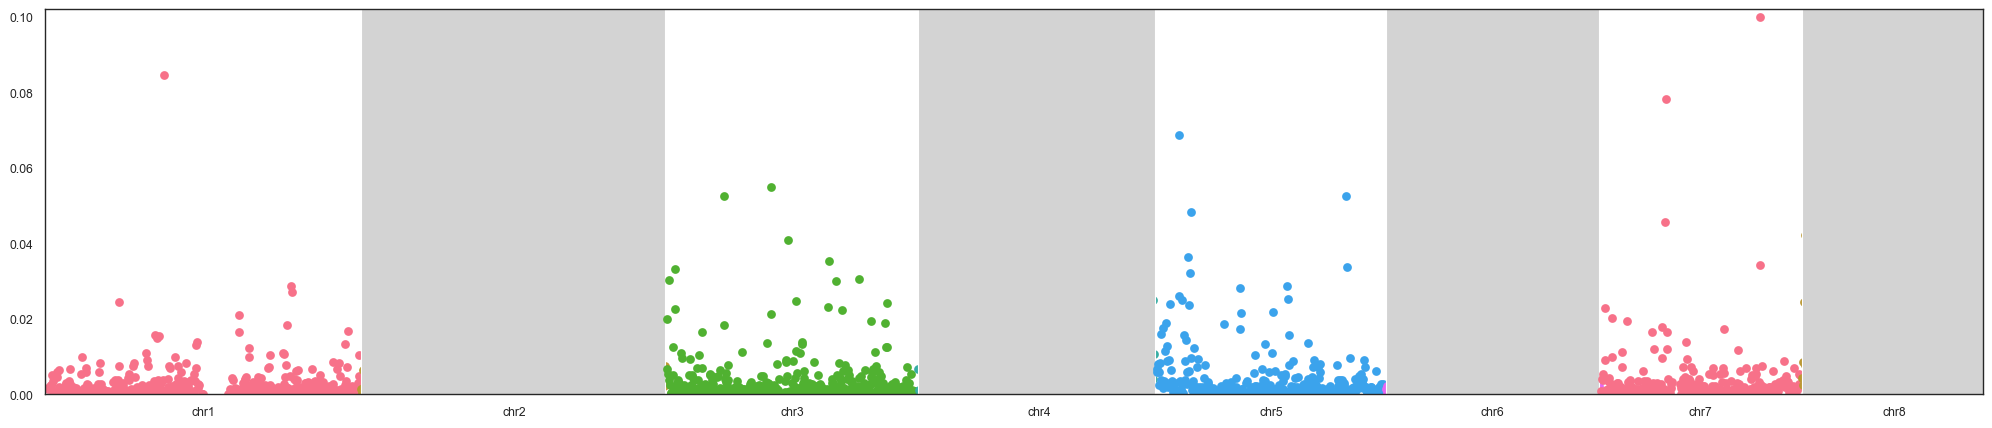

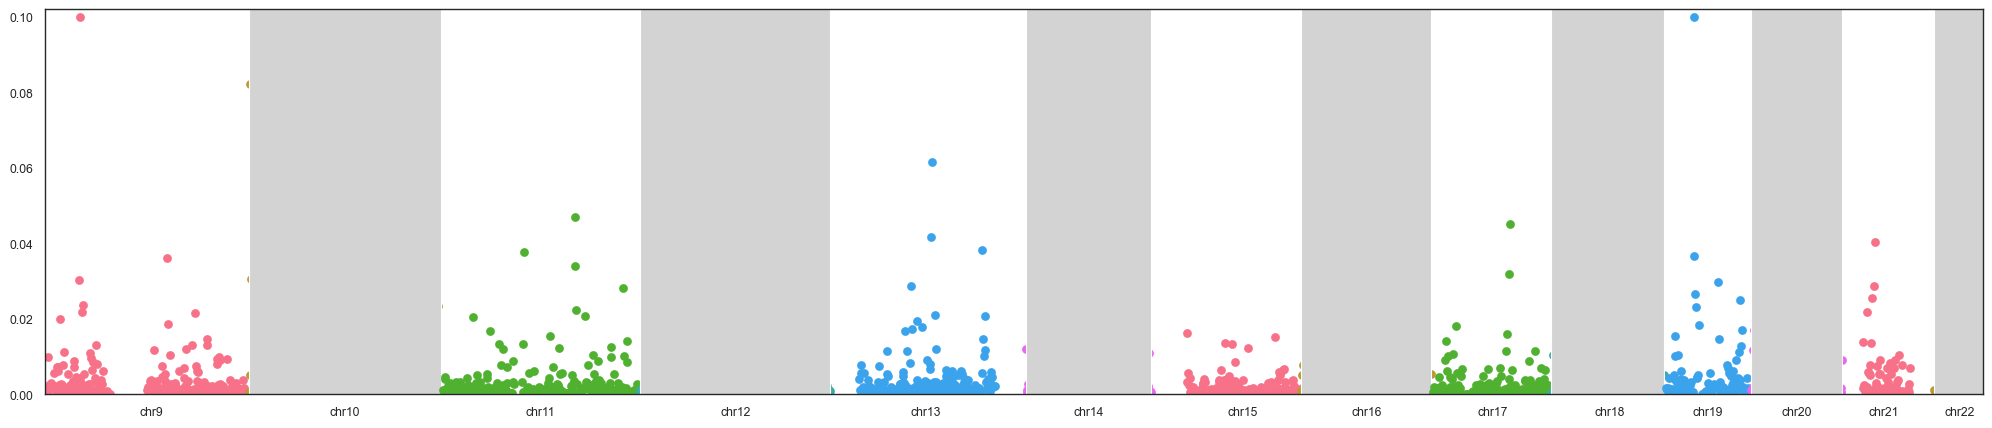

In [53]:

windows = pd.DataFrame(anc_div.std(axis=1), columns=['std_div'])
windows['std_div_clipped'] = windows['std_div'].clip(0,.1)
chroms = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8'] # did this to split the plot into a top panel and bottom, but you could just put all chroms here for 1 linear plot

fig = plt.figure(figsize=(25,5))
x_labels = []
x_labels_pos = []
ax = fig.add_subplot(111)
ax.set_facecolor('white')


maxLoc = 0
num = 0
for chrm in chroms:
    num+=1
    windows['center_loc'] = (windows.index.get_level_values(1) + 2**20)/2 + maxLoc # center_loc is the midway point in the region
    _ = plt.scatter( 'center_loc','std_div_clipped',data = windows.loc[chrm], lw=1.5)
    maxLoc = windows.loc[chrm]['center_loc'].max() + 10 # max loc iteratively becomes larger with each chromosome to place everything on the same x-axis. Remove the + 10 if you don't want space between the chroms
    x_labels_pos.append(windows.loc[chrm]['center_loc'].mean()) # save the position for the xlabels
    if (num % 2) == 0: # alternate gray and white background
        _ = ax.axvspan(windows.loc[chrm]['center_loc'].min(), windows.loc[chrm]['center_loc'].max(), facecolor='lightgray')
_ = ax.set_xticks(x_labels_pos)
_ = ax.set_xticklabels(chroms)
_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0,.102)
maxLocOld = maxLoc
plt.savefig("%s/sup/window_std_top.svg" % FIG_PATH , bbox_inches = 'tight')
plt.show()


chroms = ['chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22']
fig = plt.figure(figsize=(25,5))

x_labels = []
x_labels_pos = []
ax = fig.add_subplot(111)
ax.set_facecolor('white')


maxLoc = 0
num = 0
for chrm in chroms:
    num+=1
    windows['center_loc'] = (windows.index.get_level_values(1) + 2**20)/2 + maxLoc # center_loc is the midway point in the region
    _ = plt.scatter( 'center_loc','std_div_clipped',data = windows.loc[chrm], lw=1.5)
    maxLoc = windows.loc[chrm]['center_loc'].max() + 10 # max loc iteratively becomes larger with each chromosome to place everything on the same x-axis. Remove the + 10 if you don't want space between the chroms
    x_labels_pos.append(windows.loc[chrm]['center_loc'].mean()) # save the position for the xlabels
    if (num % 2) == 0: # alternate gray and white background
        _ = ax.axvspan(windows.loc[chrm]['center_loc'].min(), windows.loc[chrm]['center_loc'].max(), facecolor='lightgray')
_ = ax.set_xticks(x_labels_pos)
_ = ax.set_xticklabels(chroms)
_ = ax.set_xlim(0,maxLoc)
_ = ax.set_ylim(0,.102)
maxLocOld = maxLoc
plt.savefig("%s/sup/window_std_bottom.svg" % FIG_PATH , bbox_inches = 'tight')
plt.show()

Text(0.5, 0, 'Chromosome 20 Position')

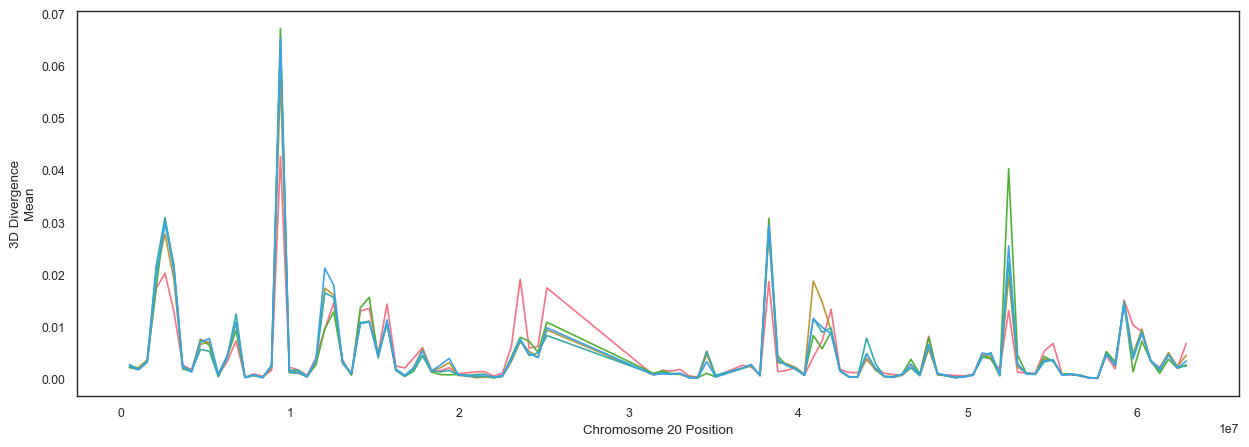

In [54]:
df = anc_div
chrm='chr20'

afr_avg = df['AFR'].mean(axis=1)
amr_avg = df['AMR'].mean(axis=1)
eur_avg = df['EUR'].mean(axis=1)
eas_avg = df['EAS'].mean(axis=1)
sas_avg = df['SAS'].mean(axis=1)

windows = pd.DataFrame([afr_avg, amr_avg, eur_avg, eas_avg, sas_avg]).transpose()
windows.columns = ['AFR','AMR','EUR','EAS','SAS']

windows['AVERAGE'] = windows.mean(axis=1)

df = windows.loc[chrm]

fig, ax = plt.subplots(figsize=[15,5])
sns.lineplot(y=df.AFR, 
             x=df.index, 
            label='AFR')
sns.lineplot(y=df.EUR, 
             x=df.index, 
            label='EUR')
sns.lineplot(y=df.EAS, 
             x=df.index, 
            label='EAS')
sns.lineplot(y=df.SAS, 
             x=df.index, 
            label='SAS')
sns.lineplot(y=df.AMR, 
             x=df.index, 
            label='AMR')


plt.legend([],[], frameon=False)

plt.ylabel('3D Divergence\nMean')
plt.xlabel('Chromosome 20 Position')

In [55]:
windows.loc['chr20'].loc[59768832]

AFR        0.010362
AMR        0.003913
EUR        0.004839
EAS        0.001419
SAS        0.004393
AVERAGE    0.004985
Name: 59768832, dtype: float64

Text(0.5, 0, 'Chromosome 20 Position')

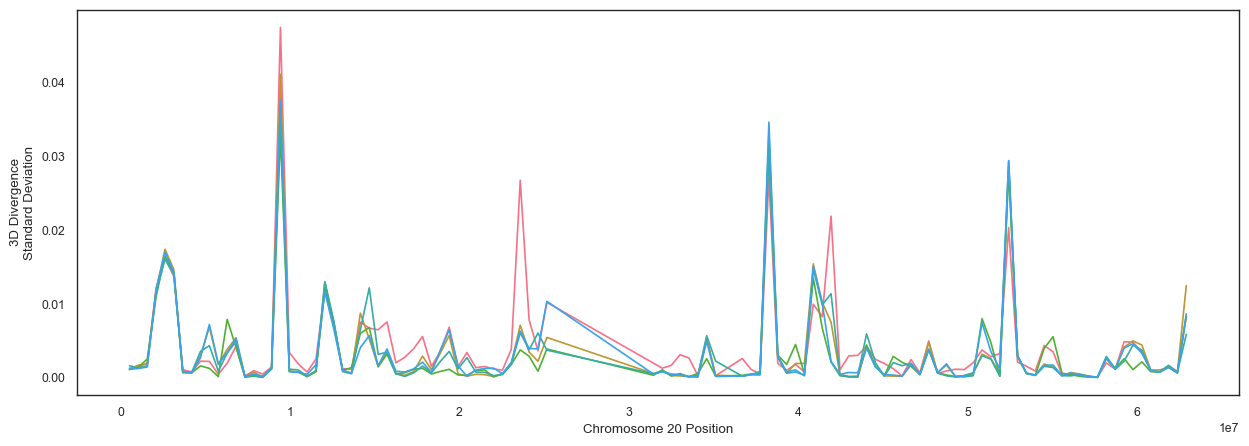

In [56]:
df = anc_div
chrm='chr20'

afr_avg = df['AFR'].std(axis=1)
amr_avg = df['AMR'].std(axis=1)
eur_avg = df['EUR'].std(axis=1)
eas_avg = df['EAS'].std(axis=1)
sas_avg = df['SAS'].std(axis=1)

windows = pd.DataFrame([afr_avg, amr_avg, eur_avg, eas_avg, sas_avg]).transpose()
windows.columns = ['AFR','AMR','EUR','EAS','SAS']

windows['AVERAGE'] = windows.mean(axis=1)

df = windows.loc[chrm]

fig, ax = plt.subplots(figsize=[15,5])
sns.lineplot(y=df.AFR, 
             x=df.index, 
            label='AFR')
sns.lineplot(y=df.EUR, 
             x=df.index, 
            label='EUR')
sns.lineplot(y=df.EAS, 
             x=df.index, 
            label='EAS')
sns.lineplot(y=df.SAS, 
             x=df.index, 
            label='SAS')
sns.lineplot(y=df.AMR, 
             x=df.index, 
            label='AMR')


plt.legend([],[], frameon=False)
plt.ylabel('3D Divergence\nStandard Deviation')
plt.xlabel('Chromosome 20 Position')


In [57]:
anc_div['AMR','PUR','female','HG01108'].idxmax()

('chr9', 22544384)

In [58]:
anc_div.loc['chr1',1048576]['AMR','PUR','female','HG01108']

0.0015560369301823584

In [59]:
afr_std =anc_div['AFR'].std(axis=1)
amr_std =anc_div['AMR'].std(axis=1)
eur_std =anc_div['EUR'].std(axis=1)
eas_std =anc_div['EAS'].std(axis=1)
sas_std =anc_div['SAS'].std(axis=1)

afr_avg =anc_div['AFR'].mean(axis=1)
amr_avg =anc_div['AMR'].mean(axis=1)
eur_avg =anc_div['EUR'].mean(axis=1)
eas_avg =anc_div['EAS'].mean(axis=1)
sas_avg =anc_div['SAS'].mean(axis=1)

windows_by_pop = pd.DataFrame([afr_avg, amr_avg, eur_avg, eas_avg, sas_avg, afr_std, amr_std, eur_std, eas_std, sas_std]).transpose()
windows_by_pop.columns = ['AFR_mean','AMR_mean','EUR_mean','EAS_mean','SAS_mean', 'AFR_std','AMR_std','EUR_std','EAS_std','SAS_std']

windows_by_pop['ALL_mean'] = anc_div.mean(axis=1)
windows_by_pop['ALL_std'] = anc_div.std(axis=1)


In [60]:
windows_by_pop

AFR_mean  AMR_mean  EUR_mean  EAS_mean  SAS_mean  \
chr   windowStartPos                                                     
chr1  1048576         0.001596  0.000881  0.000648  0.001091  0.000889   
      1572864         0.002087  0.001167  0.001148  0.001519  0.001216   
      3145728         0.002669  0.003333  0.002607  0.004419  0.002747   
      3670016         0.004773  0.004380  0.004600  0.004405  0.004836   
      4194304         0.009120  0.008632  0.009555  0.007170  0.008487   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.004763  0.003424  0.003324  0.003265  0.002981   
      47185920        0.011735  0.005060  0.004423  0.006339  0.006914   
      47710208        0.055222  0.059584  0.060998  0.053654  0.047924   
      48234496        0.204803  0.219469  0.214279  0.197077  0.187636   
      48758784        0.008367  0.005016  0.004276  0.004971  0.005018   

                       AFR_std   AMR_std   EUR_std   EAS_std   SAS_std  \
chr   windowStartPos                                                     
chr1  1048576         0.000834  0.000565  0.000449  0.002823  0.000436   
      1572864         0.001091  0.000576  0.000514  0.003997  0.000899   
      3145728         0.002707  0.002587  0.002303  0.002527  0.002268   
      3670016         0.001677  0.001306  0.004735  0.001116  0.001610   
      4194304         0.002968  0.003223  0.009507  0.002685  0.003270   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.002922  0.001475  0.004090  0.001231  0.001646   
      47185920        0.011732  0.003434  0.002042  0.003512  0.020782   
      47710208        0.024968  0.026555  0.028428  0.028623  0.022950   
      48234496        0.058776  0.064189  0.073819  0.066296  0.056998   
      48758784        0.003559  0.002211  0.001532  0.001635  0.001988   

                      ALL_mean   ALL_std  
chr   windowStartPos                      
chr1  1048576         0.001070  0.001436  
      1572864         0.001491  0.001996  
      3145728         0.003123  0.002591  
      3670016         0.004618  0.002516  
      4194304         0.008626  0.005136  
...                        ...       ...  
chr22 46661632        0.003650  0.002700  
      47185920        0.007318  0.011298  
      47710208        0.055384  0.026721  
      48234496        0.204137  0.064962  
      48758784        0.005755  0.002899  

[4873 rows x 12 columns]

## Overlap Genes with top 10% of windows

In [76]:
windows_by_pop.ALL_mean.quantile(.9)

0.009301247270217052

In [77]:
top_10 = windows_by_pop[windows_by_pop.ALL_mean >= (windows_by_pop.ALL_mean.quantile(.9))].index

In [78]:
top_10 = top_10.to_frame(index=False)

In [79]:
lower_90 = windows_by_pop[windows_by_pop.ALL_mean < (windows_by_pop.ALL_mean.quantile(.9))].index
lower_90 = lower_90.to_frame(index=False)

In [80]:
genes = pybedtools.BedTool('%s/annotations/grch38_gene_annotations.bed' % DATA_PATH)

In [81]:
all_windows = pd.DataFrame(index=windows_by_pop.index).reset_index()
all_windows.columns = ['chr','start']
all_windows['end'] = all_windows['start'] + 2**20

In [82]:

top_10['end'] = top_10['windowStartPos'] + 2**20
lower_90['end'] = lower_90['windowStartPos'] + 2**20

In [83]:
all_bed = pybedtools.BedTool.from_dataframe(all_windows)
top_bed = pybedtools.BedTool.from_dataframe(top_10)
lower_bed = pybedtools.BedTool.from_dataframe(lower_90)

In [84]:
gene_overlap_top = top_bed.intersect(genes, wao=True).to_dataframe(names=['window_chrm','start','end','gene_chr','gene_start','gene_end','gene_name','overlap'])
gene_overlap_all = all_bed.intersect(genes, wao=True).to_dataframe(names=['window_chrm','start','end','gene_chr','gene_start','gene_end','gene_name','overlap'])
gene_overlap_lower = lower_bed.intersect(genes, wao=True).to_dataframe(names=['window_chrm','start','end','gene_chr','gene_start','gene_end','gene_name','overlap'])

In [85]:
import sys
sys.path

['/Users/egilbertson/Library/CloudStorage/Box-Box/UCSF/CapraLab/3DGenome/bin/3Dbin/activeNotebooks',
 '/Users/egilbertson/miniconda3/envs/modern3d_osx/lib/python310.zip',
 '/Users/egilbertson/miniconda3/envs/modern3d_osx/lib/python3.10',
 '/Users/egilbertson/miniconda3/envs/modern3d_osx/lib/python3.10/lib-dynload',
 '',
 '/Users/egilbertson/miniconda3/envs/modern3d_osx/lib/python3.10/site-packages']

In [86]:
gene_overlap_all

window_chrm     start       end gene_chr  gene_start  gene_end  \
0            chr1   1048576   2097152     chr1     1070965   1074307   
1            chr1   1048576   2097152     chr1     1203507   1206571   
2            chr1   1048576   2097152     chr1     1232264   1235041   
3            chr1   1048576   2097152     chr1     1280435   1292019   
4            chr1   1048576   2097152     chr1     1311596   1324691   
...           ...       ...       ...      ...         ...       ...   
36897       chr22  46661632  47710208    chr22    46762620  47175693   
36898       chr22  47185920  48234496        .          -1        -1   
36899       chr22  47710208  48758784    chr22    48576305  48751932   
36900       chr22  48234496  49283072    chr22    48576305  48751932   
36901       chr22  48758784  49807360    chr22    49773282  49824804   

      gene_name  overlap  
0        RNF223     3342  
1      TNFRSF18     3064  
2       B3GALT6     2777  
3        SCNN1D    11584  
4        CPSF3L    13095  
...         ...      ...  
36897  TBC1D22A   413073  
36898         .        0  
36899   FAM19A5   175627  
36900   FAM19A5   175627  
36901      BRD1    34078  

[36902 rows x 8 columns]

In [87]:
gene_overlap_lower

window_chrm     start       end gene_chr  gene_start  gene_end  \
0            chr1   1048576   2097152     chr1     1070965   1074307   
1            chr1   1048576   2097152     chr1     1203507   1206571   
2            chr1   1048576   2097152     chr1     1232264   1235041   
3            chr1   1048576   2097152     chr1     1280435   1292019   
4            chr1   1048576   2097152     chr1     1311596   1324691   
...           ...       ...       ...      ...         ...       ...   
34352       chr22  46661632  47710208    chr22    46684410  46738261   
34353       chr22  46661632  47710208    chr22    46620401  46679785   
34354       chr22  46661632  47710208    chr22    46762620  47175693   
34355       chr22  47185920  48234496        .          -1        -1   
34356       chr22  48758784  49807360    chr22    49773282  49824804   

      gene_name  overlap  
0        RNF223     3342  
1      TNFRSF18     3064  
2       B3GALT6     2777  
3        SCNN1D    11584  
4        CPSF3L    13095  
...         ...      ...  
34352      CERK    53851  
34353    GRAMD4    18153  
34354  TBC1D22A   413073  
34355         .        0  
34356      BRD1    34078  

[34357 rows x 8 columns]

In [88]:
gene_overlap_top

window_chrm     start       end gene_chr  gene_start  gene_end gene_name  \
0           chr1  41418752  42467328     chr1    42153420  42155824    GUCA2B   
1           chr1  41418752  42467328     chr1    42162690  42164718    GUCA2A   
2           chr1  41418752  42467328     chr1    42456558  42460414      PPCS   
3           chr1  41418752  42467328     chr1    41478774  41484671      EDN2   
4           chr1  41418752  42467328     chr1    42380805  42422578    RIMKLA   
...          ...       ...       ...      ...         ...       ...       ...   
2540       chr22  44564480  45613056    chr22    44881161  45009700    PHF21B   
2541       chr22  44564480  45613056    chr22    45190337  45240769  KIAA0930   
2542       chr22  44564480  45613056    chr22    45344062  45413567     SMC1B   
2543       chr22  47710208  48758784    chr22    48576305  48751932   FAM19A5   
2544       chr22  48234496  49283072    chr22    48576305  48751932   FAM19A5   

      overlap  
0        2404  
1        2028  
2        3856  
3        5897  
4       41773  
...       ...  
2540   128539  
2541    50432  
2542    69505  
2543   175627  
2544   175627  

[2545 rows x 8 columns]

In [89]:
2556/36902

0.06926453850739797

In [90]:
34346/36902

0.930735461492602

In [91]:
(2556/36902) + (34346/36902)

1.0

## Shared top windows between populations

In [92]:
def check_top_percentile(windows_by_pop, percentile, metric):
    for pop in ['AFR','AMR','EUR','EAS','SAS']:
        windows_by_pop['%s_top'%pop] = windows_by_pop['%s_%s'%(pop, metric)]>= (windows_by_pop['%s_%s'%(pop, metric)].quantile(percentile))
    return windows_by_pop

In [93]:
windows_by_pop = check_top_percentile(windows_by_pop, 0.9, 'mean')

In [94]:
windows_by_pop

AFR_mean  AMR_mean  EUR_mean  EAS_mean  SAS_mean  \
chr   windowStartPos                                                     
chr1  1048576         0.001596  0.000881  0.000648  0.001091  0.000889   
      1572864         0.002087  0.001167  0.001148  0.001519  0.001216   
      3145728         0.002669  0.003333  0.002607  0.004419  0.002747   
      3670016         0.004773  0.004380  0.004600  0.004405  0.004836   
      4194304         0.009120  0.008632  0.009555  0.007170  0.008487   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.004763  0.003424  0.003324  0.003265  0.002981   
      47185920        0.011735  0.005060  0.004423  0.006339  0.006914   
      47710208        0.055222  0.059584  0.060998  0.053654  0.047924   
      48234496        0.204803  0.219469  0.214279  0.197077  0.187636   
      48758784        0.008367  0.005016  0.004276  0.004971  0.005018   

                       AFR_std   AMR_std   EUR_std   EAS_std   SAS_std  \
chr   windowStartPos                                                     
chr1  1048576         0.000834  0.000565  0.000449  0.002823  0.000436   
      1572864         0.001091  0.000576  0.000514  0.003997  0.000899   
      3145728         0.002707  0.002587  0.002303  0.002527  0.002268   
      3670016         0.001677  0.001306  0.004735  0.001116  0.001610   
      4194304         0.002968  0.003223  0.009507  0.002685  0.003270   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.002922  0.001475  0.004090  0.001231  0.001646   
      47185920        0.011732  0.003434  0.002042  0.003512  0.020782   
      47710208        0.024968  0.026555  0.028428  0.028623  0.022950   
      48234496        0.058776  0.064189  0.073819  0.066296  0.056998   
      48758784        0.003559  0.002211  0.001532  0.001635  0.001988   

                      ALL_mean   ALL_std  AFR_top  AMR_top  EUR_top  EAS_top  \
chr   windowStartPos                                                           
chr1  1048576         0.001070  0.001436    False    False    False    False   
      1572864         0.001491  0.001996    False    False    False    False   
      3145728         0.003123  0.002591    False    False    False    False   
      3670016         0.004618  0.002516    False    False    False    False   
      4194304         0.008626  0.005136    False    False     True    False   
...                        ...       ...      ...      ...      ...      ...   
chr22 46661632        0.003650  0.002700    False    False    False    False   
      47185920        0.007318  0.011298     True    False    False    False   
      47710208        0.055384  0.026721     True     True     True     True   
      48234496        0.204137  0.064962     True     True     True     True   
      48758784        0.005755  0.002899    False    False    False    False   

                      SAS_top  
chr   windowStartPos           
chr1  1048576           False  
      1572864           False  
      3145728           False  
      3670016           False  
      4194304           False  
...                       ...  
chr22 46661632          False  
      47185920          False  
      47710208           True  
      48234496           True  
      48758784          False  

[4873 rows x 17 columns]

In [95]:
top_windows_by_pop = windows_by_pop[['AFR_top','AMR_top','EUR_top','EAS_top','SAS_top']]
top_windows_by_pop = top_windows_by_pop[(top_windows_by_pop ==True).any(axis=1)]

In [96]:
def upset(pops_out):
    indicators = pops_out.reset_index().drop(columns=['chr','windowStartPos'])
    listy = pops_out.index
    listx=[]
    for i in listy:
        listx.append(str(i))
    data = pd.DataFrame({"value": listx, **indicators})
    ind_dict = {}
    for pop in indicators.columns:
        ind_dict[pop] = list(indicators[pop].values)
    e = from_indicators(ind_dict, data = data)
    fig= plt.figure(figsize=(15,5))
    plot(e, fig=fig, element_size=None, sort_by='cardinality', show_counts=True)
    return 

In [76]:
upset(top_windows_by_pop)
#plt.savefig("%s/sup/top10_upset.svg" % FIG_PATH , bbox_inches = 'tight')

NameError: name 'from_indicators' is not defined

In [77]:
318+69+59+32+19+18+14+11+9+9+8+8+(7*3)+(6*3)+(5*3)+(4*3)+(3*8)+(2*8)+(1*9)

689

In [78]:
top_windows_by_pop.shape

(689, 5)

In [79]:
top_windows_by_pop

AFR_top  AMR_top  EUR_top  EAS_top  SAS_top
chr   windowStartPos                                             
chr1  4194304           False    False     True    False    False
      31457280           True    False    False    False    False
      41418752           True    False     True     True     True
      57147392          False     True     True     True     True
      57671680          False     True    False    False    False
...                       ...      ...      ...      ...      ...
chr22 34078720           True     True    False    False     True
      44564480          False     True     True     True     True
      47185920           True    False    False    False    False
      47710208           True     True     True     True     True
      48234496           True     True     True     True     True

[689 rows x 5 columns]

In [80]:
row = top_windows_by_pop.loc[( 'chr1',  4194304)]

In [81]:
idx_list = list(row[row==True].index)

In [82]:
[i.split('_',1)[0] for i in idx_list]

['EUR']

In [83]:
def get_div_pop(row):
    idx_list = idx_list = list(row[row==True].index)
    return [i.split('_',1)[0] for i in idx_list]

mostDivergedWindows = top_windows_by_pop.reset_index()
mostDivergedWindows['windowStopPos'] = mostDivergedWindows['windowStartPos'] + 2**20
mostDivergedWindows['pops'] = mostDivergedWindows.apply(lambda row: get_div_pop(row), axis=1)
mostDivergedWindows = mostDivergedWindows.drop(columns=['AFR_top','AMR_top','EUR_top','EAS_top','SAS_top'])


In [84]:
mostDivergedWindows

chr  windowStartPos  windowStopPos                       pops
0     chr1         4194304        5242880                      [EUR]
1     chr1        31457280       32505856                      [AFR]
2     chr1        41418752       42467328       [AFR, EUR, EAS, SAS]
3     chr1        57147392       58195968       [AMR, EUR, EAS, SAS]
4     chr1        57671680       58720256                      [AMR]
..     ...             ...            ...                        ...
684  chr22        34078720       35127296            [AFR, AMR, SAS]
685  chr22        44564480       45613056       [AMR, EUR, EAS, SAS]
686  chr22        47185920       48234496                      [AFR]
687  chr22        47710208       48758784  [AFR, AMR, EUR, EAS, SAS]
688  chr22        48234496       49283072  [AFR, AMR, EUR, EAS, SAS]

[689 rows x 4 columns]

## Ideogram

adding ideograms...


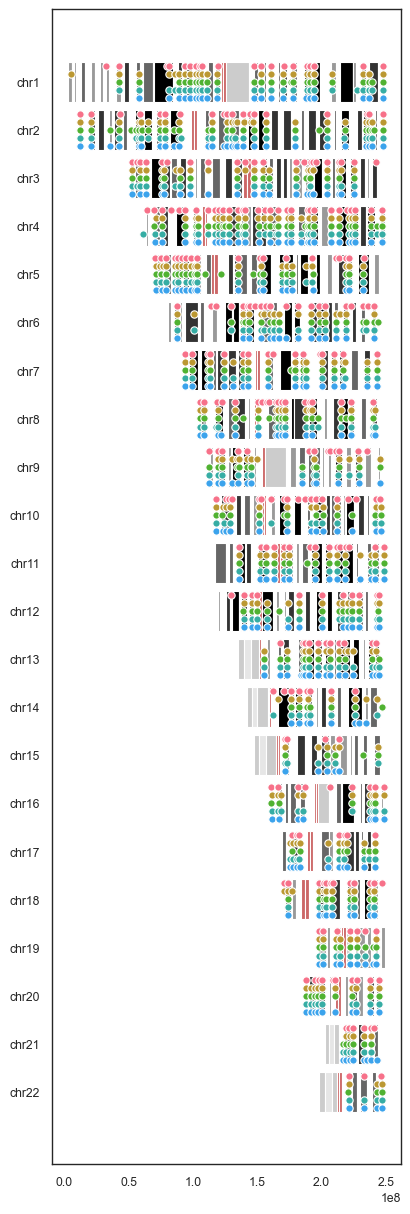

In [85]:
# From https://www.biostars.org/p/147364/#147637
from matplotlib.collections import BrokenBarHCollection

def chromosome_collections(df, y_positions, height,  **kwargs):
    """
    Yields BrokenBarHCollection of features that can be added to an Axes
    object.
    Parameters
    ----------
    df : pandas.DataFrame
        Must at least have columns ['chrom', 'start', 'end', 'color']. If no
        column 'width', it will be calculated from start/end.
    y_positions : dict
        Keys are chromosomes, values are y-value at which to anchor the
        BrokenBarHCollection
    height : float
        Height of each BrokenBarHCollection
    Additional kwargs are passed to BrokenBarHCollection
    """
    del_width = False
    df['start'] = [s + (249250621-chrlen[c]) for s,e,c in zip(df['start'],df['end'],df['chrom'])]  # remove if not right aligned
    df['end'] = [e + (249250621-chrlen[c]) for s,e,c in zip(df['start'],df['end'],df['chrom'])] # remove if not right aligned
    if 'width' not in df.columns:
        del_width = True
        df['width'] = df['end'] - df['start']
    for chrom, group in df.groupby('chrom'):
        yrange = (y_positions[chrom], height)
        xranges = group[['start', 'width']].values
        yield BrokenBarHCollection(
            xranges, yrange, facecolors=group['colors'], **kwargs)
    if del_width:
        del df['width']
        
chrlen={'chr1':248956422,
'chr2':242193529,
'chr3':198295559,
'chr4':190214555,
'chr5':181538259,
'chr6':170805979,
'chr7':159345973,
'chr8':145138636,
'chr9':138394717,
'chr10':133797422,
'chr11':135086622,
'chr12':133275309,
'chr13':114364328,
'chr14':107043718,
'chr15':101991189,
'chr16':90338345,
'chr17':83257441,
'chr18':80373285,
'chr19':58617616,
'chr20':64444167,
'chr21':46709983,
'chr22':50818468,
'chrX':156040895,
'chrY':57227415,
'chrM':16569}

# Height of each ideogram
chrom_height = 5

# Spacing between consecutive ideograms
chrom_spacing = 1

# Width, height (in inches)
figsize = (4.5, 15)

# Decide which chromosomes to use
chromosome_list = ['chr%s' % i for i in list(range(1, 23))] #can add 'X', 'Y','M' + ['X']

# Keep track of the y positions for ideograms and genes for each chromosome,
# and the center of each ideogram (which is where we'll put the ytick labels)
ybase = 0
chrom_ybase = {}
gene_ybase = {}
gene_ybase2 = {}
gene_ybase3 = {}
gene_ybase4 = {}

chrom_centers = {}
# Iterate in reverse so that items in the beginning of `chromosome_list` will
# appear at the top of the plot
for chrom in chromosome_list[::-1]:
    chrom_ybase[chrom] = ybase
    chrom_centers[chrom] = ybase + chrom_height / 2.
    ybase += chrom_height + chrom_spacing

# Read in ideogram.txt, downloaded from UCSC Table Browser
ideo = pd.read_table(
    '%s/ideogram.txt' % DATA_PATH,
    skiprows=1,
    names=['chrom', 'start', 'end', 'name', 'gieStain']
)

# Filter out chromosomes not in our list
ideo = ideo[ideo.chrom.apply(lambda x: x in chromosome_list)]

# Add a new column for width
ideo['width'] = ideo.end - ideo.start

# Colors for different chromosome stains
color_lookup = {
    'gneg': (1., 1., 1.),
    'gpos25': (.6, .6, .6),
    'gpos50': (.4, .4, .4),
    'gpos75': (.2, .2, .2),
    'gpos100': (0., 0., 0.),
    'acen': (.8, .4, .4),
    'gvar': (.8, .8, .8),
    'stalk': (.9, .9, .9),
}

# Add a new column for colors
ideo['colors'] = ideo['gieStain'].apply(lambda x: color_lookup[x])

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

# Now all we have to do is call our function for the ideogram data...
print("adding ideograms...")
for collection in chromosome_collections(ideo, chrom_ybase, chrom_height):
    _ = ax.add_collection(collection)

## Insert our custom data
sup_pal = {'AFR':'#f77189', 'SAS':'#36ada4','EAS':'#50b231','AMR':'#3ba3ec','EUR':'#bb9832'}
for i,modifier, color in zip(['AFR','EUR','EAS','SAS','AMR'],[4.5,3.5,2.5,1.5,0.5],[sup_pal['AFR'],sup_pal['EUR'],sup_pal['EAS'],sup_pal['SAS'],sup_pal['AMR']]):
    subset = mostDivergedWindows[[i in x for x in mostDivergedWindows['pops']]]
    subset = BedTool.from_dataframe(subset).merge().to_dataframe()
    ycoords = np.array([chrom_ybase[x] for x in subset['chrom'].values]) + modifier
    #xcoords = np.array([(s + e)/2 for s,e in zip(subset['start'],subset['end'])]) # if left aligned
    xcoords = np.array([(s + e)/2 + (249250621-chrlen[c]) for s,e,c in zip(subset['start'],subset['end'],subset['chrom'])])
    _ = ax.scatter(xcoords,ycoords,color=color,s=28,edgecolors= "white",linewidth=0.8)


# Axes tweaking
_ = ax.set_yticks([chrom_centers[i] for i in chromosome_list])
_ = ax.set_yticklabels(chromosome_list)

ax.axis('tight')
#plt.savefig("/home/mcarthe/ideogram.pdf")
plt.show()

In [ ]:
subset

chrom     start       end
0     chr1  57147392  58720256
1     chr1  80216064  81264640
2     chr1  88604672  89653248
3     chr1  92798976  93847552
4     chr1  96993280  98566144
..     ...       ...       ...
298  chr21  39845888  40894464
299  chr22  22020096  23592960
300  chr22  34078720  35127296
301  chr22  44564480  45613056
302  chr22  47710208  49283072

[303 rows x 3 columns]

In [ ]:
top_windows_by_pop

AFR_top  AMR_top  EUR_top  EAS_top  SAS_top
chr   windowStartPos                                             
chr1  4194304           False    False     True    False    False
      31457280           True    False    False    False    False
      41418752           True    False     True     True     True
      57147392          False     True     True     True     True
      57671680          False     True    False    False    False
...                       ...      ...      ...      ...      ...
chr22 34078720           True     True    False    False     True
      44564480          False     True     True     True     True
      47185920           True    False    False    False    False
      47710208           True     True     True     True     True
      48234496           True     True     True     True     True

[689 rows x 5 columns]

In [ ]:

zip(['AFR','EUR','EAS','SAS','AMR'],[4.5,3.5,2.5,1.5,0.5],[sup_pal['AFR'],sup_pal['EUR'],sup_pal['EAS'],sup_pal['SAS'],sup_pal['AMR']])

In [ ]:
mostDivergedWindows['pops'][0] ==['EIR']

False

In [ ]:
mostDivergedWindows

chr  windowStartPos  windowStopPos                       pops
0     chr1         4194304        5242880                      [EUR]
1     chr1        31457280       32505856                      [AFR]
2     chr1        41418752       42467328       [AFR, EUR, EAS, SAS]
3     chr1        57147392       58195968       [AMR, EUR, EAS, SAS]
4     chr1        57671680       58720256                      [AMR]
..     ...             ...            ...                        ...
684  chr22        34078720       35127296            [AFR, AMR, SAS]
685  chr22        44564480       45613056       [AMR, EUR, EAS, SAS]
686  chr22        47185920       48234496                      [AFR]
687  chr22        47710208       48758784  [AFR, AMR, EUR, EAS, SAS]
688  chr22        48234496       49283072  [AFR, AMR, EUR, EAS, SAS]

[689 rows x 4 columns]

In [100]:
def check_if_all_pops(row):
    if row['pops'] == ['AFR','AMR','EUR','EAS','SAS']:
        new_val = 'All'
    elif row['pops'] == ['AFR']:
        new_val = 'AFR_only'
    elif row['pops'] == ['AMR','EUR','EAS','SAS']:
        new_val = 'All_nonAFR'
    elif len(row['pops']) == 1:
        new_val = 'nonAFR_popSpecific'
    else:
        new_val = 'Other'
    return new_val

mostDivergedWindows = top_windows_by_pop.reset_index()
mostDivergedWindows['windowStopPos'] = mostDivergedWindows['windowStartPos'] + 2**20
mostDivergedWindows['pops'] = mostDivergedWindows.apply(lambda row: get_div_pop(row), axis=1)
mostDivergedWindows = mostDivergedWindows.drop(columns=['AFR_top','AMR_top','EUR_top','EAS_top','SAS_top'])
mostDivergedWindows['AllvsAFR'] = mostDivergedWindows.apply(lambda row: check_if_all_pops(row), axis=1)
mostDivergedWindows_subset = mostDivergedWindows[mostDivergedWindows['AllvsAFR']!= 'Other']

NameError: name 'check_if_all_pops' is not defined

adding ideograms...
All
AFR_only
All_nonAFR
nonAFR_popSpecific


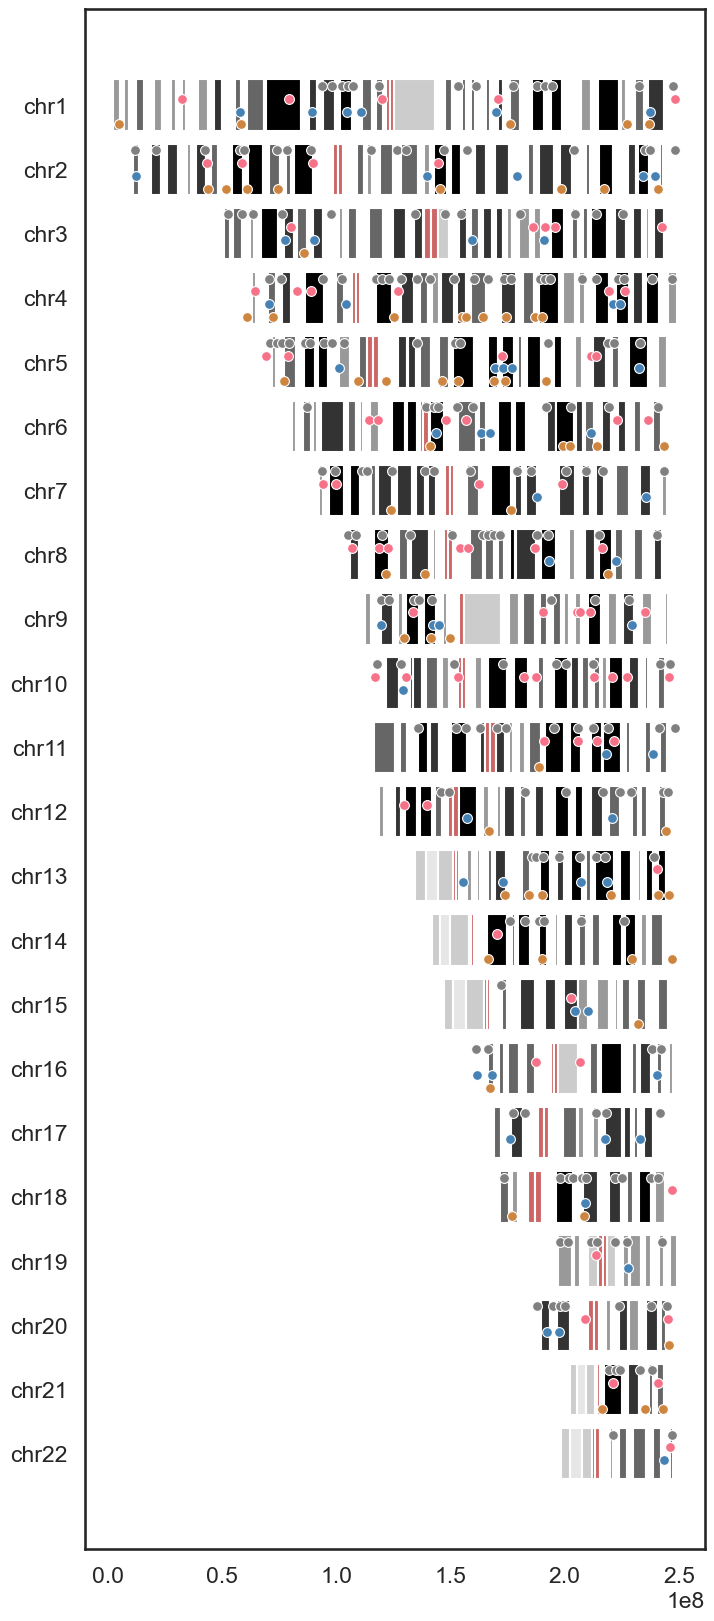

In [ ]:
# From https://www.biostars.org/p/147364/#147637
from matplotlib.collections import BrokenBarHCollection

def chromosome_collections(df, y_positions, height,  **kwargs):
    """
    Yields BrokenBarHCollection of features that can be added to an Axes
    object.
    Parameters
    ----------
    df : pandas.DataFrame
        Must at least have columns ['chrom', 'start', 'end', 'color']. If no
        column 'width', it will be calculated from start/end.
    y_positions : dict
        Keys are chromosomes, values are y-value at which to anchor the
        BrokenBarHCollection
    height : float
        Height of each BrokenBarHCollection
    Additional kwargs are passed to BrokenBarHCollection
    """
    del_width = False
    df['start'] = [s + (248956422-chrlen[c]) for s,e,c in zip(df['start'],df['end'],df['chrom'])]  # remove if not right aligned
    df['end'] = [e + (248956422-chrlen[c]) for s,e,c in zip(df['start'],df['end'],df['chrom'])] # remove if not right aligned
    if 'width' not in df.columns:
        del_width = True
        df['width'] = df['end'] - df['start']
    for chrom, group in df.groupby('chrom'):
        yrange = (y_positions[chrom], height)
        xranges = group[['start', 'width']].values
        yield BrokenBarHCollection(
            xranges, yrange, facecolors=group['colors'], **kwargs)
    if del_width:
        del df['width']
        
chrlen={'chr1':248956422,
'chr2':242193529,
'chr3':198295559,
'chr4':190214555,
'chr5':181538259,
'chr6':170805979,
'chr7':159345973,
'chr8':145138636,
'chr9':138394717,
'chr10':133797422,
'chr11':135086622,
'chr12':133275309,
'chr13':114364328,
'chr14':107043718,
'chr15':101991189,
'chr16':90338345,
'chr17':83257441,
'chr18':80373285,
'chr19':58617616,
'chr20':64444167,
'chr21':46709983,
'chr22':50818468,
'chrX':156040895,
'chrY':57227415,
'chrM':16569}

# Height of each ideogram
chrom_height = 4

# Spacing between consecutive ideograms
chrom_spacing = 1

# Width, height (in inches)
figsize = (8, 20)

# Decide which chromosomes to use
chromosome_list = ['chr%s' % i for i in list(range(1, 23))] #can add 'X', 'Y','M' + ['X']

# Keep track of the y positions for ideograms and genes for each chromosome,
# and the center of each ideogram (which is where we'll put the ytick labels)
ybase = 0
chrom_ybase = {}
gene_ybase = {}
gene_ybase2 = {}
gene_ybase3 = {}
gene_ybase4 = {}

chrom_centers = {}
# Iterate in reverse so that items in the beginning of `chromosome_list` will
# appear at the top of the plot
for chrom in chromosome_list[::-1]:
    chrom_ybase[chrom] = ybase
    chrom_centers[chrom] = ybase + chrom_height / 2.
    ybase += chrom_height + chrom_spacing

# Read in ideogram.txt, downloaded from UCSC Table Browser
ideo = pd.read_table(
    '%s/ideogram.txt' % DATA_PATH,
    skiprows=1,
    names=['chrom', 'start', 'end', 'name', 'gieStain']
)

# Filter out chromosomes not in our list
ideo = ideo[ideo.chrom.apply(lambda x: x in chromosome_list)]

# Add a new column for width
ideo['width'] = ideo.end - ideo.start

# Colors for different chromosome stains
color_lookup = {
    'gneg': (1., 1., 1.),
    'gpos25': (.6, .6, .6),
    'gpos50': (.4, .4, .4),
    'gpos75': (.2, .2, .2),
    'gpos100': (0., 0., 0.),
    'acen': (.8, .4, .4),
    'gvar': (.8, .8, .8),
    'stalk': (.9, .9, .9),
}

# Add a new column for colors
ideo['colors'] = ideo['gieStain'].apply(lambda x: color_lookup[x])

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

# Now all we have to do is call our function for the ideogram data...
print("adding ideograms...")
for collection in chromosome_collections(ideo, chrom_ybase, chrom_height):
    _ = ax.add_collection(collection)

## Insert our custom data
sup_pal = {'AFR':'#f77189', 'SAS':'#36ada4','EAS':'#50b231','AMR':'#3ba3ec','EUR':'#bb9832'}
for i,modifier, color in zip(['All','AFR_only','All_nonAFR', 'nonAFR_popSpecific'],[3.5, 2.5,1.5,0.5],['grey',sup_pal['AFR'],'steelblue', 'peru']):
    print(i)
    subset = mostDivergedWindows_subset[mostDivergedWindows_subset['AllvsAFR'] == i]
    subset = BedTool.from_dataframe(subset).merge().to_dataframe()
    ycoords = np.array([chrom_ybase[x] for x in subset['chrom'].values]) + modifier
    #xcoords = np.array([(s + e)/2 for s,e in zip(subset['start'],subset['end'])]) # if left aligned
    xcoords = np.array([(s + e)/2 + (249250621-chrlen[c]) for s,e,c in zip(subset['start'],subset['end'],subset['chrom'])])
    _ = ax.scatter(xcoords,ycoords,color=color,s=50,edgecolors= "white",linewidth=0.8)


# Axes tweaking
_ = ax.set_yticks([chrom_centers[i] for i in chromosome_list])
_ = ax.set_yticklabels(chromosome_list)

ax.axis('tight')
#plt.savefig("/home/mcarthe/ideogram.pdf")
plt.show()

In [ ]:
# can I have a single row for pop specific and color it by which pop the site it specific to?

In [ ]:
mostDivergedWindows[mostDivergedWindows['AllvsAFR'] == i]

chr  windowStartPos  windowStopPos   pops            AllvsAFR
0     chr1         4194304        5242880  [EUR]  nonAFR_popSpecific
4     chr1        57671680       58720256  [AMR]  nonAFR_popSpecific
27    chr1       175112192      176160768  [EAS]  nonAFR_popSpecific
36    chr1       226492416      227540992  [SAS]  nonAFR_popSpecific
38    chr1       235929600      236978176  [EAS]  nonAFR_popSpecific
..     ...             ...            ...    ...                 ...
614  chr18        38797312       39845888  [EAS]  nonAFR_popSpecific
668  chr20        60293120       61341696  [EUR]  nonAFR_popSpecific
669  chr21        13107200       14155776  [EAS]  nonAFR_popSpecific
678  chr21        31981568       33030144  [AMR]  nonAFR_popSpecific
681  chr21        39845888       40894464  [AMR]  nonAFR_popSpecific

[69 rows x 5 columns]

In [101]:
mostDivergedWindows['AllvsAFR']

KeyError: 'AllvsAFR'

In [ ]:
for i,modifier, color in zip(['ALL','AFR_only','All_nonAFR','Other_combination'],[3.5,2.5,1.5,0.5],['black',sup_pal['AFR'],'grey', 'white']):
    print(i)
    print([i in x for x in mostDivergedWindows['AllvsAFR']])
    subset = mostDivergedWindows[[i in x for x in mostDivergedWindows['AllvsAFR']]]

ALL
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F

In [ ]:
subset = mostDivergedWindows[[i in x for x in mostDivergedWindows['AllvsAFR']]]

In [102]:
subset

NameError: name 'subset' is not defined

In [103]:
mostDivergedWindows['pops']

0                          [EUR]
1                          [AFR]
2           [AFR, EUR, EAS, SAS]
3           [AMR, EUR, EAS, SAS]
4                          [AMR]
                 ...            
684              [AFR, AMR, SAS]
685         [AMR, EUR, EAS, SAS]
686                        [AFR]
687    [AFR, AMR, EUR, EAS, SAS]
688    [AFR, AMR, EUR, EAS, SAS]
Name: pops, Length: 689, dtype: object

In [104]:
subset = mostDivergedWindows[[i in x for x in mostDivergedWindows['pops']]]

NameError: name 'i' is not defined

In [ ]:
subset

Empty DataFrame
Columns: [chr, windowStartPos, windowStopPos, pops, AllvsAFR]
Index: []

In [ ]:
windows_to_keep

MultiIndex([( 'chr1',  1048576),
            ( 'chr1',  1572864),
            ( 'chr1',  3145728),
            ( 'chr1',  3670016),
            ( 'chr1',  4194304),
            ( 'chr1',  4718592),
            ( 'chr1',  5242880),
            ( 'chr1',  5767168),
            ( 'chr1',  6291456),
            ( 'chr1',  6815744),
            ...
            ('chr22', 44040192),
            ('chr22', 44564480),
            ('chr22', 45088768),
            ('chr22', 45613056),
            ('chr22', 46137344),
            ('chr22', 46661632),
            ('chr22', 47185920),
            ('chr22', 47710208),
            ('chr22', 48234496),
            ('chr22', 48758784)],
           names=['chr', 'windowStartPos'], length=4873)

In [ ]:
windows

AFR       AMR       EUR       EAS       SAS  \
chr   windowStartPos                                                     
chr1  1048576         0.000834  0.000565  0.000449  0.002823  0.000436   
      1572864         0.001091  0.000576  0.000514  0.003997  0.000899   
      3145728         0.002707  0.002587  0.002303  0.002527  0.002268   
      3670016         0.001677  0.001306  0.004735  0.001116  0.001610   
      4194304         0.002968  0.003223  0.009507  0.002685  0.003270   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.002922  0.001475  0.004090  0.001231  0.001646   
      47185920        0.011732  0.003434  0.002042  0.003512  0.020782   
      47710208        0.024968  0.026555  0.028428  0.028623  0.022950   
      48234496        0.058776  0.064189  0.073819  0.066296  0.056998   
      48758784        0.003559  0.002211  0.001532  0.001635  0.001988   

                       AVERAGE  
chr   windowStartPos            
chr1  1048576         0.001022  
      1572864         0.001415  
      3145728         0.002478  
      3670016         0.002089  
      4194304         0.004331  
...                        ...  
chr22 46661632        0.002273  
      47185920        0.008301  
      47710208        0.026305  
      48234496        0.064016  
      48758784        0.002185  

[4873 rows x 6 columns]

adding ideograms...
All
AFR_only
All_nonAFR
nonAFR_popSpecific


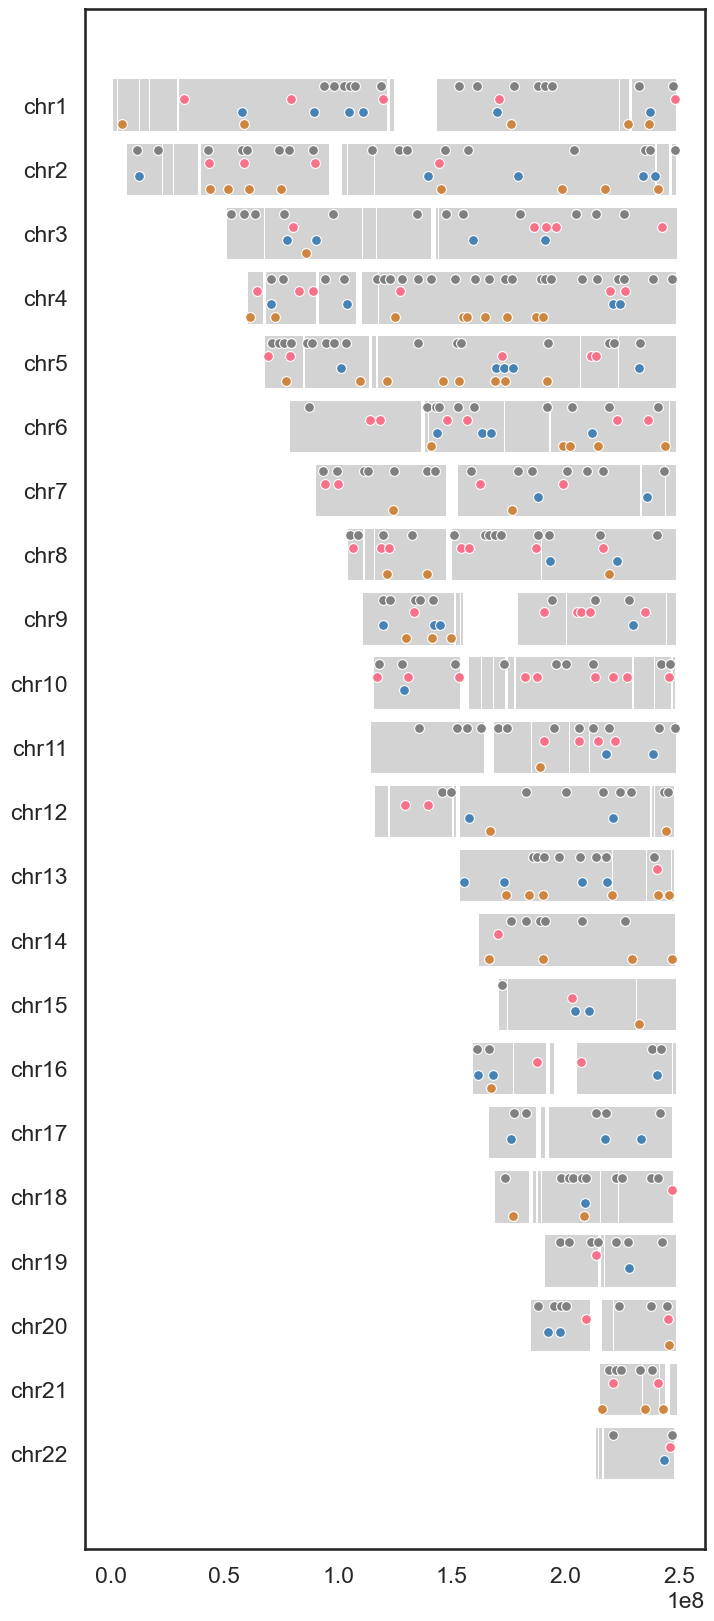

In [ ]:
# From https://www.biostars.org/p/147364/#147637
from matplotlib.collections import BrokenBarHCollection

def chromosome_collections(df, y_positions, height,  **kwargs):
    """
    Yields BrokenBarHCollection of features that can be added to an Axes
    object.
    Parameters
    ----------
    df : pandas.DataFrame
        Must at least have columns ['chrom', 'start', 'end', 'color']. If no
        column 'width', it will be calculated from start/end.
    y_positions : dict
        Keys are chromosomes, values are y-value at which to anchor the
        BrokenBarHCollection
    height : float
        Height of each BrokenBarHCollection
    Additional kwargs are passed to BrokenBarHCollection
    """
    del_width = False
    df['start'] = [s + (248956422-chrlen[c]) for s,e,c in zip(df['start'],df['end'],df['chrom'])]  # remove if not right aligned
    df['end'] = [e + (248956422-chrlen[c]) for s,e,c in zip(df['start'],df['end'],df['chrom'])] # remove if not right aligned
    if 'width' not in df.columns:
        del_width = True
        df['width'] = df['end'] - df['start']
    for chrom, group in df.groupby('chrom'):
        yrange = (y_positions[chrom], height)
        xranges = group[['start', 'width']].values
        yield BrokenBarHCollection(
            xranges, yrange, facecolors=group['colors'], **kwargs)
    if del_width:
        del df['width']
        
chrlen={'chr1':248956422,
'chr2':242193529,
'chr3':198295559,
'chr4':190214555,
'chr5':181538259,
'chr6':170805979,
'chr7':159345973,
'chr8':145138636,
'chr9':138394717,
'chr10':133797422,
'chr11':135086622,
'chr12':133275309,
'chr13':114364328,
'chr14':107043718,
'chr15':101991189,
'chr16':90338345,
'chr17':83257441,
'chr18':80373285,
'chr19':58617616,
'chr20':64444167,
'chr21':46709983,
'chr22':50818468,
'chrX':156040895,
'chrY':57227415,
'chrM':16569}

# Height of each ideogram
chrom_height = 4

# Spacing between consecutive ideograms
chrom_spacing = 1

# Width, height (in inches)
figsize = (8, 20)

# Decide which chromosomes to use
chromosome_list = ['chr%s' % i for i in list(range(1, 23))] #can add 'X', 'Y','M' + ['X']

# Keep track of the y positions for ideograms and genes for each chromosome,
# and the center of each ideogram (which is where we'll put the ytick labels)
ybase = 0
chrom_ybase = {}
gene_ybase = {}
gene_ybase2 = {}
gene_ybase3 = {}
gene_ybase4 = {}

chrom_centers = {}
# Iterate in reverse so that items in the beginning of `chromosome_list` will
# appear at the top of the plot
for chrom in chromosome_list[::-1]:
    chrom_ybase[chrom] = ybase
    chrom_centers[chrom] = ybase + chrom_height / 2.
    ybase += chrom_height + chrom_spacing

# Read in ideogram.txt, downloaded from UCSC Table Browser
ideo = all_windows

# Filter out chromosomes not in our list
ideo = ideo[ideo.chr.apply(lambda x: x in chromosome_list)]
ideo = ideo.rename(columns = {"chr":"chrom"})
# Add a new column for width
ideo['width'] = ideo.end - ideo.start
ideo['colors'] = 'lightgray'

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

# Now all we have to do is call our function for the ideogram data...
print("adding ideograms...")
for collection in chromosome_collections(ideo, chrom_ybase, chrom_height, linewidths=0):
    _ = ax.add_collection(collection)

## Insert our custom data
sup_pal = {'AFR':'#f77189', 'SAS':'#36ada4','EAS':'#50b231','AMR':'#3ba3ec','EUR':'#bb9832'}
for i,modifier, color in zip(['All','AFR_only','All_nonAFR', 'nonAFR_popSpecific'],[3.5, 2.5,1.5,0.5],['grey',sup_pal['AFR'],'steelblue', 'peru']):
    print(i)
    subset = mostDivergedWindows_subset[mostDivergedWindows_subset['AllvsAFR'] == i]
    subset = BedTool.from_dataframe(subset).merge().to_dataframe()
    ycoords = np.array([chrom_ybase[x] for x in subset['chrom'].values]) + modifier
    #xcoords = np.array([(s + e)/2 for s,e in zip(subset['start'],subset['end'])]) # if left aligned
    xcoords = np.array([(s + e)/2 + (249250621-chrlen[c]) for s,e,c in zip(subset['start'],subset['end'],subset['chrom'])])
    _ = ax.scatter(xcoords,ycoords,color=color,s=50,edgecolors= "white",linewidth=0.8)


# Axes tweaking
_ = ax.set_yticks([chrom_centers[i] for i in chromosome_list])
_ = ax.set_yticklabels(chromosome_list)

ax.axis('tight')
#plt.savefig("/home/mcarthe/ideogram.pdf")
plt.show()

In [ ]:
chrom_ybase

{'chr22': 0,
 'chr21': 5,
 'chr20': 10,
 'chr19': 15,
 'chr18': 20,
 'chr17': 25,
 'chr16': 30,
 'chr15': 35,
 'chr14': 40,
 'chr13': 45,
 'chr12': 50,
 'chr11': 55,
 'chr10': 60,
 'chr9': 65,
 'chr8': 70,
 'chr7': 75,
 'chr6': 80,
 'chr5': 85,
 'chr4': 90,
 'chr3': 95,
 'chr2': 100,
 'chr1': 105}

In [ ]:
all_windows

chr     start       end
0      chr1   1048576   2097152
1      chr1   1572864   2621440
2      chr1   3145728   4194304
3      chr1   3670016   4718592
4      chr1   4194304   5242880
...     ...       ...       ...
4868  chr22  46661632  47710208
4869  chr22  47185920  48234496
4870  chr22  47710208  48758784
4871  chr22  48234496  49283072
4872  chr22  48758784  49807360

[4873 rows x 3 columns]

## Annotate Quantiles

In [97]:
# read in annotations
phastCons = pybedtools.BedTool('%s/annotations/phastConsElements100way_hg38.bed' % DATA_PATH)
ctcf = pybedtools.BedTool('%s/annotations/ctcf_full_merged_hg38.bed' % DATA_PATH)
rmsk = pybedtools.BedTool('%s/annotations/rmsk_hg38.bed' % DATA_PATH)

In [98]:
rmsk.to_dataframe()

chrom     start       end       name  score strand
0                           chr1  67108753  67109046       L1P5   1892      +
1                           chr1   8388315   8388618       AluY   2582      -
2                           chr1  25165803  25166380      L1MB5   4085      +
3                           chr1  33554185  33554483      AluSc   2285      -
4                           chr1  41942894  41943205       AluY   2451      -
...                          ...       ...       ...        ...    ...    ...
5683685  chr22_KI270739v1_random     42471     42520   Tigger5b    270      -
5683686  chr22_KI270739v1_random     42530     48656  ALR/Alpha   1296      -
5683687  chr22_KI270739v1_random     48656     49096      L1PA3   3289      -
5683688  chr22_KI270739v1_random     49091     50070      L1PA3   6957      +
5683689  chr22_KI270739v1_random     50070     73985  ALR/Alpha   1338      -

[5683690 rows x 6 columns]

In [69]:
def PercentileToQuantile(x, bins):
    if bins==4:
        if x < 0.25:
            return 1
        elif x < 0.5:
            return 2
        elif x < 0.75:
            return 3
        else:
            return 4
    if bins ==10:
        if x < 0.1:
            return 1
        if x < 0.2:
            return 2
        if x < 0.3:
            return 3
        if x < 0.4:
            return 4
        if x < 0.5:
            return 5
        if x < 0.6:
            return 6
        if x < 0.7:
            return 7
        if x < 0.8:
            return 8
        if x < 0.9:
            return 9
        else:
            return 10
        

In [70]:
def QuantAnnotate(windows_by_pop, annot_data, annot_type, quant_bins):
    regions = windows_by_pop[['ALL_mean','ALL_std']]
    regions['divergence_percentile'] = regions['ALL_mean'].rank(pct=True)
    regions = regions.reset_index()
    regions['divergence_percentile_group'] = regions['divergence_percentile'].apply(PercentileToQuantile, bins=quant_bins)
    regions['stop'] = regions['windowStartPos'] + 2**20
    regions = regions[['chr','windowStartPos','stop','ALL_mean','ALL_std','divergence_percentile','divergence_percentile_group']]
    regions.columns = ['chr','start','stop'] + list(regions.columns)[3:]
    region_list = regions[['chr','start','stop', 'divergence_percentile_group']]

    if annot_type == 'genes':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','gene_name','numBases']
        annotation['annot_count'] = 1
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group'], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','annot_count':'sum', 'divergence_percentile_group':'mean'})
        annotation_grouped['propBasesCovered'] = annotation_grouped['numBases']/(2**20)
        annotation_grouped= annotation_grouped.reset_index()

    if annot_type=='ctcf':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','numBases']
        annotation['annot_count'] = 1
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group'], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','annot_count':'sum', 'divergence_percentile_group':'mean'})
        annotation_grouped['propBasesCovered'] = annotation_grouped['numBases']/(2**20)
        annotation_grouped= annotation_grouped.reset_index()

    if annot_type=='phastCons':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','lod','phastCons_score','numBases']
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group'], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','phastCons_score':'mean', 'divergence_percentile_group':'mean'})
        annotation_grouped= annotation_grouped.reset_index()

    if annot_type=='rmsk':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','repeat_type','repeat_score','strand','numBases']
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group'], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','repeat_score':'mean', 'divergence_percentile_group':'mean'})
        annotation_grouped= annotation_grouped.reset_index()

    if annot_type=='3dQTL':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','phenotype','3dQTL','numBases']
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group'], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','divergence_percentile_group':'mean'})
        annotation_grouped= annotation_grouped.reset_index()
    return annotation_grouped

#### Rebinning?

In [101]:
windows_by_pop.ALL_mean.min()

2.9357795668096296e-11

In [382]:
windows_by_pop.ALL_mean.max()

0.20413700814713476

In [383]:
np.linspace(windows_by_pop.ALL_mean.min(),windows_by_pop.ALL_mean.max(),11)

array([2.93577957e-11, 2.04137008e-02, 4.08274017e-02, 6.12411025e-02,
       8.16548033e-02, 1.02068504e-01, 1.22482205e-01, 1.42895906e-01,
       1.63309607e-01, 1.83723307e-01, 2.04137008e-01])

In [384]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9


In [385]:
def ScoreToBin(x, nbins):
    mini  = windows_by_pop.ALL_mean.min()
    maxi = windows_by_pop.ALL_mean.max()
    top_bin_low = np.linspace(mini,maxi,nbins+1)[1]
    bins = np.linspace(mini,top_bin_low,nbins)
    bins = np.append(bins, maxi)
    for i in range(1,nbins+1):
        if x <= bins[i]:
            return float(i)


In [386]:
regions = windows_by_pop[['ALL_mean','ALL_std']]
regions = regions.reset_index()
regions['bin'] = regions['ALL_mean'].apply(ScoreToBin, nbins=10)
regions['stop'] = regions['windowStartPos'] + 2**20
regions = regions[['chr','windowStartPos','stop','ALL_mean','ALL_std','bin']]
regions.columns = ['chr','start','stop'] + list(regions.columns)[3:]
region_list = regions[['chr','start','stop', 'bin']]

<Axes: ylabel='Frequency'>

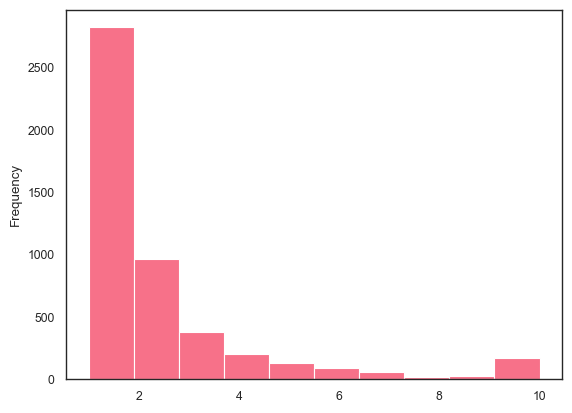

In [389]:
region_list.bin.plot.hist()

<Axes: ylabel='Frequency'>

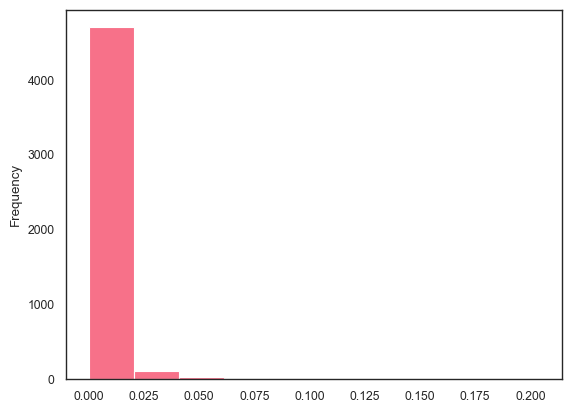

In [53]:
regions.ALL_mean.plot.hist()

In [74]:
region_list.bin.value_counts()

1.0     2821
2.0      963
3.0      381
4.0      203
10.0     173
5.0      135
6.0       89
7.0       60
9.0       27
8.0       21
Name: bin, dtype: int64

<AxesSubplot: ylabel='Frequency'>

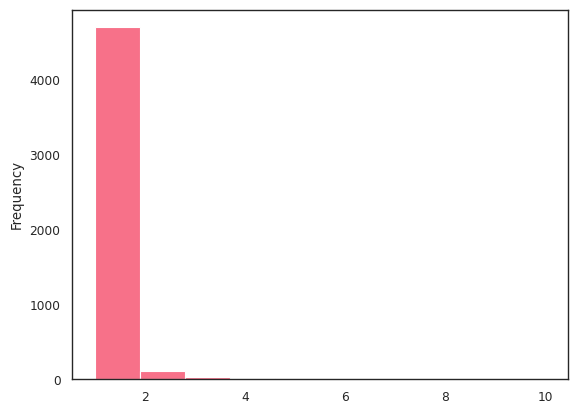

In [66]:
region_list.bin.plot.hist()

In [51]:
def BinAnnotate(windows_by_pop, annot_data, annot_type, nbins):
    regions = windows_by_pop[['ALL_mean','ALL_std']]
    regions = regions.reset_index()
    regions['bin'] = regions['ALL_mean'].apply(ScoreToBin, nbins=nbins)
    regions['stop'] = regions['windowStartPos'] + 2**20
    regions = regions[['chr','windowStartPos','stop','ALL_mean','ALL_std','bin']]
    regions.columns = ['chr','start','stop'] + list(regions.columns)[3:]
    region_list = regions[['chr','start','stop', 'bin']]

    if annot_type == 'genes':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','gene_name','numBases']
        annotation['annot_count'] = 1
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'bin'], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','annot_count':'sum', 'bin':'mean'})
        annotation_grouped['propBasesCovered'] = annotation_grouped['numBases']/(2**20)
        annotation_grouped= annotation_grouped.reset_index()

    if annot_type=='ctcf':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','numBases']
        annotation['annot_count'] = 1
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'bin'], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','annot_count':'sum', 'bin':'mean'})
        annotation_grouped['propBasesCovered'] = annotation_grouped['numBases']/(2**20)
        annotation_grouped= annotation_grouped.reset_index()

    if annot_type=='phastCons':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','lod','phastCons_score','numBases']
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'bin'], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','phastCons_score':'mean', 'bin':'mean'})
        annotation_grouped= annotation_grouped.reset_index()

    if annot_type=='rmsk':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','repeat_type','repeat_score','strand','numBases']
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'bin'], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','repeat_score':'mean', 'bin':'mean'})
        annotation_grouped= annotation_grouped.reset_index()
    return annotation_grouped

### Genes

r2 =  0.014855685889987785 p = 1.3656455615478162e-17


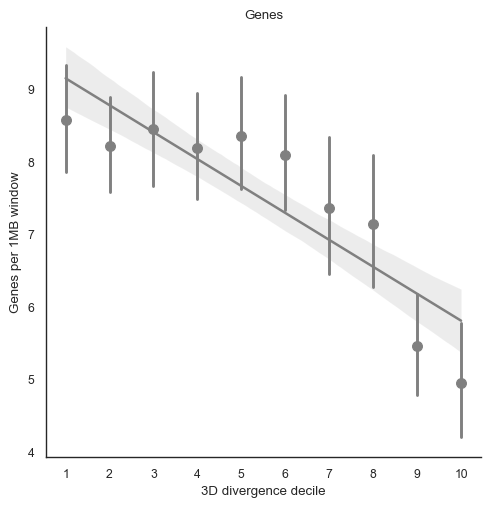

In [89]:
annotation = QuantAnnotate(windows_by_pop, annot_data = genes, annot_type = 'genes', quant_bins=10)
g = sns.lmplot(x='divergence_percentile_group', y='annot_count', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="3D divergence decile", ylabel="Genes per 1MB window", title='Genes')
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['annot_count'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))
plt.savefig("%s/decile_genes.svg" % FIG_PATH, bbox_inches = 'tight')

### CTCF

r2 =  0.041057824969152695 p = 2.5397539374860983e-46


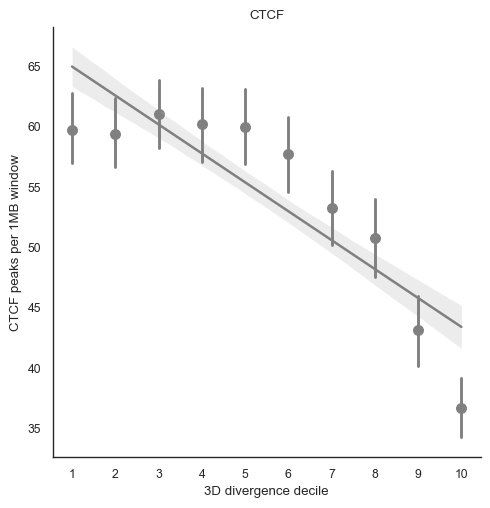

In [90]:

annotation = QuantAnnotate(windows_by_pop, annot_data=ctcf, annot_type='ctcf', quant_bins=10)
g = sns.lmplot(x='divergence_percentile_group', y='annot_count', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="3D divergence decile", ylabel="CTCF peaks per 1MB window", title='CTCF')
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['annot_count'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))
plt.savefig("%s/decile_ctcf.svg" % FIG_PATH, bbox_inches = 'tight')

In [91]:
annotation

chr      start       stop  numBases  annot_count  \
0     chr1    1048576    2097152   97642.0        130.0   
1     chr1    1572864    2621440  112422.0        153.0   
2     chr1    3145728    4194304   67757.0        106.0   
3     chr1    3670016    4718592   30844.0         45.0   
4     chr1    4194304    5242880   19567.0         31.0   
...    ...        ...        ...       ...          ...   
4868  chr9  134742016  135790592   32785.0         56.0   
4869  chr9  135266304  136314880   60135.0         94.0   
4870  chr9  135790592  136839168  117083.0        168.0   
4871  chr9  136314880  137363456  158414.0        212.0   
4872  chr9  136839168  137887744  122821.0        166.0   

      divergence_percentile_group  propBasesCovered  
0                             4.0          0.093119  
1                             5.0          0.107214  
2                             7.0          0.064618  
3                             8.0          0.029415  
4                             9.0          0.018661  
...                           ...               ...  
4868                          8.0          0.031266  
4869                          6.0          0.057349  
4870                          5.0          0.111659  
4871                          7.0          0.151075  
4872                          5.0          0.117131  

[4873 rows x 7 columns]

### 3D QTL

In [108]:
gorkin = pybedtools.BedTool('%s/Gorkin_3DQTLs/gorkin_qtls_hg38.bed' % DATA_PATH)


In [110]:
gorkin.to_dataframe()

chrom      start        end name
0     chr1    8799449    8799450  INS
1     chr1   11021211   11021212  INS
2     chr1   11872620   11872621  INS
3     chr1   14018068   14018069  INS
4     chr1   15076223   15076224  INS
...    ...        ...        ...  ...
2301  chr9  130904423  130904424    C
2302  chr9   72323586   72323587    C
2303  chr9   80447983   80447984    C
2304  chr9  108188641  108188642    C
2305  chr9  114939471  114939472    C

[2306 rows x 4 columns]

In [52]:
annot_data=gorkin
annot_type='3dQTL'
quant_bins=10
regions = windows_by_pop[['ALL_mean','ALL_std']]
regions['divergence_percentile'] = regions['ALL_mean'].rank(pct=True)
regions = regions.reset_index()
regions['divergence_percentile_group'] = regions['divergence_percentile'].apply(PercentileToQuantile, bins=quant_bins)
regions['stop'] = regions['windowStartPos'] + 2**20
regions = regions[['chr','windowStartPos','stop','ALL_mean','ALL_std','divergence_percentile','divergence_percentile_group']]
regions.columns = ['chr','start','stop'] + list(regions.columns)[3:]
region_list = regions[['chr','start','stop', 'divergence_percentile_group']]

annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','phenotype','numBases']
annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group'], how='outer')
annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','divergence_percentile_group':'mean'})
annotation_grouped= annotation_grouped.reset_index()


In [53]:
annotation_grouped

chr      start       stop  numBases  divergence_percentile_group
0     chr1    1048576    2097152       0.0                          4.0
1     chr1    1572864    2621440       0.0                          5.0
2     chr1    3145728    4194304       0.0                          7.0
3     chr1    3670016    4718592       0.0                          8.0
4     chr1    4194304    5242880       0.0                          9.0
...    ...        ...        ...       ...                          ...
4868  chr9  134742016  135790592       0.0                          8.0
4869  chr9  135266304  136314880       0.0                          6.0
4870  chr9  135790592  136839168       0.0                          5.0
4871  chr9  136314880  137363456       1.0                          7.0
4872  chr9  136839168  137887744       3.0                          5.0

[4873 rows x 5 columns]

r2 =  0.041057824969152695 p = 2.5397539374860983e-46


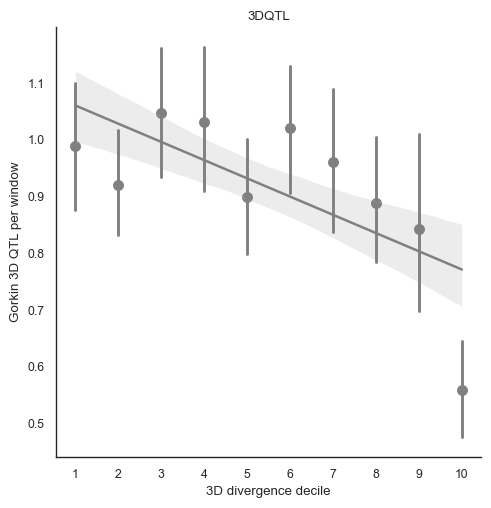

In [54]:

annotation = annotation_grouped
g = sns.lmplot(x='divergence_percentile_group', y='numBases', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="3D divergence decile", ylabel="Gorkin 3D QTL per window", title='3DQTL')
#slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['annot_count'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))
#plt.savefig("%s/decile_ctcf.svg" % FIG_PATH, bbox_inches = 'tight')

### RMSK

In [55]:
windows_by_pop

AFR_mean  AMR_mean  EUR_mean  EAS_mean  SAS_mean  \
chr   windowStartPos                                                     
chr1  1048576         0.001596  0.000881  0.000648  0.001091  0.000889   
      1572864         0.002087  0.001167  0.001148  0.001519  0.001216   
      3145728         0.002669  0.003333  0.002607  0.004419  0.002747   
      3670016         0.004773  0.004380  0.004600  0.004405  0.004836   
      4194304         0.009120  0.008632  0.009555  0.007170  0.008487   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.004763  0.003424  0.003324  0.003265  0.002981   
      47185920        0.011735  0.005060  0.004423  0.006339  0.006914   
      47710208        0.055222  0.059584  0.060998  0.053654  0.047924   
      48234496        0.204803  0.219469  0.214279  0.197077  0.187636   
      48758784        0.008367  0.005016  0.004276  0.004971  0.005018   

                       AFR_std   AMR_std   EUR_std   EAS_std   SAS_std  \
chr   windowStartPos                                                     
chr1  1048576         0.000834  0.000565  0.000449  0.002823  0.000436   
      1572864         0.001091  0.000576  0.000514  0.003997  0.000899   
      3145728         0.002707  0.002587  0.002303  0.002527  0.002268   
      3670016         0.001677  0.001306  0.004735  0.001116  0.001610   
      4194304         0.002968  0.003223  0.009507  0.002685  0.003270   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.002922  0.001475  0.004090  0.001231  0.001646   
      47185920        0.011732  0.003434  0.002042  0.003512  0.020782   
      47710208        0.024968  0.026555  0.028428  0.028623  0.022950   
      48234496        0.058776  0.064189  0.073819  0.066296  0.056998   
      48758784        0.003559  0.002211  0.001532  0.001635  0.001988   

                      ALL_mean   ALL_std  
chr   windowStartPos                      
chr1  1048576         0.001070  0.001436  
      1572864         0.001491  0.001996  
      3145728         0.003123  0.002591  
      3670016         0.004618  0.002516  
      4194304         0.008626  0.005136  
...                        ...       ...  
chr22 46661632        0.003650  0.002700  
      47185920        0.007318  0.011298  
      47710208        0.055384  0.026721  
      48234496        0.204137  0.064962  
      48758784        0.005755  0.002899  

[4873 rows x 12 columns]

r2 =  0.0013921023244588067 p = 0.009192917940752646


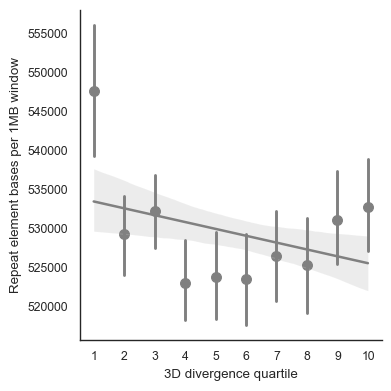

In [58]:
annotation = QuantAnnotate(windows_by_pop, annot_data=rmsk, annot_type='rmsk', quant_bins=10)
g = sns.lmplot(x='divergence_percentile_group', y='numBases', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=4)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="3D divergence quartile", ylabel="Repeat element bases per 1MB window")
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['numBases'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))


In [56]:
rmsk_map = pd.read_table('%s/annotations/repeatmasker_name_class_family.tab' % DATA_PATH, header = None, names=['name','class','family'])
rmsk_map

name          class         family
0              (A)n  Simple_repeat  Simple_repeat
1            (AAA)n  Simple_repeat  Simple_repeat
2        (AAAAAAC)n  Simple_repeat  Simple_repeat
3        (AAAAAAG)n  Simple_repeat  Simple_repeat
4        (AAAAAAT)n  Simple_repeat  Simple_repeat
...             ...            ...            ...
15669  tRNA-Tyr-TAC           tRNA           tRNA
15670  tRNA-Tyr-TAT           tRNA           tRNA
15671  tRNA-Val-GTA           tRNA           tRNA
15672  tRNA-Val-GTG           tRNA           tRNA
15673  tRNA-Val-GTY           tRNA           tRNA

[15674 rows x 3 columns]

In [57]:
annot_data=rmsk
annot_type='rmsk'
quant_bins=10
regions = windows_by_pop[['ALL_mean','ALL_std']]
regions['divergence_percentile'] = regions['ALL_mean'].rank(pct=True)
regions = regions.reset_index()
regions['divergence_percentile_group'] = regions['divergence_percentile'].apply(PercentileToQuantile, bins=quant_bins)
regions['stop'] = regions['windowStartPos'] + 2**20
regions = regions[['chr','windowStartPos','stop','ALL_mean','ALL_std','divergence_percentile','divergence_percentile_group']]
regions.columns = ['chr','start','stop'] + list(regions.columns)[3:]
region_list = regions[['chr','start','stop', 'divergence_percentile_group']]

annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','repeat_name','repeat_score','strand','numBases']
annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group'], how='outer')
annotation = annotation.merge(rmsk_map, left_on='repeat_name', right_on='name')
repeat_sums_counts= pd.DataFrame(annotation.groupby(['class','divergence_percentile_group'])['numBases'].agg(['sum','count'])).reset_index()
repeat_sums_counts = repeat_sums_counts.pivot(index='class', columns = 'divergence_percentile_group')


In [60]:
annotation

chr     start      stop  divergence_percentile_group  ALL_mean  \
0         chr1   1048576   2097152                            4  0.001070   
1         chr1   1048576   2097152                            4  0.001070   
2         chr1   1048576   2097152                            4  0.001070   
3         chr1   1048576   2097152                            4  0.001070   
4         chr1   1048576   2097152                            4  0.001070   
...        ...       ...       ...                          ...       ...   
9606754  chr22  48234496  49283072                           10  0.204137   
9606755  chr22  48234496  49283072                           10  0.204137   
9606756  chr22  48758784  49807360                            9  0.005755   
9606757  chr22  48758784  49807360                            9  0.005755   
9606758  chr22  48758784  49807360                            9  0.005755   

          ALL_std  divergence_percentile elem_chr  elem_start  elem_stop  \
0        0.001436               0.313975     chr1     1049061    1049205   
1        0.001436               0.313975     chr1     1058523    1058566   
2        0.001436               0.313975     chr1     1064783    1064831   
3        0.001436               0.313975     chr1     1116236    1116279   
4        0.001436               0.313975     chr1     1137820    1137864   
...           ...                    ...      ...         ...        ...   
9606754  0.064962               1.000000    chr22    48736150   48736216   
9606755  0.064962               1.000000    chr22    48919859   48919906   
9606756  0.002899               0.826596    chr22    48919859   48919906   
9606757  0.002899               0.826596    chr22    49591005   49591044   
9606758  0.002899               0.826596    chr22    49799286   49799336   

          repeat_name  repeat_score strand  numBases          name  \
0              G-rich            37      +       144        G-rich   
1              G-rich            12      +        43        G-rich   
2              G-rich            19      +        48        G-rich   
3              G-rich            15      +        43        G-rich   
4              G-rich            12      +        44        G-rich   
...               ...           ...    ...       ...           ...   
9606754    (TCCAGAG)n            11      +        66    (TCCAGAG)n   
9606755    (GTCCTGC)n            12      +        47    (GTCCTGC)n   
9606756    (GTCCTGC)n            12      +        47    (GTCCTGC)n   
9606757     (GACCTG)n            12      +        39     (GACCTG)n   
9606758  (GGGACAGAG)n            39      +        50  (GGGACAGAG)n   

                  class          family  
0        Low_complexity  Low_complexity  
1        Low_complexity  Low_complexity  
2        Low_complexity  Low_complexity  
3        Low_complexity  Low_complexity  
4        Low_complexity  Low_complexity  
...                 ...             ...  
9606754   Simple_repeat   Simple_repeat  
9606755   Simple_repeat   Simple_repeat  
9606756   Simple_repeat   Simple_repeat  
9606757   Simple_repeat   Simple_repeat  
9606758   Simple_repeat   Simple_repeat  

[9606759 rows x 17 columns]

In [58]:
repeat_sums_counts

sum                                   \
divergence_percentile_group         1          2          3          4    
class                                                                     
DNA                           19506815   20394767   20128962   19897497   
DNA?                             75970      86157      75304      79234   
LINE                         105501904  109695662  107922279  107144562   
LTR                           40216503   43675840   45092114   44316967   
LTR?                            212567     228063     205648     220377   
Low_complexity                  971494    1023887    1044777    1060603   
RC                               79381      87734      84599      88341   
RC?                              11377      15936      12056      11020   
RNA                              23920      23277      20440      20519   
Retroposon                      891727     836777     758261     770802   
SINE                          79725447   76909650   77712367   75958432   
SINE?                              217        424        570        354   
Satellite                     15055910     325533    1505764     885433   
Simple_repeat                  5592388    5760635    5947472    6109285   
Unknown                         140742     144314     148318     143952   
rRNA                             29693      27179      32088      25799   
scRNA                            31481      26259      26980      27165   
snRNA                           102829      90850      94330      84296   
srpRNA                           63174      61603      56984      55175   
tRNA                             17690      13384      18176      20790   

                                                                         \
divergence_percentile_group         5          6          7          8    
class                                                                     
DNA                           19632169   19674753   19527667   19196147   
DNA?                             82252      87122      86175      82609   
LINE                         107147489  109688892  111268018  111456747   
LTR                           46224678   46053432   48373771   48634218   
LTR?                            215237     207879     222343     200675   
Low_complexity                 1053393    1040237    1075313    1094434   
RC                               71367      79474      75808      81073   
RC?                               9883      11755      11965      11184   
RNA                              21339      21589      18970      21080   
Retroposon                      785293     817666     755046     664765   
SINE                          74701353   72029886   69615872   68741704   
SINE?                              342        820        554        723   
Satellite                       367539     406232     874742     419423   
Simple_repeat                  6101580    6152242    6326526    6511739   
Unknown                         149159     182943     176074     163406   
rRNA                             29739      26660      24931      24591   
scRNA                            21639      24598      21122      18304   
snRNA                            83815      85745      76570      69392   
srpRNA                           47476      48005      52587      41477   
tRNA                             16447      28400      24195      16974   

                                                    count                  \
divergence_percentile_group         9          10      1       2       3    
class                                                                       
DNA                           18567388   18576226   96242  100011   98439   
DNA?                             75598      85609     565     626     545   
LINE                         118302117  122099178  269475  276063  270924   
LTR                           52906629   55320821  114256  123040  127728   
LTR?                            193863     2

In [61]:
blues = ['#d6e5f2',
         '#b1cee6',
         '#8cb6da',
         '#679fce',
         '#4288c2',
         '#336ea0',
         '#27557b',
         '#1b3b56',
         '#0f2231',
         '#03080c'
         ]

#### x axis repeat type

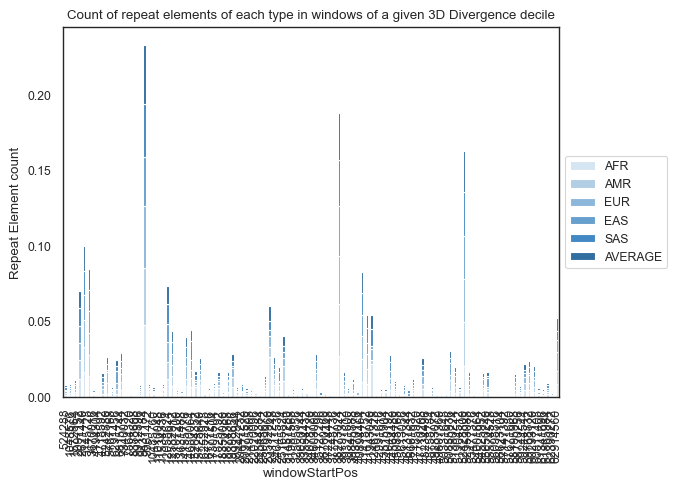

In [62]:
df.plot(kind='bar', stacked='True', color=blues)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Count of repeat elements of each type in windows of a given 3D Divergence decile')
plt.ylabel('Repeat Element count')
plt.show()

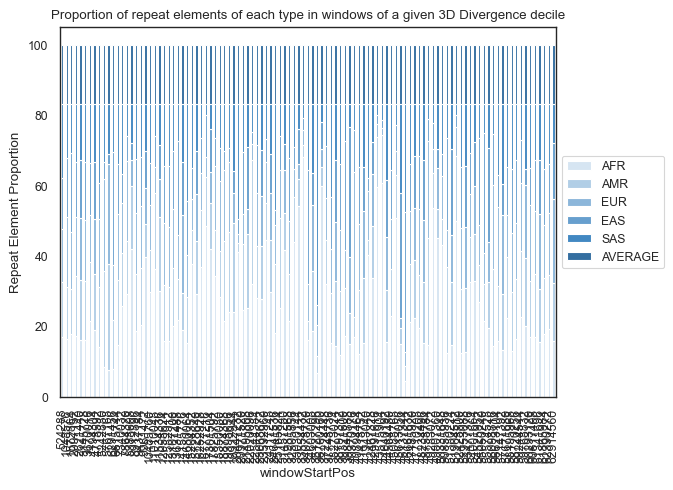

In [63]:
cols = list(df.columns)
df1 = df.copy()
df1[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)
df1.plot(kind='bar', stacked='True', color=blues)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Proportion of repeat elements of each type in windows of a given 3D Divergence decile')
plt.ylabel('Repeat Element Proportion')
plt.show()

#### x axis deciles

In [64]:
g, p, dof, expctd = stats.chi2_contingency(df, lambda_='log-likelihood')

In [65]:
repeat_counts_t = repeat_sums_counts['count'].T
repeat_counts_t['DNA'] = repeat_counts_t['DNA'] + repeat_counts_t['DNA?']
repeat_counts_t['LTR'] = repeat_counts_t['LTR'] + repeat_counts_t['LTR?']
repeat_counts_t['RC'] = repeat_counts_t['RC'] + repeat_counts_t['RC?']
repeat_counts_t['SINE'] = repeat_counts_t['SINE'] + repeat_counts_t['SINE?']
repeat_counts_t = repeat_counts_t.drop(columns=['DNA?','LTR?','RC?','SINE?'])

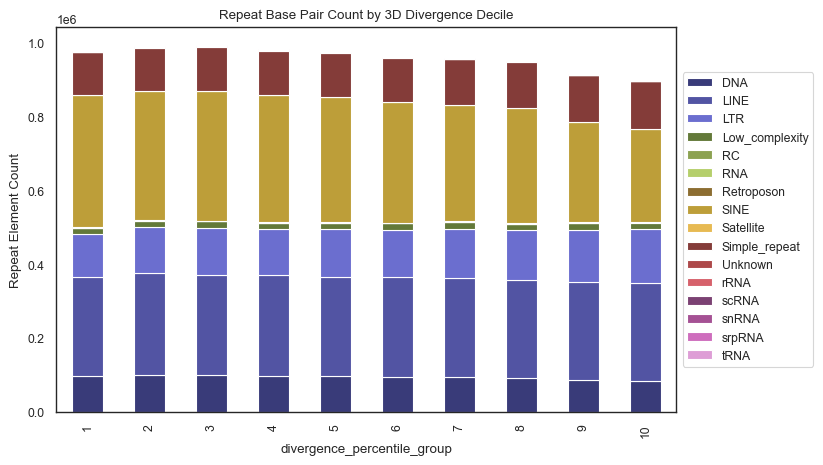

In [89]:

repeat_counts_t.plot(kind='bar', stacked='True', cmap ='tab20b', figsize=(8,5))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Repeat Base Pair Count by 3D Divergence Decile')
plt.ylabel('Repeat Element Count')
#plt.legend(bbox_to_anchor=(1, 1))
plt.savefig("%s/sup/repeats.svg" % FIG_PATH, bbox_inches = 'tight')
plt.show()


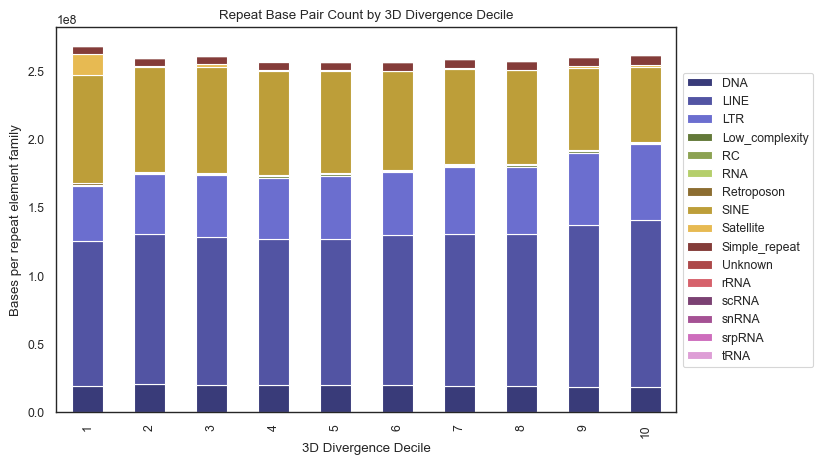

In [61]:
### USE THIS ONE ###
repeat_sums_t = repeat_sums_counts['sum'].T
repeat_sums_t['DNA'] = repeat_sums_t['DNA'] + repeat_sums_t['DNA?']
repeat_sums_t['LTR'] = repeat_sums_t['LTR'] + repeat_sums_t['LTR?']
repeat_sums_t['RC'] = repeat_sums_t['RC'] + repeat_sums_t['RC?']
repeat_sums_t['SINE'] = repeat_sums_t['SINE'] + repeat_sums_t['SINE?']
repeat_sums_t = repeat_sums_t.drop(columns=['DNA?','LTR?','RC?','SINE?'])

repeat_sums_t.plot(kind='bar', stacked='True', cmap ='tab20b', figsize=(8,5))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Repeat Base Pair Count by 3D Divergence Decile')
plt.ylabel('Bases per repeat element family')

plt.xlabel('3D Divergence Decile')
#plt.legend(bbox_to_anchor=(1, 1))
plt.savefig("%s/sup/repeats.svg" % FIG_PATH, bbox_inches = 'tight')
plt.show()

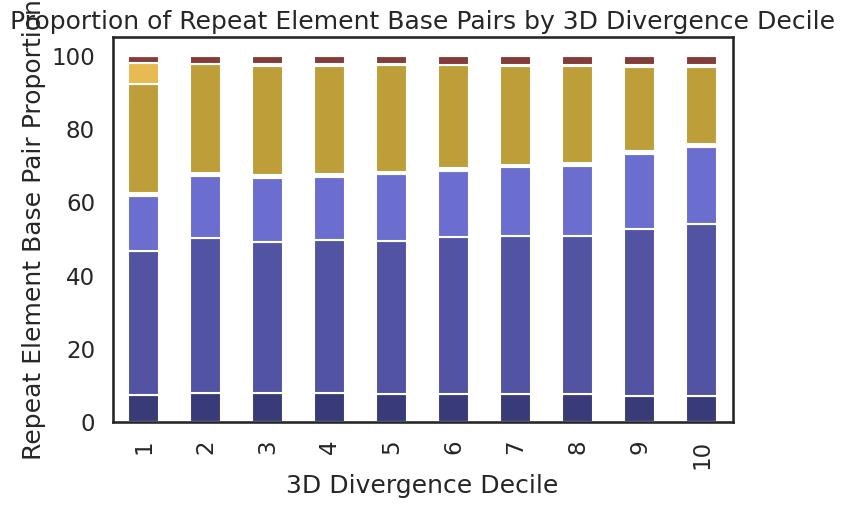

In [126]:
repeat_sums_t = repeat_sums_t.copy()
cols = list(repeat_sums_t.columns)
repeat_sums_t[cols] = repeat_sums_t[cols].div(repeat_sums_t[cols].sum(axis=1), axis=0).multiply(100)

repeat_sums_t.plot(kind='bar', stacked='True', cmap ='tab20b', figsize=(8,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Proportion of Repeat Element Base Pairs by 3D Divergence Decile')
plt.ylabel('Repeat Element Base Pair Proportion')

plt.xlabel('3D Divergence Decile')
plt.legend('',frameon=False)
plt.show()

#### More granular

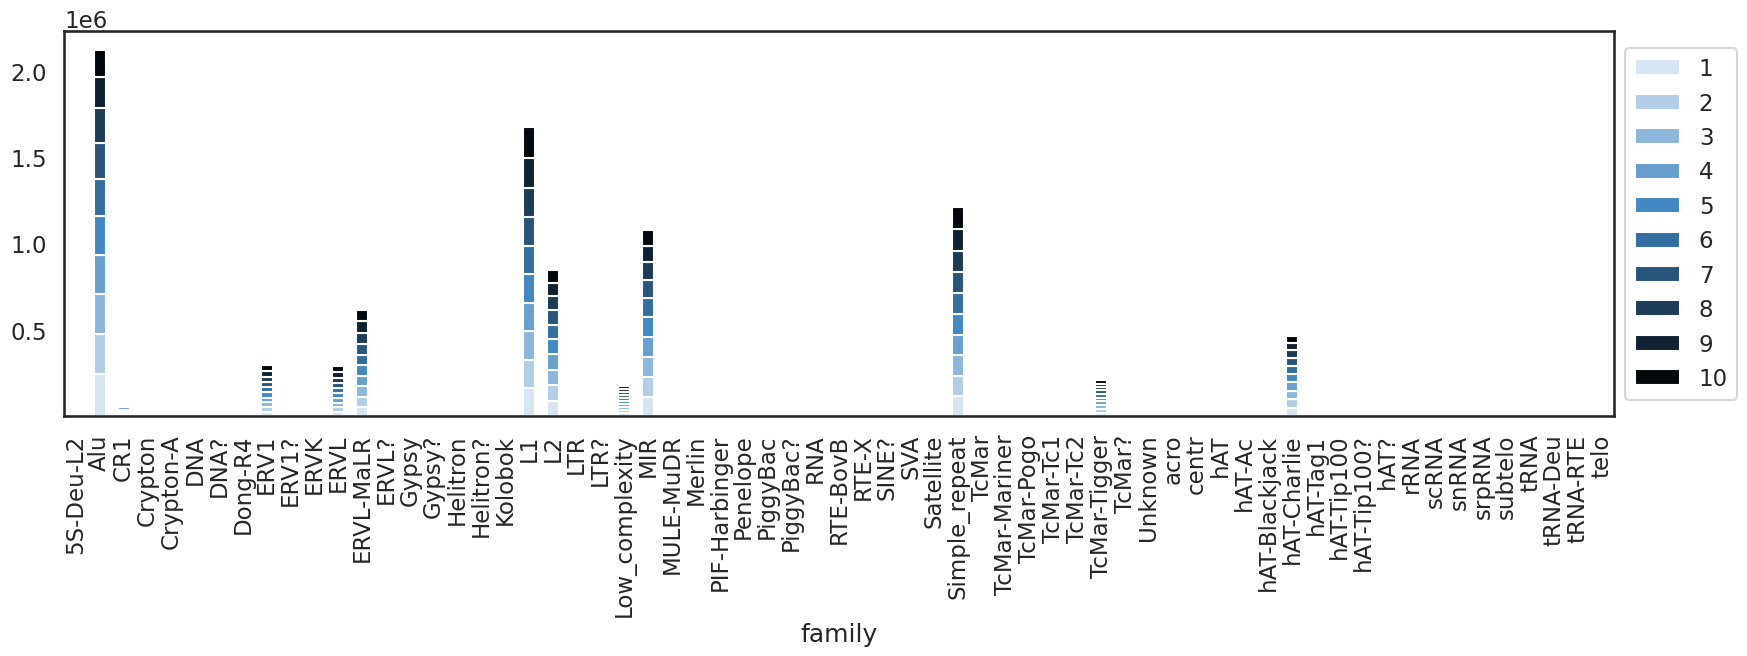

In [127]:
df2 = pd.DataFrame(annotation.groupby(['family','divergence_percentile_group']).size()).reset_index()
df2 = df2.pivot(index='family', columns = 'divergence_percentile_group')[0]

df2.plot(kind='bar', stacked='True', color=blues, figsize=(20,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

In [128]:
cols = list(df.columns)
df3 = df2.copy()
df3[cols] = df2[cols].div(df2[cols].sum(axis=1), axis=0).multiply(100)
df3.plot(kind='bar', stacked='True', color=blues, figsize=(20,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

KeyError: "None of [Index(['AFR', 'AMR', 'EUR', 'EAS', 'SAS', 'AVERAGE'], dtype='object', name='divergence_percentile_group')] are in the [columns]"

### Phast Cons

In [ ]:
annotation = QuantAnnotate(windows_by_pop, annot_data=phastCons, annot_type='phastCons',quant_bins=10) 

r2 =  0.02500736216259792 p = 1.1706352651960872e-28


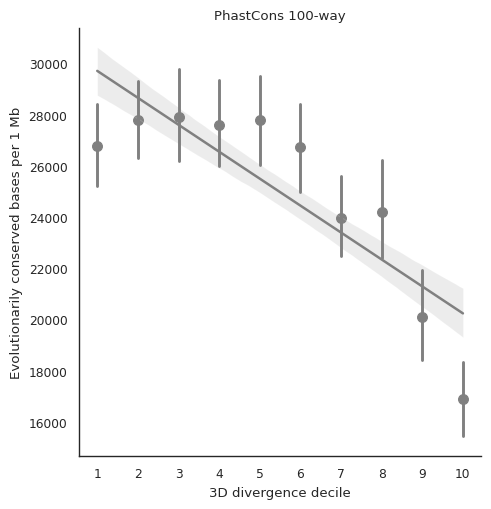

In [89]:
g = sns.lmplot(x='divergence_percentile_group', y='numBases', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="3D divergence decile", ylabel="Evolutionarily conserved bases per 1 Mb", title='PhastCons 100-way')
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['numBases'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))
plt.savefig("results/plots/decile_cons.svg" , bbox_inches = 'tight')

### Seq ID

In [ ]:
windows_by_pop['seq_id_all'] = seq_id.mean(axis=1)

In [ ]:
windows_by_pop['divergence_percentile'] = windows_by_pop['ALL_mean'].rank(pct=True)
windows_by_pop['divergence_percentile_group'] = windows_by_pop['divergence_percentile'].apply(PercentileToQuantile, bins=10)

r2 =  0.11358060308548364 p = 1.011950598290596e-129


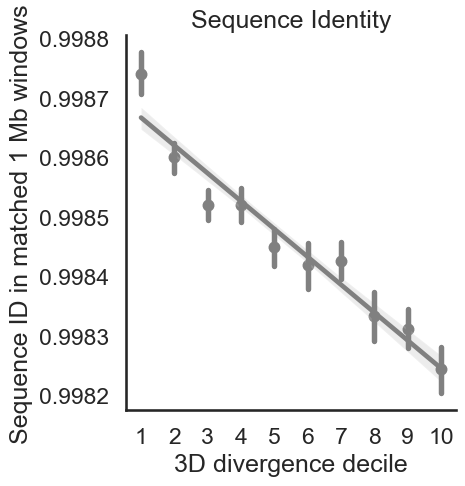

In [ ]:
g = sns.lmplot(x='divergence_percentile_group', y='seq_id_all', data=windows_by_pop, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="3D divergence decile", ylabel="Sequence ID in matched 1 Mb windows", title='Sequence Identity')
slope, intercept, r_value, p_value, std_err = stats.linregress(windows_by_pop['divergence_percentile_group'],windows_by_pop['seq_id_all'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))

### Other annotations

In [62]:
spin = pybedtools.BedTool('%s/annotations/HFF_SPIN_hg38.bed' % DATA_PATH)

In [63]:
spin_df = spin.to_dataframe()

regions = windows_by_pop[['ALL_mean','ALL_std']]
regions['divergence_percentile'] = regions['ALL_mean'].rank(pct=True)
regions = regions.reset_index()
regions['divergence_percentile_group'] = regions['divergence_percentile'].apply(PercentileToQuantile, bins=10)
regions['stop'] = regions['windowStartPos'] + 2**20
regions = regions[['chr','windowStartPos','stop','ALL_mean','ALL_std','divergence_percentile','divergence_percentile_group']]
regions.columns = ['chr','start','stop'] + list(regions.columns)[3:]
region_list = regions[['chr','start','stop', 'divergence_percentile_group']]
annotation = BedTool.from_dataframe(regions).intersect(spin, wo=True).to_dataframe(disable_auto_names=True, header=None)
annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','spin_state','score',
 'strand',
 'thickStart',
 'thickEnd',
 'itemRgb','numBases']
annotation['annot_count'] = 1
annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group'], how='outer')

spin_sums_counts= pd.DataFrame(annotation.groupby(['spin_state','divergence_percentile_group'])['numBases'].agg(['sum','count'])).reset_index()
spin_sums_counts = spin_sums_counts.pivot(index='spin_state', columns = 'divergence_percentile_group')


In [75]:
stats.chi2_contingency(spin_sums_counts['count'], lambda_='log-likelihood')

Chi2ContingencyResult(statistic=407.302047156886, pvalue=2.7142727231675623e-48, dof=72, expected_freq=array([[152.20486436, 155.17867166, 153.15107577, 148.55519177,
        147.87932647, 145.85173059, 149.50140318, 134.6323667 ,
        132.73994387, 125.30542563],
       [ 95.2202058 ,  97.08063611,  95.8121609 ,  92.93695042,
         92.51412535,  91.24565014,  93.52890552,  84.22675398,
         83.04284378,  78.39176801],
       [158.52478952, 161.62207671, 159.51028999, 154.72357343,
        154.01964453, 151.90785781, 155.7090739 , 140.22263798,
        138.25163704, 130.50841908],
       [108.17605239, 110.28961646, 108.84855005, 105.58213283,
        105.10177736, 103.66071094, 106.2546305 ,  95.6868101 ,
         94.34181478,  89.05790458],
       [197.60299345, 201.46379794, 198.83143124, 192.8647334 ,
        191.98727783, 189.35491113, 194.09317119, 174.78914874,
        172.33227315, 162.68026193],
       [182.32984097, 185.89223573, 183.46333022, 177.95781104,
        

In [76]:
stats.chi2_contingency(spin_sums_counts['sum'], lambda_='log-likelihood')

Chi2ContingencyResult(statistic=392604436.3839738, pvalue=0.0, dof=72, expected_freq=array([[63798301.67521185, 66015255.43154458, 65453171.6237867 ,
        65993424.84044976, 66037338.99871403, 66073655.58044226,
        66263582.55239701, 66006405.41608175, 65642074.24999669,
        65834605.63137537],
       [40322400.48648024, 41723580.37490332, 41368326.89936785,
        41709782.80014241, 41737537.83797356, 41760490.98428459,
        41880530.40892839, 41717986.90519591, 41487718.90741478,
        41609404.39530893],
       [73237060.32146597, 75782005.43315575, 75136763.08886811,
        75756945.07457435, 75807356.19482861, 75849045.70092613,
        76067071.7727256 , 75771846.08566093, 75353613.26618247,
        75574629.06161208],
       [35894787.51814321, 37142110.43946843, 36825865.67562548,
        37129827.91143604, 37154535.29922763, 37174968.06860065,
        37281826.5291438 , 37137131.16233676, 36932147.80934037,
        37040471.58667764],
       [74835213.090040

In [77]:
spin_sums_counts

sum                                      \
divergence_percentile_group           1           2           3           4    
spin_state                                                                     
Interior_Act1                100512168.0  90431616.0  81473272.0  85226248.0   
Interior_Act2                 40580160.0  45526904.0  41354520.0  43507720.0   
Interior_Act3                 98797920.0  94255512.0  88236328.0  80434728.0   
Interior_Repr1                31415064.0  36052064.0  35134856.0  46192104.0   
Interior_Repr2                72701104.0  82807352.0  74486768.0  72549096.0   
Lamina                        50516032.0  60354168.0  63405248.0  74738224.0   
Near_Lm1                      18931936.0  21958296.0  40451968.0  28413520.0   
Near_Lm2                      21233056.0  31985624.0  29774680.0  27207192.0   
Speckle                       57589488.0  46011728.0  50728504.0  50945984.0   

                                                                               \
divergence_percentile_group          5           6            7            8    
spin_state                                                                      
Interior_Act1                71537016.0  65573528.0   49936576.0   46274288.0   
Interior_Act2                48690688.0  52403280.0   45082320.0   36709336.0   
Interior_Act3                73734072.0  72100136.0   76151784.0   57981648.0   
Interior_Repr1               42834144.0  41799784.0   40845640.0   32085600.0   
Interior_Repr2               85823440.0  78917360.0   83945168.0   82756192.0   
Lamina                       78168240.0  88450480.0  104361224.0  117194896.0   
Near_Lm1                     28409904.0  28359840.0   37456176.0   35887448.0   
Near_Lm2                     32222464.0  32276344.0   37725248.0   47579272.0   
Speckle                      48133696.0  49953136.0   35795256.0   52846296.0   

                                                      count                 \
divergence_percentile_group           9            10    1    2    3    4    
spin_state                                                                   
Interior_Act1                 40090728.0   26062376.0   212  187  167  182   
Interior_Act2                 36345736.0   25117096.0    97   87  100   97   
Interior_Act3                 56892080.0   55752128.0   204  202  184  149   
Interior_Repr1                33767552.0   29586864.0    97  102  110  118   
Interior_Repr2                69505408.0   67305304.0   186  212  186  183   
Lamina                       157776984.0  185188200.0   133  148  140  143   
Near_Lm1                      41713120.0   37515360.0    46   52   87   62   
Near_Lm2                      40166392.0   63416840.0    59   77   79   75   
Speckle                       30245744.0   18045176.0    92   81   80   90   

                                                           
divergence_percentile_group   5    6    7    8    9    10  
spin_state                                                 
Interior_Act1                160  147  120  103   98   69  
Interior_Act2                105  102   97   90   77   52  
Interior_Act3                143  143  155  110  113  102  
Interior_Repr1               120  110  109   89   86   86  
Interior_Repr2               209  198  205  174  159  164  
Lamina                       154  154  189  183  241  246  
Near_Lm1                      57   67   78   75   74   61  
Near_Lm2                      71   77   87   91   85  115  
Speckle                       75   81   66   81   49   32

#### X axis states

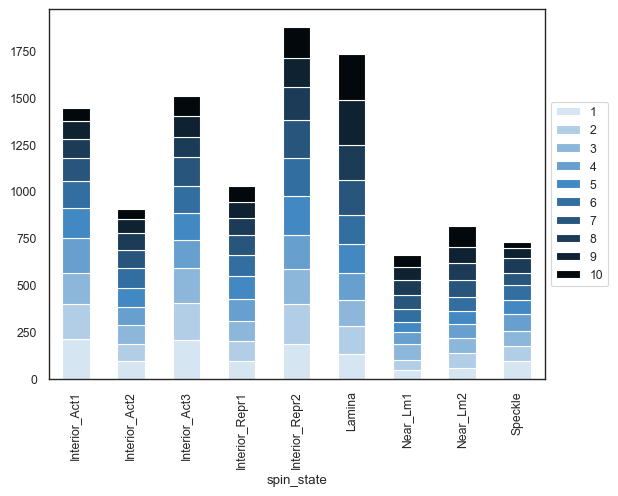

In [78]:
spin_sums_counts['count'].plot(kind='bar', stacked='True', color=blues)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [79]:
spin_counts_percent

NameError: name 'spin_counts_percent' is not defined

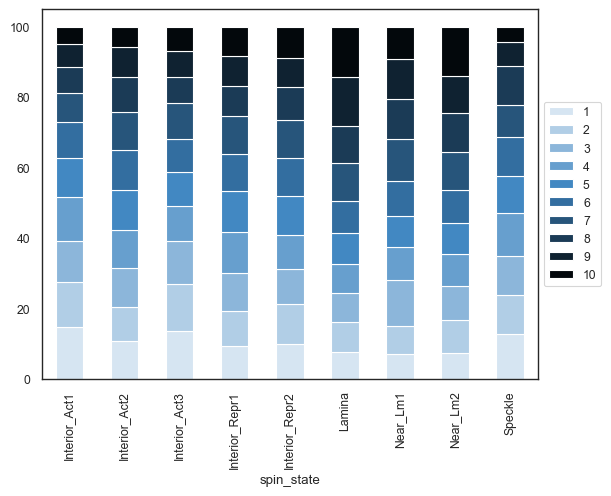

In [80]:
spin_counts_percent = spin_sums_counts['count'].copy()
cols = list(spin_counts_percent.columns)
spin_counts_percent[cols] = spin_counts_percent[cols].div(spin_counts_percent[cols].sum(axis=1), axis=0).multiply(100)
spin_counts_percent.plot(kind='bar', stacked='True', color=blues)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### x axis deciles

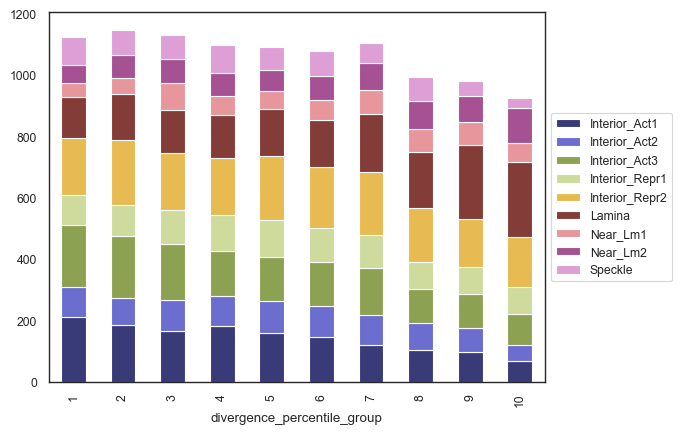

In [65]:
spin_counts_t_full = spin_sums_counts['count'].T
spin_counts_t_full.plot(kind='bar', stacked='True', cmap = 'tab20b')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [66]:
spin_df.name.unique()

array(['Interior_Act2', 'Interior_Repr1', 'Interior_Act1', 'Speckle',
       'Interior_Repr2', 'Lamina', 'Interior_Act3', 'Near_Lm1',
       'Near_Lm2'], dtype=object)

In [74]:
spin_counts_t

spin_state                   Lamina  Speckle  Interior Active  \
divergence_percentile_group                                     
1                               133       92              513   
2                               148       81              476   
3                               140       80              451   
4                               143       90              428   
5                               154       75              408   
6                               154       81              392   
7                               189       66              372   
8                               183       81              303   
9                               241       49              288   
10                              246       32              223   

spin_state                   Interior Repressive  Near Lamina  
divergence_percentile_group                                    
1                                            283          105  
2                                            314          129  
3                                            296          166  
4                                            301          137  
5                                            329          128  
6                                            308          144  
7                                            314          165  
8                                            263          166  
9                                            245          159  
10                                           250          176

In [73]:
spin_counts_t = spin_sums_counts['count'].T
spin_counts_t['Interior Active'] = spin_counts_t.Interior_Act1 + spin_counts_t.Interior_Act2 + spin_counts_t.Interior_Act3
spin_counts_t['Interior Repressive'] = spin_counts_t.Interior_Repr1 + spin_counts_t.Interior_Repr2
spin_counts_t['Lamina'] = spin_counts_t.Lamina 
spin_counts_t['Near Lamina'] = spin_counts_t.Near_Lm1 + spin_counts_t.Near_Lm2
spin_counts_t = spin_counts_t.drop(columns=['Interior_Act1','Interior_Act2','Interior_Act3','Interior_Repr1','Interior_Repr2','Near_Lm1','Near_Lm2'])

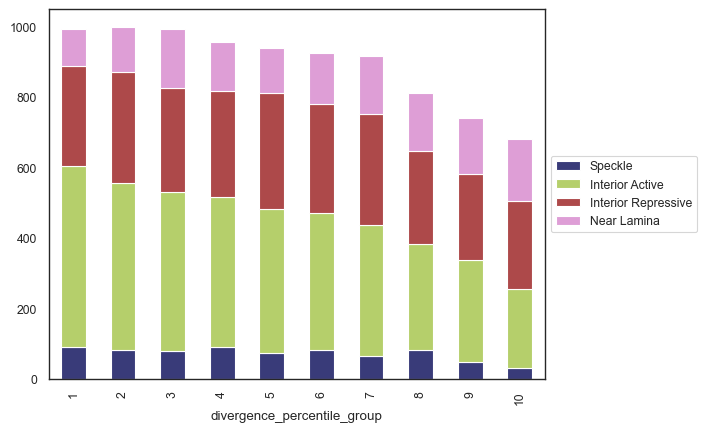

In [69]:
spin_counts_t.plot(kind='bar', stacked='True', cmap = 'tab20b')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


In [76]:
spin_sums_t = spin_sums_counts['sum'].T
spin_sums_t['Interior Active'] = spin_sums_t.Interior_Act1 + spin_sums_t.Interior_Act2 + spin_sums_t.Interior_Act3
spin_sums_t['Interior Repressive'] = spin_sums_t.Interior_Repr1 + spin_sums_t.Interior_Repr2
spin_sums_t['Lamina'] = spin_sums_t.Lamina 
spin_sums_t['Near Lamina'] = spin_sums_t.Near_Lm1 + spin_sums_t.Near_Lm2
spin_sums_t = spin_sums_t.drop(columns=['Interior_Act1','Interior_Act2','Interior_Act3','Interior_Repr1','Interior_Repr2','Near_Lm1','Near_Lm2'])

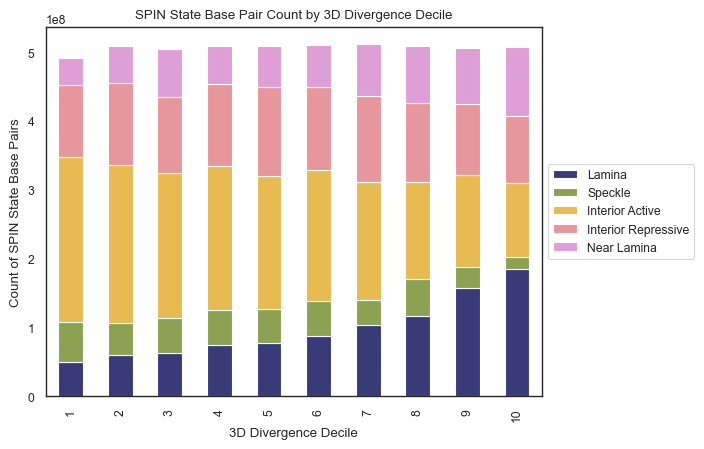

In [77]:
spin_sums_t.plot(kind='bar', stacked='True', cmap = 'tab20b')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Count of SPIN State Base Pairs')
plt.xlabel('3D Divergence Decile')
plt.title('SPIN State Base Pair Count by 3D Divergence Decile')
plt.savefig("%s/sup/spins.svg" % FIG_PATH, bbox_inches = 'tight')
plt.show()


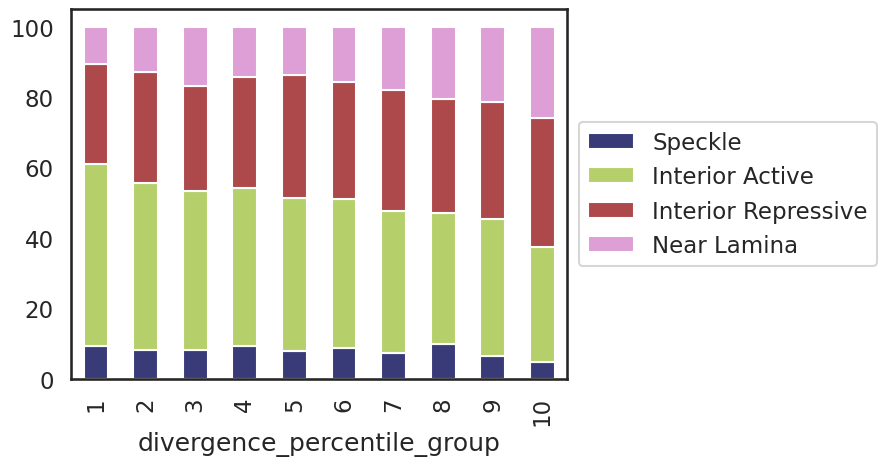

In [157]:
df1 = spin_counts_t.copy()
cols = list(df1.columns)
df1[cols] = df1[cols].div(df1[cols].sum(axis=1), axis=0).multiply(100)
df1.plot(kind='bar', stacked='True', cmap = 'tab20b')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

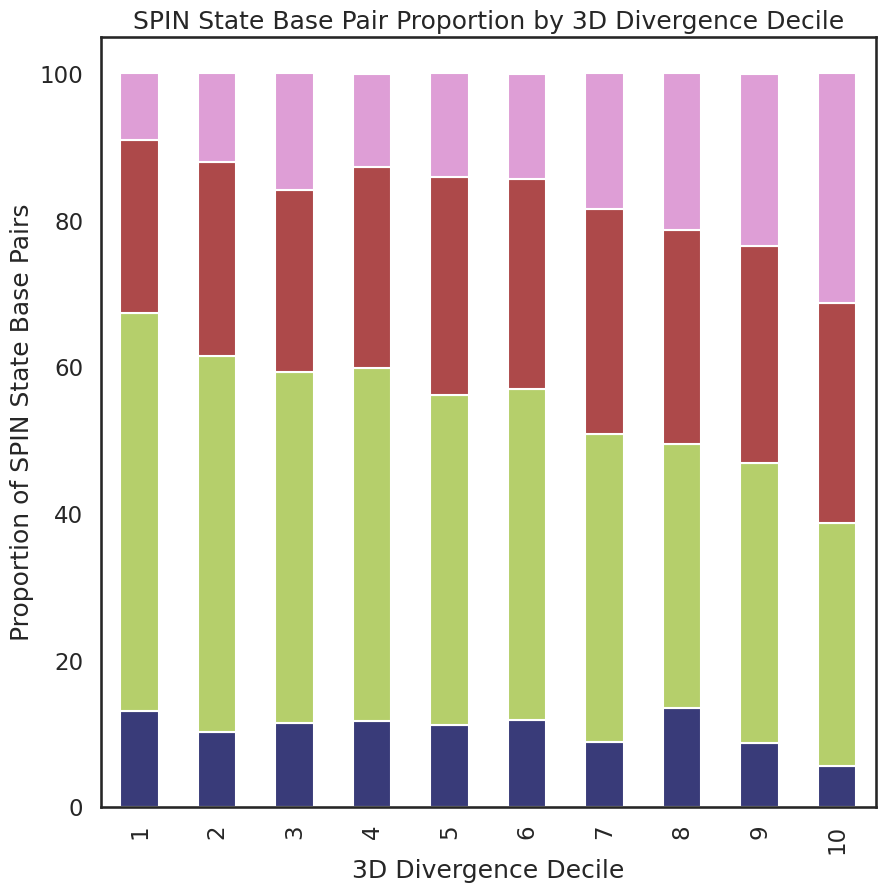

In [170]:
df1 = spin_sums_t.copy()
cols = list(df1.columns)
df1[cols] = df1[cols].div(df1[cols].sum(axis=1), axis=0).multiply(100)

df1.plot(kind='bar', stacked='True', cmap = 'tab20b', figsize=(10,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Proportion of SPIN State Base Pairs')
plt.xlabel('3D Divergence Decile')
plt.title('SPIN State Base Pair Proportion by 3D Divergence Decile')
plt.savefig("%s/sup/spins.svg" % FIG_PATH, bbox_inches = 'tight')
plt.show()

## Characterize subset individuals

In [61]:
inds = pd.read_table('%s/intermediates/subset_inds.csv'%DATA_PATH, sep=',', index_col=0)

In [62]:
inds

0
0    AFR_GWD_female_HG02635
1    SAS_PJL_female_HG02725
2    EAS_CDX_female_HG01799
3    EAS_KHV_female_HG01874
4    EAS_CDX_female_HG01801
..                      ...
125  EAS_CHS_female_HG00531
126  SAS_PJL_female_HG02649
127  EUR_FIN_female_HG00373
128  AFR_GWD_female_HG02679
129  AFR_ACB_female_HG02505

[130 rows x 1 columns]

In [63]:
anc.loc[inds["0"]][anc.super_pop=='EAS']

/scratch/egilbertson/ipykernel_40157/3378879499.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anc.loc[inds["0"]][anc.super_pop=='EAS']


ancestor  genome_avg_mse  genome_avg_spearman  \
1KG                                                                             
EAS_CDX_female_HG01799  hsmrca_ancestral        0.000664             0.995682   
EAS_KHV_female_HG01874  hsmrca_ancestral        0.000653             0.995739   
EAS_CDX_female_HG01801  hsmrca_ancestral        0.000634             0.995784   
EAS_JPT_female_NA18998  hsmrca_ancestral        0.000691             0.995528   
EAS_CHS_female_HG00608  hsmrca_ancestral        0.000653             0.995581   
EAS_CDX_female_HG00864  hsmrca_ancestral        0.000624             0.995760   
EAS_CDX_female_HG01807  hsmrca_ancestral        0.000660             0.995622   
EAS_CDX_female_HG02188  hsmrca_ancestral        0.000655             0.995611   
EAS_CHB_female_NA18591  hsmrca_ancestral        0.000660             0.995761   
EAS_CHS_female_HG00584  hsmrca_ancestral        0.000633             0.995682   
EAS_KHV_female_HG02127  hsmrca_ancestral        0.000668             0.995438   
EAS_JPT_female_NA18951  hsmrca_ancestral        0.000656             0.995783   
EAS_CHB_female_NA18596  hsmrca_ancestral        0.000645             0.995833   
EAS_KHV_female_HG02069  hsmrca_ancestral        0.000663             0.995524   
EAS_JPT_female_NA18981  hsmrca_ancestral        0.000657             0.995541   
EAS_CHS_female_HG00566  hsmrca_ancestral        0.000702             0.995580   
EAS_CHB_female_NA18531  hsmrca_ancestral        0.000656             0.995737   
EAS_KHV_female_HG01869  hsmrca_ancestral        0.000642             0.995840   
EAS_CHB_female_NA18631  hsmrca_ancestral        0.000655             0.995708   
EAS_JPT_female_NA18991  hsmrca_ancestral        0.000628             0.995709   
EAS_KHV_female_HG02075  hsmrca_ancestral        0.000663             0.995656   
EAS_JPT_female_NA19084  hsmrca_ancestral        0.000618             0.995831   
EAS_CHB_female_NA18541  hsmrca_ancestral        0.000653             0.995668   
EAS_CHS_female_HG00596  hsmrca_ancestral        0.000686             0.995342   
EAS_CHS_female_HG00531  hsmrca_ancestral        0.000613             0.995891   

                       super_pop sub_pop     sex       id  divergence  \
1KG                                                                     
EAS_CDX_female_HG01799       EAS     CDX  female  HG01799    0.004318   
EAS_KHV_female_HG01874       EAS     KHV  female  HG01874    0.004261   
EAS_CDX_female_HG01801       EAS     CDX  female  HG01801    0.004216   
EAS_JPT_female_NA18998       EAS     JPT  female  NA18998    0.004472   
EAS_CHS_female_HG00608       EAS     CHS  female  HG00608    0.004419   
EAS_CDX_female_HG00864       EAS     CDX  female  HG00864    0.004240   
EAS_CDX_female_HG01807       EAS     CDX  female  HG01807    0.004378   
EAS_CDX_female_HG02188       EAS     CDX  female  HG02188    0.004389   
EAS_CHB_female_NA18591       EAS     CHB  female  NA18591    0.004239   
EAS_CHS_female_HG00584       EAS     CHS  female  HG00584    0.004318   
EAS_KHV_female_HG02127       EAS     KHV  female  HG02127    0.004562   
EAS_JPT_female_NA18951       EAS     JPT  female  NA18951    0.004217   
EAS_CHB_female_NA18596       EAS     CHB  female  NA18596    0.004167   
EAS_KHV_female_HG02069       EAS     KHV  female  HG02069    0.004476   
EAS_JPT_female_NA18981       EAS     JPT  female  NA18981    0.004459   
EAS_CHS_female_HG00566       EAS     CHS  female  HG00566    0.004420   
EAS_CHB_female_NA18531       EAS     CHB  female  NA18531    0.004263   
EAS_KHV_female_HG01869       EAS     KHV  female  HG01869    0.004160   
EAS_CHB_female_NA18631       EAS     CHB  female  NA18631    0.004292   
EAS_JPT_female_NA18991       EAS     JPT  female  NA18991    0.004291   
EAS_KHV_female_HG02075       EAS     KHV  female  HG02075    0.004344   
EAS_JPT_female_NA19084       EAS     JPT  female  NA19084    0.004169   
EAS_CHB_female_NA18541       EAS     CHB  female  NA18541    0.004332   
EAS_CHS_female_HG00

/scratch/egilbertson/ipykernel_40157/319631601.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(anc.loc[inds["0"]][anc.super_pop=='EAS'].divergence)


(array([2., 4., 4., 4., 3., 3., 3., 0., 1., 1.]),
 array([0.00410907, 0.00416394, 0.0042188 , 0.00427367, 0.00432854,
        0.00438341, 0.00443828, 0.00449314, 0.00454801, 0.00460288,
        0.00465775]),
 <BarContainer object of 10 artists>)

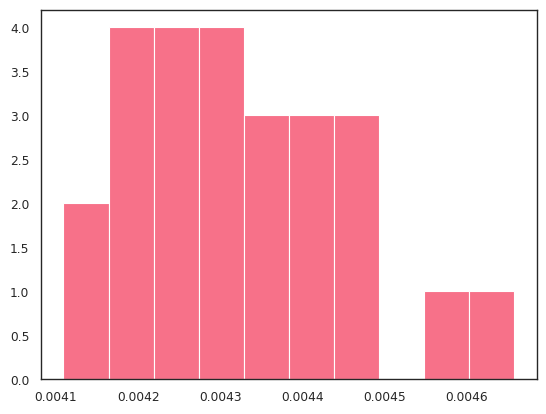

In [64]:
plt.hist(anc.loc[inds["0"]][anc.super_pop=='EAS'].divergence)

/scratch/egilbertson/ipykernel_40157/516970439.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(genome_wide_both.loc[inds["0"]][genome_wide_both.super_pop=='EAS'].seq_diff, color = (0.5061679352128585, 0.6675954483699535, 0.3024282922555064))


(array([1., 0., 0., 0., 0., 2., 5., 9., 5., 3.]),
 array([0.00147583, 0.00148052, 0.00148522, 0.00148991, 0.00149461,
        0.0014993 , 0.00150399, 0.00150869, 0.00151338, 0.00151808,
        0.00152277]),
 <BarContainer object of 10 artists>)

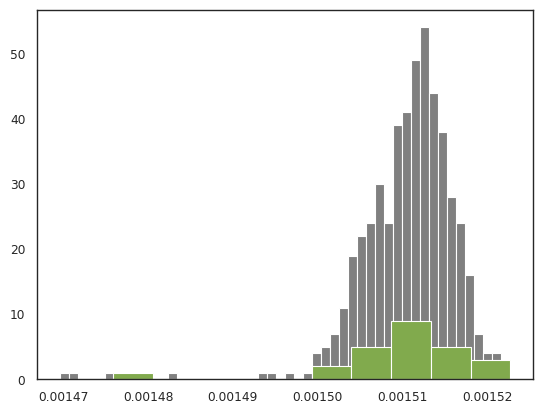

In [65]:

plt.hist(genome_wide_both[genome_wide_both.super_pop=='EAS'].seq_diff, color='grey', bins=50)
plt.hist(genome_wide_both.loc[inds["0"]][genome_wide_both.super_pop=='EAS'].seq_diff, color = (0.5061679352128585, 0.6675954483699535, 0.3024282922555064))

/scratch/egilbertson/ipykernel_40157/33395101.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(genome_wide_both.loc[inds["0"]][genome_wide_both.super_pop=='EAS'].divergence, color = (0.5061679352128585, 0.6675954483699535, 0.3024282922555064))


(array([2., 4., 4., 4., 3., 3., 3., 0., 1., 1.]),
 array([0.00410907, 0.00416394, 0.0042188 , 0.00427367, 0.00432854,
        0.00438341, 0.00443828, 0.00449314, 0.00454801, 0.00460288,
        0.00465775]),
 <BarContainer object of 10 artists>)

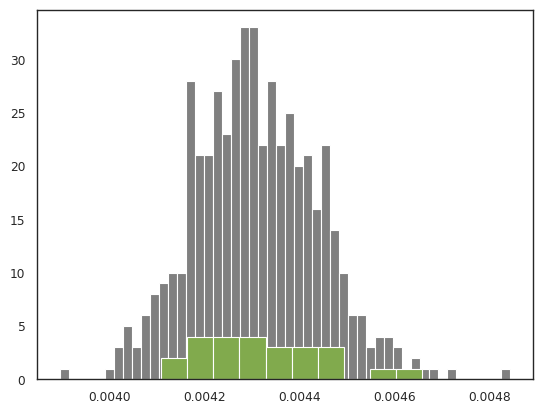

In [66]:

plt.hist(genome_wide_both[genome_wide_both.super_pop=='EAS'].divergence, color='grey', bins=50)
plt.hist(genome_wide_both.loc[inds["0"]][genome_wide_both.super_pop=='EAS'].divergence, color = (0.5061679352128585, 0.6675954483699535, 0.3024282922555064))

## Inversion tagging SNVs

In [61]:
!pwd

/Users/egilbertson/Library/CloudStorage/Box-Box/UCSF/CapraLab/3DGenome/bin/3Dbin/activeNotebooks


In [77]:
tag = pd.read_table('%s/annotations/Inversion_tagging_SNPs_indels.txt' % DATA_PATH, skiprows=[0,1], names = ['Inversion','rsid','chr','pos_hg19','tagging_allele',
                                                                                                               'LWK_1kg', 'YRI_1kg', 'CHB_1kg', 'JPT_1kg', 'CEU_1kg', 'TSI_1kg', 'GIH_1kg', 'AFR_1kg', 'EAS_1kg', 'EUR_1kg', 'GLB_1kg',
                                                                                                               'LWK_hapmap', 'YRI_hapmap', 'CHB_hapmap', 'JPT_hapmap', 'CEU_hapmap', 'TSI_hapmap', 'GIH_hapmap', 'AFR_hapmap', 'EAS_hapmap', 'EUR_hapmap', 'GLB_hapmap'])
tag = tag.drop(columns=['LWK_hapmap', 'YRI_hapmap', 'CHB_hapmap', 'JPT_hapmap', 'CEU_hapmap', 'TSI_hapmap', 'GIH_hapmap', 'AFR_hapmap', 'EAS_hapmap', 'EUR_hapmap', 'GLB_hapmap'])
tag = tag[(tag.tagging_allele.apply(lambda x: len(str(x))==1))]

hg38_tag = pd.read_table('%s/annotations/gen_coords_938907ca.txt' % DATA_PATH)

In [78]:
tag

Inversion         rsid chr   pos_hg19 tagging_allele LWK_1kg YRI_1kg  \
0     HsInv0004  rs553931588   1  195848554              T    <0.8       1   
1     HsInv0004  rs548758985   1  195894459              C    <0.8       1   
2     HsInv0004  rs190749862   1  195898401              T    <0.8       1   
3     HsInv0004  rs574721872   1  195900975              A    <0.8       1   
4     HsInv0004  rs577741934   1  195928838              G    <0.8       1   
...         ...          ...  ..        ...            ...     ...     ...   
4214  HsInv1116    rs2486237   1  187509800              A    <0.8    <0.8   
4215  HsInv1116    rs2802749   1  187511957              C    <0.8    <0.8   
4216  HsInv1116    rs2802750   1  187513002              C    <0.8    <0.8   
4218  HsInv1116    rs2486239   1  187519307              G    <0.8    <0.8   
4219  HsInv1116    rs1416477   1  187521077              C    <0.8    <0.8   

     CHB_1kg JPT_1kg CEU_1kg TSI_1kg GIH_1kg AFR_1kg EAS_1kg EUR_1kg GLB_1kg  
0       <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8  
1       <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8  
2       <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8  
3       <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8  
4       <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8    <0.8  
...      ...     ...     ...     ...     ...     ...     ...     ...     ...  
4214     NaN     NaN     0.9    <0.8     0.8    <0.8     NaN    0.83    <0.8  
4215     NaN     NaN     0.9    <0.8     0.8    <0.8     NaN     0.8    <0.8  
4216     NaN     NaN     0.9    <0.8     0.8    <0.8     NaN    0.83    <0.8  
4218     NaN     NaN     0.9    <0.8     0.8    <0.8     NaN    0.83    <0.8  
4219     NaN     NaN     0.9    <0.8     0.8    <0.8     NaN    0.81    <0.8  

[4054 rows x 16 columns]

In [79]:
hg38_tag

Variation ID        dbSNP Chromosome   Position REF Allele  \
0       rs4651390    rs4651390          1  187475917          C   
1       rs9286866    rs9286866          1  187484147          A   
2       rs1938508    rs1938508          1  187484495          T   
3       rs4439325    rs4439325          1  187486297          T   
4       rs6679580    rs6679580          1  187488040          A   
...           ...          ...        ...        ...        ...   
3971    rs9786313    rs9786313          Y   17126631          G   
3972    rs9786159    rs9786159          Y   17160555          A   
3973   rs73626923   rs73626923          Y   17249614          G   
3974  rs111213930  rs111213930          Y   17326049          G   
3975    rs9785686    rs9785686          Y   17417511          G   

     ALT Allele (IUPAC)  Minor Allele  Minor Allele Global Frequency  \
0                     A           NaN                            NaN   
1                     G           NaN                            NaN   
2                     M           NaN                            NaN   
3                     G           NaN                            NaN   
4                     G           NaN                            NaN   
...                 ...           ...                            ...   
3971                  A           NaN                            NaN   
3972                  G           NaN                            NaN   
3973                  A           NaN                            NaN   
3974                  C           NaN                            NaN   
3975                  A           NaN                            NaN   

          Contig  Contig Position     Band  
0     GL000016.2         44291330    q31.1  
1     GL000016.2         44299560    q31.1  
2     GL000016.2         44299908    q31.1  
3     GL000016.2         44301710    q31.1  
4     GL000016.2         44303453    q31.1  
...          ...              ...      ...  
3971  GL000186.2          5483729  q11.222  
3972  GL000186.2          5517653  q11.222  
3973  GL000186.2          5606712  q11.222  
3974  GL000186.2          5683147  q11.222  
3975  GL000186.2          5774609  q11.222  

[3976 rows x 11 columns]

In [80]:
tag_merge = hg38_tag.merge(tag, left_on='dbSNP', right_on='rsid')
tag_merge['-1'] = tag_merge['Position'] - 1
tag_bed = tag_merge[['chr','-1','Position']]
tag_bed['chr'] = 'chr' + tag_bed['chr'].astype(str)

In [81]:
tag_bed

chr         -1   Position
0     chr1  187475916  187475917
1     chr1  187484146  187484147
2     chr1  187484494  187484495
3     chr1  187486296  187486297
4     chr1  187488039  187488040
...    ...        ...        ...
3837  chrY   17126630   17126631
3838  chrY   17160554   17160555
3839  chrY   17249613   17249614
3840  chrY   17326048   17326049
3841  chrY   17417510   17417511

[3842 rows x 3 columns]

In [82]:
regions

chr     start      stop  ALL_mean   ALL_std  divergence_percentile  \
0      chr1   1048576   2097152  0.001070  0.001436               0.313975   
1      chr1   1572864   2621440  0.001491  0.001996               0.434845   
2      chr1   3145728   4194304  0.003123  0.002591               0.682742   
3      chr1   3670016   4718592  0.004618  0.002516               0.780628   
4      chr1   4194304   5242880  0.008626  0.005136               0.888775   
...     ...       ...       ...       ...       ...                    ...   
4868  chr22  46661632  47710208  0.003650  0.002700               0.721937   
4869  chr22  47185920  48234496  0.007318  0.011298               0.865586   
4870  chr22  47710208  48758784  0.055384  0.026721               0.993023   
4871  chr22  48234496  49283072  0.204137  0.064962               1.000000   
4872  chr22  48758784  49807360  0.005755  0.002899               0.826596   

      divergence_percentile_group  
0                               4  
1                               5  
2                               7  
3                               8  
4                               9  
...                           ...  
4868                            8  
4869                            9  
4870                           10  
4871                           10  
4872                            9  

[4873 rows x 7 columns]

In [92]:
annot_data=tag_bed
annot_type='SVtag'
quant_bins=10
regions = windows_by_pop[['ALL_mean','ALL_std']]
regions['divergence_percentile'] = regions['ALL_mean'].rank(pct=True)
regions = regions.reset_index()
regions['divergence_percentile_group'] = regions['divergence_percentile'].apply(PercentileToQuantile, bins=quant_bins)
regions['stop'] = regions['windowStartPos'] + 2**20
regions = regions[['chr','windowStartPos','stop','ALL_mean','ALL_std','divergence_percentile','divergence_percentile_group']]
regions.columns = ['chr','start','stop'] + list(regions.columns)[3:]
region_list = regions[['chr','start','stop', 'divergence_percentile_group']]
annotation = BedTool.from_dataframe(regions).intersect(BedTool.from_dataframe(annot_data), wo=True).to_dataframe(disable_auto_names=True, header=None)
annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','numBases']
annotation = regions.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group'], how='outer')
#annotation = annotation[annotation.ALL_mean.isnull()==False]
annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','divergence_percentile_group':'mean'})
annotation_grouped= annotation_grouped.reset_index()


In [102]:
annotation_grouped

chr      start       stop  numBases  divergence_percentile_group
0     chr1    1048576    2097152       0.0                          4.0
1     chr1    1572864    2621440       0.0                          5.0
2     chr1    3145728    4194304       0.0                          7.0
3     chr1    3670016    4718592       0.0                          8.0
4     chr1    4194304    5242880       0.0                          9.0
...    ...        ...        ...       ...                          ...
4868  chr9  134742016  135790592       0.0                          8.0
4869  chr9  135266304  136314880       0.0                          6.0
4870  chr9  135790592  136839168       0.0                          5.0
4871  chr9  136314880  137363456       0.0                          7.0
4872  chr9  136839168  137887744       0.0                          5.0

[4873 rows x 5 columns]

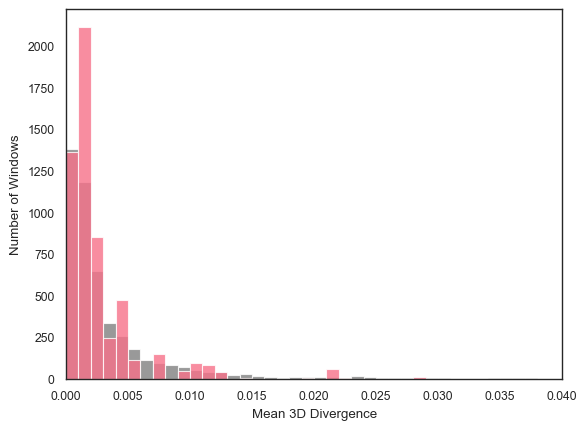

In [73]:
data_null = annotation[annotation.numBases.isnull()==True].ALL_mean_x
w = 0.01
plt.hist(data_null, color='grey',bins = np.arange(0,0.04, 0.001), alpha = 0.8)
data_inv = annotation[annotation.numBases.isnull()==False].ALL_mean_x
plt.hist(data_inv, bins = np.arange(0,0.04, 0.001), alpha=0.8)
plt.xlim(0,0.04)
plt.ylabel('Number of Windows')
plt.xlabel('Mean 3D Divergence')
plt.savefig("%s/sup/inversions.svg" % FIG_PATH , bbox_inches = 'tight')

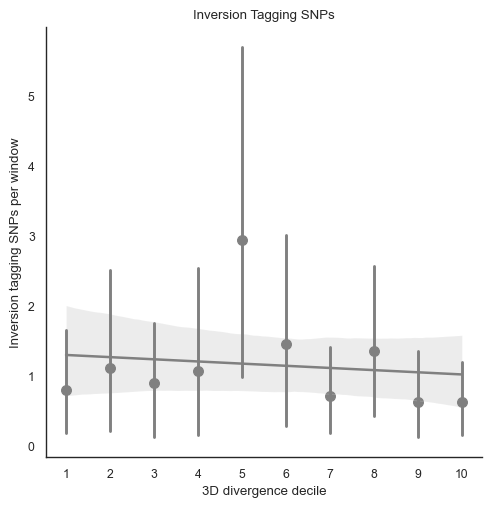

In [74]:
annotation = annotation_grouped
g = sns.lmplot(x='divergence_percentile_group', y='numBases', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="3D divergence decile", ylabel="Inversion tagging SNPs per window", title='Inversion Tagging SNPs')
#slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['annot_count'])
#print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))
plt.savefig("%s/sup/decile_inversions.svg" % FIG_PATH, bbox_inches = 'tight')

## Recomb Rate

In [103]:
recomb_rate = pybedtools.BedTool('%s/annotations/recomb1000GAvg.bedGraph' % DATA_PATH)

In [105]:
annot_data=recomb_rate
annot_type='recomb_rate'
quant_bins=10
regions = windows_by_pop[['ALL_mean','ALL_std']]
regions['divergence_percentile'] = regions['ALL_mean'].rank(pct=True)
regions = regions.reset_index()
regions['divergence_percentile_group'] = regions['divergence_percentile'].apply(PercentileToQuantile, bins=quant_bins)
regions['stop'] = regions['windowStartPos'] + 2**20
regions = regions[['chr','windowStartPos','stop','ALL_mean','ALL_std','divergence_percentile','divergence_percentile_group']]
regions.columns = ['chr','start','stop'] + list(regions.columns)[3:]
region_list = regions[['chr','start','stop', 'divergence_percentile_group']]

annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','recomb_rate', 'numBases']
annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group'], how='outer')
annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','divergence_percentile_group':'mean', 'recomb_rate':'mean'})
annotation_grouped= annotation_grouped.reset_index()

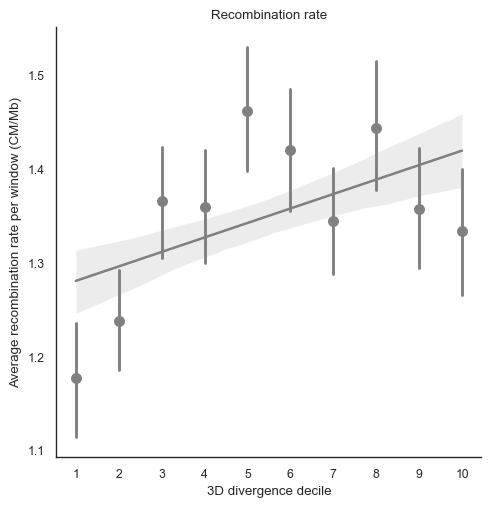

In [108]:
annotation = annotation_grouped
g = sns.lmplot(x='divergence_percentile_group', y='recomb_rate', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="3D divergence decile", ylabel="Average recombination rate per window (CM/Mb)", title='Recombination rate')
#slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['annot_count'])
#print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))
plt.savefig("%s/decile_recombrate.svg" % FIG_PATH, bbox_inches = 'tight')

In [157]:
annotation_grouped

chr      start       stop  numBases  divergence_percentile_group  \
0     chr1    1048576    2097152   1048576                          4.0   
1     chr1    1572864    2621440   1048576                          5.0   
2     chr1    3145728    4194304   1048576                          7.0   
3     chr1    3670016    4718592   1048576                          8.0   
4     chr1    4194304    5242880   1048576                          9.0   
...    ...        ...        ...       ...                          ...   
4868  chr9  134742016  135790592   1048576                          8.0   
4869  chr9  135266304  136314880   1048576                          6.0   
4870  chr9  135790592  136839168   1048576                          5.0   
4871  chr9  136314880  137363456   1048576                          7.0   
4872  chr9  136839168  137887744   1048576                          5.0   

      recomb_rate  
0        1.284218  
1        1.942467  
2        2.833489  
3        2.530360  
4        2.576597  
...           ...  
4868     3.649257  
4869     3.502605  
4870     3.009340  
4871     2.381770  
4872     0.888934  

[4873 rows x 6 columns]

# clarrifying all variants waffle plot

In [5]:
total = (4100000 + 5000000)/2
coding = (10000 + 12000)/2
regulatory = (459000 + 565000)/2
other = total - (coding + regulatory)

In [2]:

total

4550000.0

In [3]:
coding

11000.0

In [4]:
regulatory

512000.0

In [7]:
other/total

0.8850549450549451

In [8]:
coding/total

0.0024175824175824176

In [9]:
regulatory/total

0.11252747252747253

In [20]:
from pywaffle import Waffle
import matplotlib.pyplot as plt


In [16]:
v = np.array([coding, regulatory, other])

In [112]:
d = 1000
v = {'Protein Coding': coding/total*100, 'Known Regulatory': regulatory/total*100, "Other": other/total*100}

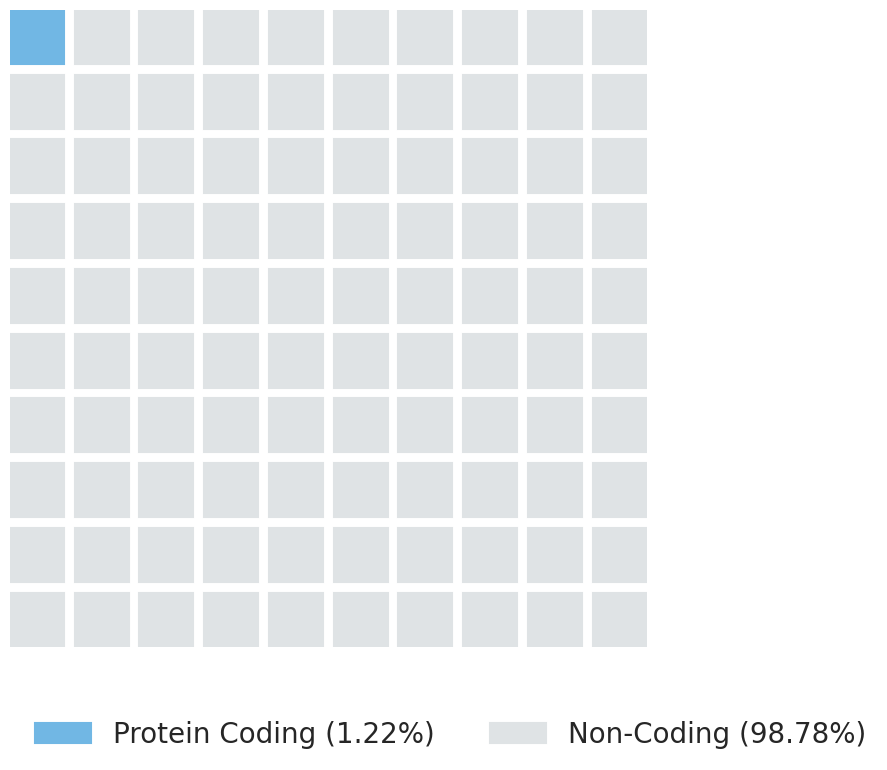

In [162]:

fig = plt.figure(FigureClass = Waffle, 
                 rows=10,
                 columns=10,
                 values =v ,
                 figsize=(15,8),
                 labels=[f"{k} ({round(w,2)}%)" for k, w in v.items()],
                 legend = {'loc': 'lower left', 'bbox_to_anchor': (0, -.2), 'ncol': len(v), 'framealpha': 0, 'fontsize':20},
                 starting_location='NW', 
                 colors = ['#71B7E4','#DFE3E5'])
plt.show()

In [74]:
total/d

364.0

In [68]:
total

4550000.0

In [77]:
coding

11000.0

In [119]:
round(v['Other'], 2)

88.51

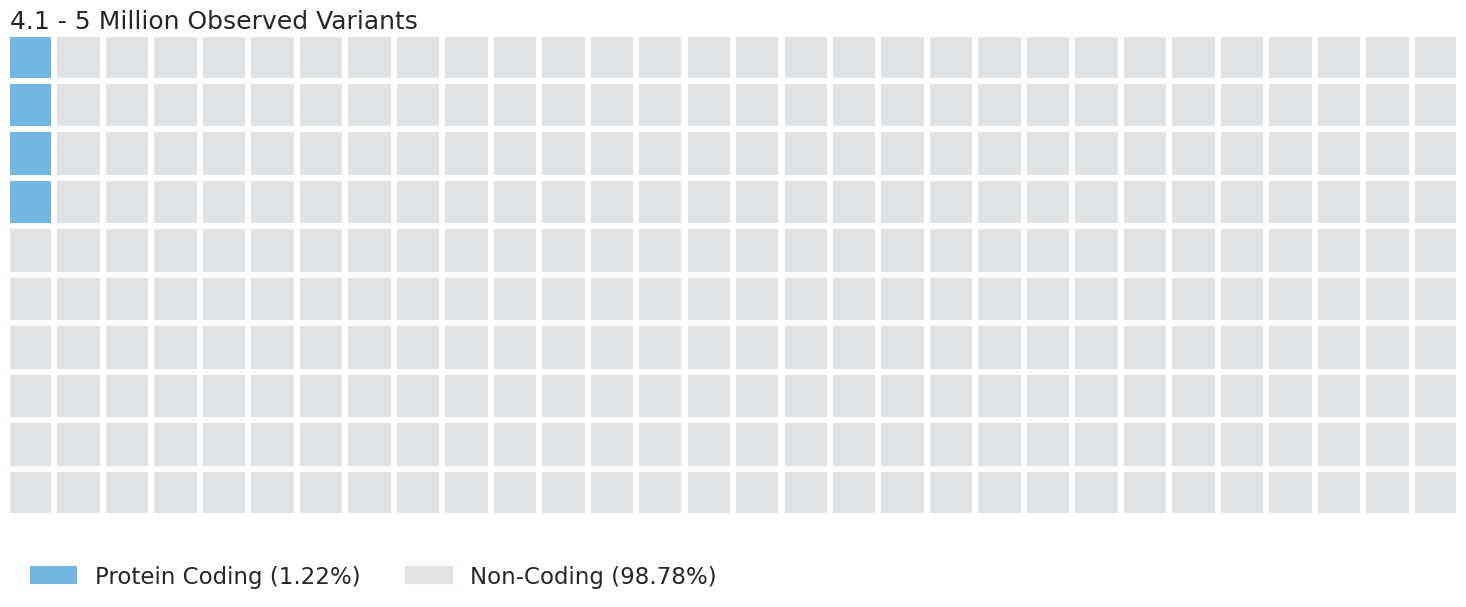

In [150]:
total = 78136341
coding = 950208
noncoding = total - coding

v = np.array([coding, noncoding])
d = 1000
v = {'Protein Coding': coding/total*100, 'Non-Coding': noncoding/total*100}

fig = plt.figure(FigureClass = Waffle, 
                 rows=10,
                 columns=30,
                 values =v ,
                 figsize=(15,8),
                 title={'label': '78,136,341 Observed Autosomeal SNPs', 'loc': 'left'},
                 labels=[f"{k} ({round(w,2)}%)" for k, w in v.items()],
                 legend = {'loc': 'lower left', 'bbox_to_anchor': (0, -.2), 'ncol': len(v), 'framealpha': 0},
                 starting_location='NW', 
                 colors = ['#71B7E4','#DFE3E5'])
plt.show()